The Results
This is the beginning on my extensive analysis of the results I have managed to gather for my MASTERS research. I will use all the functions I have at hand to dive down deep into each code, each function, each line of code as well to provide the best analysis for my thesis. I will generate a story that creates the tale of how to not only identify heatwaves and intepret them with my definition, but to develop a suitable temperature estimation for records that may only have solitary days worth of sub-daily data. This actually helps out any continous type of estimations as they will be able to find maximum and minimum (tmax and tmin) temperatures that are not able to be found using higher quality methods. I do know my method of estimating temperatures is highly flawed, but if I had time to really develop a regressive approach to estimate tmax and tmin I would spend more time on it and this could be a potential research project, PhD level or Masters for me or someone else as I do believe its possible to do something like this for all records unable to create a continous plot.

Furthermore, no heatwvae definition is the perfect one and can be married into every meteorlogical group or warning system. Everything and everyone sees heatwaves definitely and are affected differently, therefore like models, 'all models are bad but some can be useful', in this case all heatwave definitions are bad at describpting what a heatwave is, but some can be useful to gain an insight into, either deadliness, how extreme, duration, infrastruture or agriculture damages, but none can actually satisify all there is in the world. My definition looks at how structures and people adapt to heatwaves, therefore the possibility of missing key heatwave events is likely as another definition could elude to a heatwave occurring a few days after a previous heatwave occurs but in my definition this isnt capturued due to how the moving 30 day mean acts to bring it back to the norm or in this case a heat stress value of 0 therefore effectively cutting the heatwave.

People tend to adapt to the heat 2 to 4 weeks after the heat enters this new state therefore the definition accounts for this, therefore for example a hot period occurs in mid-Jan, if infacg it was a hot summer, to get a chance of a heatwave occruing in that mid-jan period, it must stand out compared to the previous 30 days worth of temperature.

Anyway this will all be further discussed as I move through my results on this page. I will literally write down all my thoughts, ideas and analysis and go down many rabbit holes, as I continue to uncover new things.

Dates
This is used in the concatination process when using the Calendar Day Percentile and other things that have the datetime data disappear. Since the full 366 days need to be accounted for, 2020 was the year I chose for this.

In [3]:
Dates = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\Dates, includes feb 29.csv")

NameError: name 'pd' is not defined

Temperature Data - ACORN-SAT 1910-2021

We have the max, min and daily extreme average. We also dropped the first row as it doesnt have any information in it and this is then concatenated together

This data is only for 1910-2021, adding the 1880-1900 will come later

In [4]:
#Max Temp, (drop(0) has dropped the 0th index, so it starts at 1)
MaxT_Perth = pd.read_csv(r"C:\Users\jarra\Desktop\UPDATED TMAX, TMIN ACORN-SAT\tmax.009021.daily (3).csv").drop(0)
#Min Temp
MinT_Perth = pd.read_csv(r"C:\Users\jarra\Desktop\UPDATED TMAX, TMIN ACORN-SAT\tmin.009021.daily (2).csv").drop(0)
#Ave Temp
AvgT_Perth = (MaxT_Perth['maximum temperature (degC)']+MinT_Perth['minimum temperature (degC)'])/2

Maximum = pd.Series(MaxT_Perth['maximum temperature (degC)'], name="Max")
Minimum = pd.Series(MinT_Perth['minimum temperature (degC)'],name="Min")
Average = pd.Series(AvgT_Perth,name="Avg")

#The Daily Max Min Ave Data
Daily_Extremes = pd.concat([MaxT_Perth['date'],Maximum,Minimum,Average],axis=1)

#Check that it has worked
print(Daily_Extremes.head())
Daily_Extremes.tail()


NameError: name 'pd' is not defined

Temperature Data - Perth Gardens 1880 - 1900

This is the Perth Gardens Temperature Dataset, there is a corrected version and a raw version.

In [5]:
P_Gardens = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\perthgardens_daily_1880-1900.csv")
P_Gardens_Corr = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\perthgardens_daily_corrected_1880-1900.csv")

print(P_Gardens.head())
P_Gardens_Corr.head()

NameError: name 'pd' is not defined

Temperature Data - PERTH SURVEY OFFICE/COLONIAL HOTEL
PERTH SURVEY OFFICE/COLONIAL HOTEL 1830 - 1875 This is the sub-daily observations with other interesting aspects in the Swan River location and Regional Office, several times it moved, but I will have to note the locations. It is homogenised as much as possible.

Locations of Each of the Observations

ACORN-SAT - PERTH AIRPORT - 31.93S 115.98E

PERTH GARDENS - 31.95S, 115.85E

PERTH REGIONAL OFFICE - 31.96S, 115.87E

Not sure where the Perth Survey Office and the Colonial


1
​
3. Initial Review of Datasets
This was the initial review of my datasets, so the ACORN-SAT, the Perth Regional Office, the 1830-1875 Subdaily Dataset and all the other datasets I have.

# Initial Review of the Datasets

In [12]:
import pandas as pd, numpy as np,  matplotlib.pyplot as plt
#First lets load the data
PerthGardens_Extreme_T_Jan1880_Dec1900 = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\perthgardens_daily_1880-1900.csv")
#Note converting to datetime, there is a issue where 1899->1900 goes like 1800-03-22 to 31/12/1900
Perth_Gardens_Corr_Extreme_T_Jan1880_Dec1900 = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\perthgardens_daily_corrected_1880-1900.csv")
Swan_River_Extreme_T_April1830_Dec1875 = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\swanriver_subdaily_1830-1875.csv")
MaxT_Jan1910_Jun2021 = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmax.009021.daily.csv")
MinT_Jan1910_Jun2021 = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmin.009021.daily.csv")

In [13]:
#Use datetime for MaxT and MinT to test
MaxT_Jan1910_Jun2021['date'] = pd.to_datetime(MaxT_Jan1910_Jun2021['date'],format="%d/%m/%Y")
MaxT_Jan1910_Jun2021.set_index('date', inplace=True)
MinT_Jan1910_Jun2021['date'] = pd.to_datetime(MinT_Jan1910_Jun2021['date'],format="%d/%m/%Y")
MinT_Jan1910_Jun2021.set_index('date', inplace=True)



In [14]:
MaxT_Jan1910_Jun2021.head(50)

maximum temperature (degC)  site number      site name
date                                                              
NaT                                NaN       9021.0  PERTH AIRPORT
1910-01-01                        26.7          NaN            NaN
1910-01-02                        27.0          NaN            NaN
1910-01-03                        27.5          NaN            NaN
1910-01-04                        24.0          NaN            NaN
1910-01-05                        24.8          NaN            NaN
1910-01-06                        24.4          NaN            NaN
1910-01-07                        25.3          NaN            NaN
1910-01-08                        28.0          NaN            NaN
1910-01-09                        32.6          NaN            NaN
1910-01-10                        35.9          NaN            NaN
1910-01-11                        33.9          NaN            NaN
1910-01-12                        38.6          NaN            NaN
1910-01-13                        35.1          NaN            NaN
1910-01-14                        32.9          NaN            NaN
1910-01-15                        30.3          NaN            NaN
1910-01-16                        25.8          NaN            NaN
1910-01-17                        25.7          NaN            NaN
1910-01-18                        25.4          NaN            NaN
1910-01-19                        26.1          NaN            NaN
1910-01-20                        32.6          NaN            NaN
1910-01-21                        36.0          NaN            NaN
1910-01-22                        37.9          NaN            NaN
1910-01-23                        38.2          NaN            NaN
1910-01-24                        28.0          NaN            NaN
1910-01-25                        31.7          NaN            NaN
1910-01-26                        33.9          NaN            NaN
1910-01-27                        33.6          NaN            NaN
1910-01-28                        25.9          NaN            NaN
1910-01-29                        23.0          NaN            NaN
1910-01-30                        23.7          NaN            NaN
1910-01-31                        25.6          NaN            NaN
1910-02-01                        32.7          NaN            NaN
1910-02-02                        32.4          NaN            NaN
1910-02-03                        33.8          NaN            NaN
1910-02-04                        33.4          NaN            NaN
1910-02-05                        33.1          NaN            NaN
1910-02-06                        32.8          NaN            NaN
1910-02-07                        32.1          NaN            NaN
1910-02-08                        27.7          NaN            NaN
1910-02-09                        32.5          NaN            NaN
1910-02-10                        34.9          NaN            NaN
1910-02-11                        35.9          NaN            NaN
1910-02-12                        28.9          NaN            NaN
1910-02-13                        32.6          NaN            NaN
1910-02-14                        30.1          NaN            NaN
1910-02-15                        31.5          NaN            NaN
1910-02-16                        35.9          NaN            NaN
1910-02-17                        40.0          NaN            NaN
1910-02-18                        33.8          NaN            NaN

In [15]:
MinT_Jan1910_Jun2021.head(50)

minimum temperature (degC)  site number      site name
date                                                              
NaT                                NaN       9021.0  PERTH AIRPORT
1910-01-01                        16.4          NaN            NaN
1910-01-02                        13.5          NaN            NaN
1910-01-03                        12.0          NaN            NaN
1910-01-04                        13.5          NaN            NaN
1910-01-05                         9.8          NaN            NaN
1910-01-06                         9.8          NaN            NaN
1910-01-07                        10.4          NaN            NaN
1910-01-08                        14.5          NaN            NaN
1910-01-09                        14.4          NaN            NaN
1910-01-10                        17.8          NaN            NaN
1910-01-11                        20.3          NaN            NaN
1910-01-12                        22.3          NaN            NaN
1910-01-13                        20.9          NaN            NaN
1910-01-14                        16.4          NaN            NaN
1910-01-15                        19.8          NaN            NaN
1910-01-16                        17.6          NaN            NaN
1910-01-17                        12.4          NaN            NaN
1910-01-18                        10.7          NaN            NaN
1910-01-19                        10.0          NaN            NaN
1910-01-20                        12.9          NaN            NaN
1910-01-21                        12.6          NaN            NaN
1910-01-22                        16.4          NaN            NaN
1910-01-23                        17.6          NaN            NaN
1910-01-24                        18.1          NaN            NaN
1910-01-25                        12.3          NaN            NaN
1910-01-26                        14.5          NaN            NaN
1910-01-27                        19.7          NaN            NaN
1910-01-28                        18.3          NaN            NaN
1910-01-29                        14.0          NaN            NaN
1910-01-30                         8.1          NaN            NaN
1910-01-31                        10.9          NaN            NaN
1910-02-01                        14.3          NaN            NaN
1910-02-02                        18.0          NaN            NaN
1910-02-03                        18.9          NaN            NaN
1910-02-04                        16.1          NaN            NaN
1910-02-05                        16.8          NaN            NaN
1910-02-06                        15.0          NaN            NaN
1910-02-07                        16.3          NaN            NaN
1910-02-08                        20.9          NaN            NaN
1910-02-09                        18.2          NaN            NaN
1910-02-10                        17.4          NaN            NaN
1910-02-11                        20.0          NaN            NaN
1910-02-12                        19.7          NaN            NaN
1910-02-13                        16.5          NaN            NaN
1910-02-14                        15.0          NaN            NaN
1910-02-15                        16.3          NaN            NaN
1910-02-16                        17.0          NaN            NaN
1910-02-17                        20.4          NaN            NaN
1910-02-18                        21.7          NaN            NaN

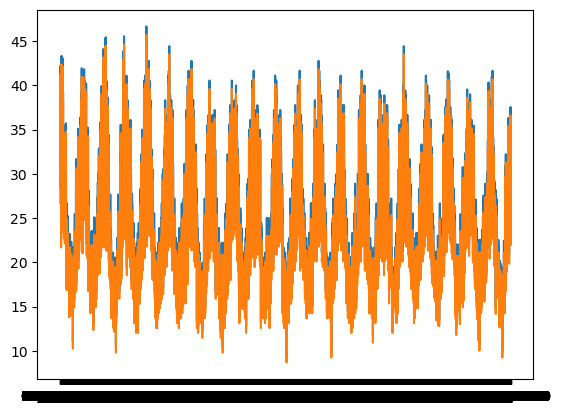

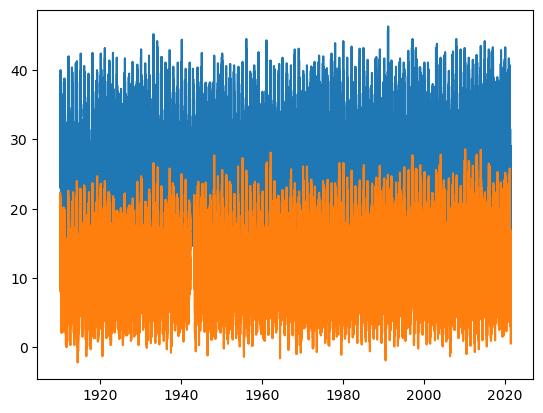

In [17]:

plt.figure(1)
plt.plot(PerthGardens_Extreme_T_Jan1880_Dec1900['time'],PerthGardens_Extreme_T_Jan1880_Dec1900['tmax'])
plt.plot(Perth_Gardens_Corr_Extreme_T_Jan1880_Dec1900['time'],Perth_Gardens_Corr_Extreme_T_Jan1880_Dec1900['tmax'])

plt.figure(2)
plt.plot(MaxT_Jan1910_Jun2021['maximum temperature (degC)'])
plt.plot(MinT_Jan1910_Jun2021['minimum temperature (degC)'])


In [19]:
#First lets load the data
PerthGardens_Extreme_T_Jan1880_Dec1900 

time       tmax       tmin
0     01/01/2080  39.444444  25.777778
1     02/01/2080  41.333333  23.444444
2     03/01/2080  41.388889  21.111111
3     04/01/2080  41.666667  21.722222
4     05/01/2080  40.000000  18.888889
...          ...        ...        ...
7665  27/12/2100  27.777778  14.333333
7666  28/12/2100  27.666667  16.277778
7667  29/12/2100  26.944444  17.777778
7668  30/12/2100  23.555556  14.166667
7669  31/12/2100  25.777778  13.055556

[7670 rows x 3 columns]

In [20]:
#First lets load the data

Perth_Gardens_Corr_Extreme_T_Jan1880_Dec1900 

time       tmax       tmin
0     01/01/2080  38.494444  26.093889
1     02/01/2080  40.383333  23.760556
2     03/01/2080  40.438889  21.427222
3     04/01/2080  40.716667  22.038333
4     05/01/2080  39.050000  19.048269
...          ...        ...        ...
7665  27/12/2100  25.800000  14.300000
7666  28/12/2100  25.709091  16.060000
7667  29/12/2100  25.118182  17.754762
7668  30/12/2100  21.955556  14.136364
7669  31/12/2100  23.925000  13.150000

[7670 rows x 3 columns]

In [21]:
#First lets load the data

Swan_River_Extreme_T_April1830_Dec1875

date  temp
0      1830-04-16 12:00:00  23.1
1      1830-04-16 15:00:00  25.8
2      1830-04-17 10:00:00  22.2
3      1830-04-17 15:00:00  26.4
4      1830-04-18 10:00:00  23.3
...                    ...   ...
26388  1875-12-29 16:00:00  33.9
26389  1875-12-30 10:00:00  25.6
26390  1875-12-30 16:00:00  31.1
26391  1875-12-31 10:00:00  25.0
26392  1875-12-31 16:00:00  25.6

[26393 rows x 2 columns]

In [22]:

MaxT_Jan1910_Jun2021


maximum temperature (degC)  site number      site name
date                                                              
NaT                                NaN       9021.0  PERTH AIRPORT
1910-01-01                        26.7          NaN            NaN
1910-01-02                        27.0          NaN            NaN
1910-01-03                        27.5          NaN            NaN
1910-01-04                        24.0          NaN            NaN
...                                ...          ...            ...
2021-06-26                        20.3          NaN            NaN
2021-06-27                        15.6          NaN            NaN
2021-06-28                        19.7          NaN            NaN
2021-06-29                        18.0          NaN            NaN
2021-06-30                        16.8          NaN            NaN

[40725 rows x 3 columns]

In [23]:
MinT_Jan1910_Jun2021

minimum temperature (degC)  site number      site name
date                                                              
NaT                                NaN       9021.0  PERTH AIRPORT
1910-01-01                        16.4          NaN            NaN
1910-01-02                        13.5          NaN            NaN
1910-01-03                        12.0          NaN            NaN
1910-01-04                        13.5          NaN            NaN
...                                ...          ...            ...
2021-06-26                         5.8          NaN            NaN
2021-06-27                         8.7          NaN            NaN
2021-06-28                        10.5          NaN            NaN
2021-06-29                        12.5          NaN            NaN
2021-06-30                         7.7          NaN            NaN

[40725 rows x 3 columns]


Key notes:

    - Maximums and Minimums are found for 1880 onward data, this means that I will have to 
    intepolate the max and mins for the 1835-1875 data to be consistent.
    - 5 year gap between 1875 to 1880 and 1900 to 1910 I hope we can find data to fill the void
    - Will need to concatenate the 1835 to 1875 data due to that the day is the vertical and the time is the horizontal
    this means that i will have to figure out how to assign a temp value that spits out a date with the time on the vertical 
    and in the next column have temperature.
    - There are two 1880 to 1900, I think the corrected one is better as removes the temp error out of
    the old data, so will have to study going further.
    - Will have to concatonate all the data into one data series, but with these gaps, this makes it 
    quite difficult, is there anywhere where I can insert this data into it.
    -
    -


## Preanalysis of the 1880 to 2020 heatwave definition


This is my rough draft of defining heatwaves.
There are a few components for this, and they all require different problems 
work out before I can finilise the results.

The goal of this section is to generate the necessary code that will be 
vital in understanding heatwave and warmwave events in Perth and in order for 
that to be true we must explain a few things before hand so I and you can get
a really good idea of where I am heading with how I will define my heatwaves.

There will be a few different ways in defining heatwaves, and a few different metrics
that will be imprecial for my analysis in each of the definitions. There are 3 
definitions I must account for and I hope all three capture the signifincatn heatwave events
and also other events that may not have been seen at the time, which will be 
important in discussing synoptic setups using the 20CR reanalysis.

So the 3 catergories that I will look at are:
    Absolute Heatwave Threshold (AHT):
        This is bascially the heatwaves that are KNOWN to cause significant health 
        issues and its aboove a temperautre threshold that is SPECIFIC to Perth
        that begins to see a spike in heat related deaths/hospital calls.
        
    Relative Heatwave Threshold (RHT):
        This is using a moving mean and this sets a moving threshold that alters over
        the year. In order to define, it should use a percentile based idea.
        Moderate-Extreme:
            I aim to achieve capturing as many heatwave/warmwave events as possible 
            that are known and furthermore see trends with this threshold that has a 
            low percentile base compared to the extreme. As long as it does not overcapture
            the heat/warm waves it should be fine.
        Extreme:
            This will be used to compare the synotpic setup overall for the 20CR
            these should have captured most or all of the absolute heatwaves, however
            since there will be less of them, it will have enough data to show the 
            how a snyptoic setup will occur from 5 days before that generates these
            extrme setups.
    Heatwave with Breaks (HWB):
        This is my last one and I beleive has not really been done before, I aim 
        generate a timeline that hopefully captures all the heatwvaes and also 
        a heatwave that may have had a cool day in betweenthe heatwave event.
        This should lead to lower heatwave events but shuld capture all known events
        still. If this works I will implement this as a full time working code for the 
        rest of my masters degree.


Now we have the catergories for the heatwaves now we need to generate the definitions
for each of them. The definitions will remain mostly the same but will some tweaks.
I think the first main thing is defining the time that a heatwave should initially last. 
Well all previous studies have reported that 3 days is the minimum and with its in
agreementr with the medical.infrustrucal papers that I have read that agree o this time.

A heatwave should last 3 or more days, so then what does this mean for HWB, well
I beleive that IF the heatwave definition is greater the AHT and RHT for 3 days straight
then I willstart the HWB then, if there is 2 days, then 1 day of cooler weather 
then another day of hot weather, this WILL not count.

Now the mathematical definitions, I will use from the Nairn paper 2013 and Perkins Paper, t

Since nairn and perken uses a summing system that uses Ti-+1 and Ti-+2, I have used this to show how it affects 
the graphical representation of the moving mean.

'''


This is my rough draft of defining heatwaves.
There are a few components for this, and they all require different problems 
work out before I can finilise the results.

The goal of this section is to generate the necessary code that will be 
vital in understanding heatwave and warmwave events in Perth and in order for 
that to be true we must explain a few things before hand so I and you can get
a really good idea of where I am heading with how I will define my heatwaves.

There will be a few different ways in defining heatwaves, and a few different metrics
that will be imprecial for my analysis in each of the definitions. There are 3 
definitions I must account for and I hope all three capture the signifincatn heatwave events
and also other events that may not have been seen at the time, which will be 
important in discussing synoptic setups using the 20CR reanalysis.

So the 3 catergories that I will look at are:
    Absolute Heatwave Threshold (AHT):
        This is bascially the heatwaves that are KNOWN to cause significant health 
        issues and its aboove a temperautre threshold that is SPECIFIC to Perth
        that begins to see a spike in heat related deaths/hospital calls.
        
    Relative Heatwave Threshold (RHT):
        This is using a moving mean and this sets a moving threshold that alters over
        the year. In order to define, it should use a percentile based idea.
        Moderate-Extreme:
            I aim to achieve capturing as many heatwave/warmwave events as possible 
            that are known and furthermore see trends with this threshold that has a 
            low percentile base compared to the extreme. As long as it does not overcapture
            the heat/warm waves it should be fine.
        Extreme:
            This will be used to compare the synotpic setup overall for the 20CR
            these should have captured most or all of the absolute heatwaves, however
            since there will be less of them, it will have enough data to show the 
            how a snyptoic setup will occur from 5 days before that generates these
            extrme setups.
    Heatwave with Breaks (HWB):
        This is my last one and I beleive has not really been done before, I aim 
        generate a timeline that hopefully captures all the heatwvaes and also 
        a heatwave that may have had a cool day in betweenthe heatwave event.
        This should lead to lower heatwave events but shuld capture all known events
        still. If this works I will implement this as a full time working code for the 
        rest of my masters degree.


Now we have the catergories for the heatwaves now we need to generate the definitions
for each of them. The definitions will remain mostly the same but will some tweaks.
I think the first main thing is defining the time that a heatwave should initially last. 
Well all previous studies have reported that 3 days is the minimum and with its in
agreementr with the medical.infrustrucal papers that I have read that agree o this time.

A heatwave should last 3 or more days, so then what does this mean for HWB, well
I beleive that IF the heatwave definition is greater the AHT and RHT for 3 days straight
then I willstart the HWB then, if there is 2 days, then 1 day of cooler weather 
then another day of hot weather, this WILL not count.

Now the mathematical definitions, I will use from the Nairn paper 2013 and Perkins Paper, t

Since nairn and perken uses a summing system that uses Ti-+1 and Ti-+2, I have used this to show how it affects 
the graphical representation of the moving mean.
'''
Test = [4,3,5,7,3,4,5,7,5,6,3,6,4,3,5,6,7,3,5,6,4,4,3,5,6,7,4,2,4,6,1,6,7,8,6,4,6,10,11,13,9,6,5,4,2,4,5,6,3,5,7,3,1,3,5,7,8,9,3,4,5,7]
import pandas as pd, matplotlib.pyplot as plt
df = pd.DataFrame(Test, columns = ['Testing'])
plt.plot(df['Testing'])

TA1=[]
TA2 = []
TA3 = []
for i in range(3,len(Test)-3):
    Test_Ave1 = (Test[i] + Test[i-1] + Test[i-2])/3
    Test_Ave2 = (Test[i] + Test[i-1] + Test[i+1])/3
    Test_Ave3 = (Test[i] + Test[i+1] + Test[i+2])/3
    TA1.append(Test_Ave1)
    TA2.append(Test_Ave2)
    TA3.append(Test_Ave3)
    

plt.plot(TA1)
plt.plot(TA2)
plt.plot(TA3)
plt.legend(('T1','T2','T3'))
'''
It can be shown from this test that the heatwave would appear1 day later if using precednet 
data to caluclate the heatwave as Perkens 2013 and Nairn 2009 suggests and this means that if the start of the heat wave occured
on day 47, we would not know until day 48 which in the way of predicting these is not good. But in terms of 
being there at the time and recording this overall data, this is all they had to base it off. And I tend 
to agree with the logic behind it, if doing the T2 approach this may show the heatwave on the day, but the inssue is that is it
long lasting, and the effect health and human wise dnt really occur on that day. T3
is not a great one becasue it predicts the heatwave before it actually occurs therefore 
not a viable soliution.
Based on how observations were recorded IU believe the precident one will be ideal so samee as Nairn and Perkins.and furthermore
it is universally accepted for Australia heatwave definition (Trancoso 2014) this is the first definition

the second definition will be the period that both max and min temperatures are above a __% percentile

The final definition will be the twe3aking of the WSDI index from Alexander 2006 which is the warm spell indictaor
which means that above a certain percentile, average over a period of 3-6 days, does the warm spell exceed the 
90th perctile or something in a row within this, I am still pondering this idea.

The above are relative terms

For the absolute it is much easier, once the absolute temperature thresho;ld is found due to health issue causes
if this is exceeded three or more days then it counts as an absolute heatwave, this should occur in Summer generally




These are a few definitions to think about over the course of the next couple of weeks and refining 
these to get the best output for the duration and onset of the heatwave is vital.


Now some other definitions that explain heatwaves.
So I want to explore beyond the duration aspect with amplitude of the event which is 
the height above the preceding 30 days from the initial beginning of the event, and also
the hottest day of the heatwave. Another metric I want to explore is the amount of 
extra heat added into the region each day with two metrics one with a sum and the other
with the average for the heat wave event. This will also be similar to the area under a half
sinusiodal graph.

So far I can draft up these diferent metrics and when I get to them later on in my coding, 
I will explain them in more detail. I have to terst them so I can acquire the right information.

With the break, once I complete the above, I can figure out jjhow to implement a break.
'''
'''DEFINITION 1 DURATION AND DETERMING THE HEATWAVE'''
'''Excess Heatwave Index '''



'''
My Next Quest is to look at a percentile based code tnx, which will help show all times a day is above that percentilke.
The base will be set to the 90th percentile.
'''

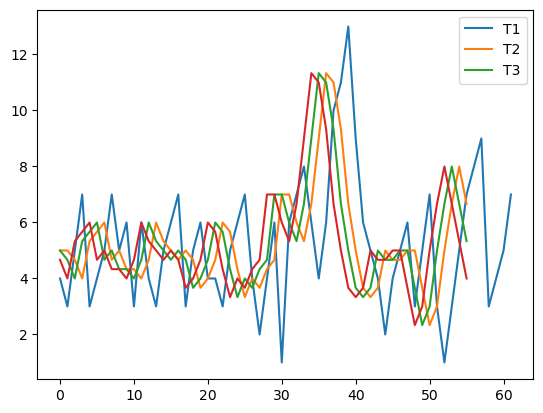

In [24]:
Test = [4,3,5,7,3,4,5,7,5,6,3,6,4,3,5,6,7,3,5,6,4,4,3,5,6,7,4,2,4,6,1,6,7,8,6,4,6,10,11,13,9,6,5,4,2,4,5,6,3,5,7,3,1,3,5,7,8,9,3,4,5,7]
import pandas as pd, matplotlib.pyplot as plt
df = pd.DataFrame(Test, columns = ['Testing'])
plt.plot(df['Testing'])

TA1=[]
TA2 = []
TA3 = []
for i in range(3,len(Test)-3):
    Test_Ave1 = (Test[i] + Test[i-1] + Test[i-2])/3
    Test_Ave2 = (Test[i] + Test[i-1] + Test[i+1])/3
    Test_Ave3 = (Test[i] + Test[i+1] + Test[i+2])/3
    TA1.append(Test_Ave1)
    TA2.append(Test_Ave2)
    TA3.append(Test_Ave3)
    

plt.plot(TA1)
plt.plot(TA2)
plt.plot(TA3)
plt.legend(('T1','T2','T3'))

'''
It can be shown from this test that the heatwave would appear1 day later if using precednet 
data to caluclate the heatwave as Perkens 2013 and Nairn 2009 suggests and this means that if the start of the heat wave occured
on day 47, we would not know until day 48 which in the way of predicting these is not good. But in terms of 
being there at the time and recording this overall data, this is all they had to base it off. And I tend 
to agree with the logic behind it, if doing the T2 approach this may show the heatwave on the day, but the inssue is that is it
long lasting, and the effect health and human wise dnt really occur on that day. T3
is not a great one becasue it predicts the heatwave before it actually occurs therefore 
not a viable soliution.
Based on how observations were recorded IU believe the precident one will be ideal so samee as Nairn and Perkins.and furthermore
it is universally accepted for Australia heatwave definition (Trancoso 2014) this is the first definition

the second definition will be the period that both max and min temperatures are above a __% percentile

The final definition will be the twe3aking of the WSDI index from Alexander 2006 which is the warm spell indictaor
which means that above a certain percentile, average over a period of 3-6 days, does the warm spell exceed the 
90th perctile or something in a row within this, I am still pondering this idea.

The above are relative terms

For the absolute it is much easier, once the absolute temperature thresho;ld is found due to health issue causes
if this is exceeded three or more days then it counts as an absolute heatwave, this should occur in Summer generally




These are a few definitions to think about over the course of the next couple of weeks and refining 
these to get the best output for the duration and onset of the heatwave is vital.


Now some other definitions that explain heatwaves.
So I want to explore beyond the duration aspect with amplitude of the event which is 
the height above the preceding 30 days from the initial beginning of the event, and also
the hottest day of the heatwave. Another metric I want to explore is the amount of 
extra heat added into the region each day with two metrics one with a sum and the other
with the average for the heat wave event. This will also be similar to the area under a half
sinusiodal graph.

So far I can draft up these diferent metrics and when I get to them later on in my coding, 
I will explain them in more detail. I have to terst them so I can acquire the right information.

With the break, once I complete the above, I can figure out jjhow to implement a break.
'''
'''DEFINITION 1 DURATION AND DETERMING THE HEATWAVE'''
'''Excess Heatwave Index '''



'''
My Next Quest is to look at a percentile based code tnx, which will help show all times a day is above that percentilke.
The base will be set to the 90th percentile.
'''

In [26]:
#%%
import pandas as pd, numpy as np
'''PART 1: LOAD THE DATA'''

MaxT_Jan1910_Jun2021 = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmax.009021.daily.csv")
MinT_Jan1910_Jun2021 = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmin.009021.daily.csv")
MaxT_Perth_Data =MaxT_Jan1910_Jun2021
MaxT_Perth = MaxT_Perth_Data.copy()
MaxT_Perth = MaxT_Perth.drop(0)

MinT_Perth_Data =MinT_Jan1910_Jun2021
MinT_Perth = MinT_Perth_Data.copy()
MinT_Perth = MinT_Perth.drop(0)
import pandas as pd, numpy as np
#Note MaxT has missing dates: 26/01/1913, 27/01/1913, 26/12/1943, 27/12/1943, 18-23/09/2008
#Note MinT has many points missing from 1942/1943
#I would have to exclude any of these points by using an if check or something when generating the tn
#Max Temp, (drop(0) has dropped the 0th index, so it starts at 1)




## PART 2 A BASIC Tn for the rolling comparison
#Concanate Min and Max values into a single dataset
Max_Min_Perth = pd.concat((MaxT_Perth['date'], MaxT_Perth['maximum temperature (degC)'], MinT_Perth['minimum temperature (degC)']), axis = 1)
Max_Min_Perth['date'] = pd.to_datetime(Max_Min_Perth['date'],format="%d/%m/%Y")

#For the rolling I need to set all NaN values to -99999999 and so whenever a day uses a NaN value it becomes extremely negative and I can remove it.
Max_Min_Perth_NaN_To_Large = Max_Min_Perth.fillna(-9999999)
#We know the lowest temperautee value is -2.2
#Now in order to smooth the data out and create a tnx90 I am going to do 2 comparisons,
#I plan to first do the rolling for 7 days and then the 15 days as KirkFITz has done herself.
#Once I do the rolling any values that have a mean below -3 will be remove as these are all the NaN and also the 1910 data's coldest max/min temp is -2.2C


<AxesSubplot:xlabel='date,date'>

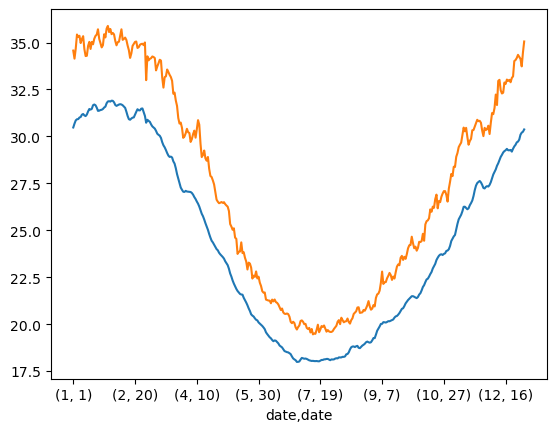

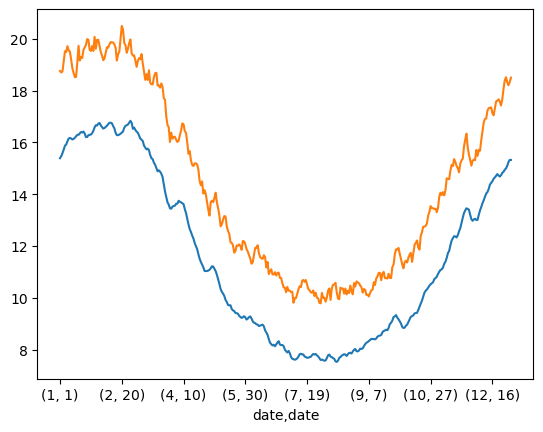

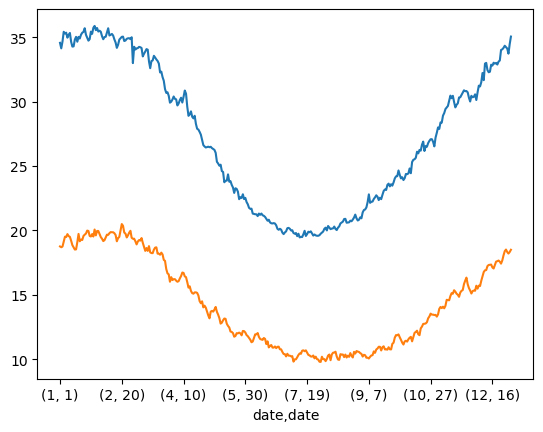

In [27]:
#%%Rolling the entire period

#Rolling with 7 days, this is 3 days nbefre and after and the centred day.
Max_7Day_Roll = Max_Min_Perth['maximum temperature (degC)'].rolling(7,center = True).mean()
Min_7Day_Roll = Max_Min_Perth['minimum temperature (degC)'].rolling(7,center = True).mean()
#Append this back with the time
Max_Rolling = pd.concat((MaxT_Perth['date'], Max_7Day_Roll), axis = 1)
Min_Rolling = pd.concat((MaxT_Perth['date'], Min_7Day_Roll), axis = 1)

#Remove NaNs
Max_Rolling = Max_Rolling.fillna(-9999999)
Min_Rolling = Min_Rolling.fillna(-9999999)
#Remove years where the rolling is less the -3C
Index_For_Drop_Max = Max_Rolling[Max_Rolling['maximum temperature (degC)'] < -5].index
Max_Rolling.drop(Index_For_Drop_Max, inplace = True)
Index_For_Drop_Min = Min_Rolling[Min_Rolling['minimum temperature (degC)'] < -5].index
Min_Rolling.drop(Index_For_Drop_Min, inplace = True)

#Now the fun begins, I must use a groupby function to get each day out, then apply my function for percentile then I can plot this percentile for each day.
#Start  with max first
Max_Rolling['date'] = pd.to_datetime(Max_Rolling['date'],dayfirst = True)
#First I want to compare the calender day mean with the 90th percentile
mean_Max = Max_Rolling.groupby([(Max_Rolling.date.dt.month),(Max_Rolling.date.dt.day)]).mean()
tn90_max = Max_Rolling.groupby([(Max_Rolling.date.dt.month),(Max_Rolling.date.dt.day)]).quantile(q = 0.90)
plt.figure(1)
mean_Max['maximum temperature (degC)'].plot()
tn90_max['maximum temperature (degC)'].plot()
'''It is very interesting to see that there are some dips that
happen at the end of the month for Jan, I need to make sure it is working properly'''

#Now for the minimum.
Min_Rolling['date'] = pd.to_datetime(Min_Rolling['date'],dayfirst = True)
#First I want to compare the calender day mean with the 90th percentile
mean_Min = Min_Rolling.groupby([(Min_Rolling.date.dt.month),(Min_Rolling.date.dt.day)]).mean()
tn90_min = Min_Rolling.groupby([(Min_Rolling.date.dt.month),(Min_Rolling.date.dt.day)]).quantile(q = 0.90)
plt.figure(2)
mean_Min['minimum temperature (degC)'].plot()
tn90_min['minimum temperature (degC)'].plot()

plt.figure(3)
tn90_max['maximum temperature (degC)'].plot()
tn90_min['minimum temperature (degC)'].plot()

<AxesSubplot:xlabel='date,date'>

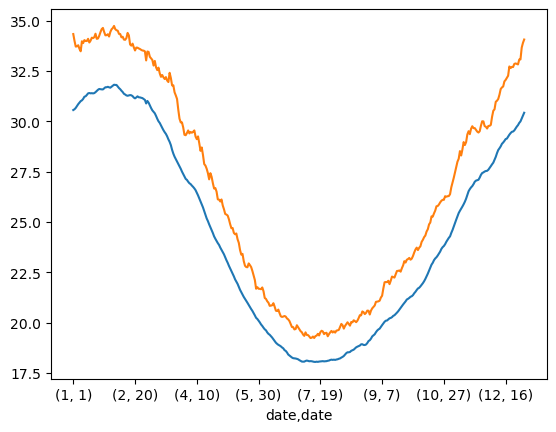

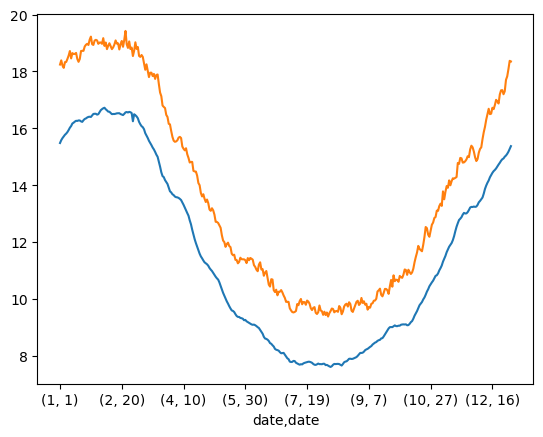

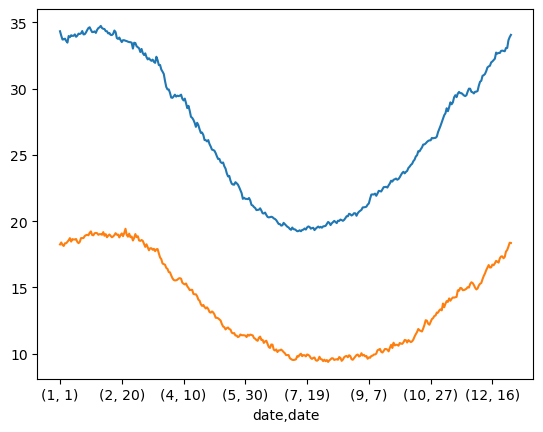

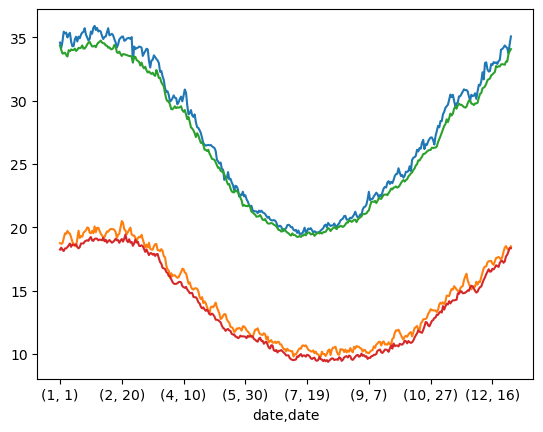

In [30]:

#%%Rolling the entire period

#Rolling with 15 days, this is 7 days nbefre and after and the centred day.
Max_15Day_Roll = Max_Min_Perth_NaN_To_Large['maximum temperature (degC)'].rolling(15,center = True).mean()
Min_15Day_Roll = Max_Min_Perth_NaN_To_Large['minimum temperature (degC)'].rolling(15,center = True).mean()
#Append this back with the time
Max_Rolling = pd.concat((MaxT_Perth['date'], Max_15Day_Roll), axis = 1)
Min_Rolling = pd.concat((MaxT_Perth['date'], Min_15Day_Roll), axis = 1)

#Remove NaNs
Max_Rolling = Max_Rolling.fillna(-9999999)
Min_Rolling = Min_Rolling.fillna(-9999999)
#Remove years where the rolling is less the -3C
Index_For_Drop_Max = Max_Rolling[Max_Rolling['maximum temperature (degC)'] < -5].index
Max_Rolling.drop(Index_For_Drop_Max, inplace = True)
Index_For_Drop_Min = Min_Rolling[Min_Rolling['minimum temperature (degC)'] < -5].index
Min_Rolling.drop(Index_For_Drop_Min, inplace = True)

#Now the fun begins, I must use a groupby function to get each day out, then apply my function for percentile then I can plot this percentile for each day.
#Start  with max first
Max_Rolling['date'] = pd.to_datetime(Max_Rolling['date'],dayfirst = True)
#First I want to compare the calender day mean with the 90th percentile
mean_Max = Max_Rolling.groupby([(Max_Rolling.date.dt.month),(Max_Rolling.date.dt.day)]).mean()
tn90_max15 = Max_Rolling.groupby([(Max_Rolling.date.dt.month),(Max_Rolling.date.dt.day)]).quantile(q = 0.90)
plt.figure(4)
mean_Max['maximum temperature (degC)'].plot()
tn90_max15['maximum temperature (degC)'].plot()
'''It is very interesting to see that there are some dips that
happen at the end of the month for Jan, I need to make sure it is working properly'''

#Now for the minimum.
Min_Rolling['date'] = pd.to_datetime(Min_Rolling['date'],dayfirst = True)
#First I want to compare the calender day mean with the 90th percentile
mean_Min = Min_Rolling.groupby([(Min_Rolling.date.dt.month),(Min_Rolling.date.dt.day)]).mean()
tn90_min15 = Min_Rolling.groupby([(Min_Rolling.date.dt.month),(Min_Rolling.date.dt.day)]).quantile(q = 0.90)
plt.figure(5)
mean_Min['minimum temperature (degC)'].plot()
tn90_min15['minimum temperature (degC)'].plot()

plt.figure(6)
tn90_max15['maximum temperature (degC)'].plot()
tn90_min15['minimum temperature (degC)'].plot()


plt.figure(7)
tn90_max['maximum temperature (degC)'].plot()
tn90_min['minimum temperature (degC)'].plot()
tn90_max15['maximum temperature (degC)'].plot()
tn90_min15['minimum temperature (degC)'].plot()
#plt.legend('max7','min7','max15','min15')
#Not really any different when comparing the two let me look at the 30 day as well


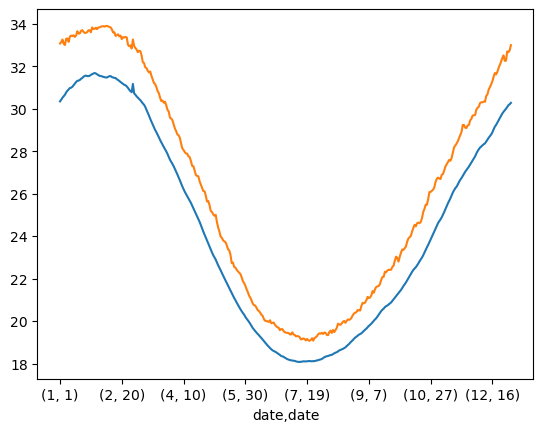

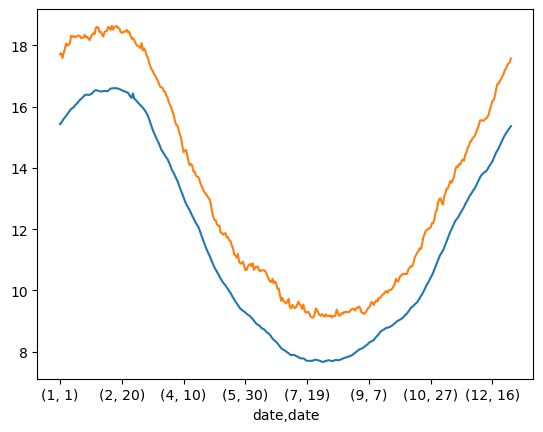

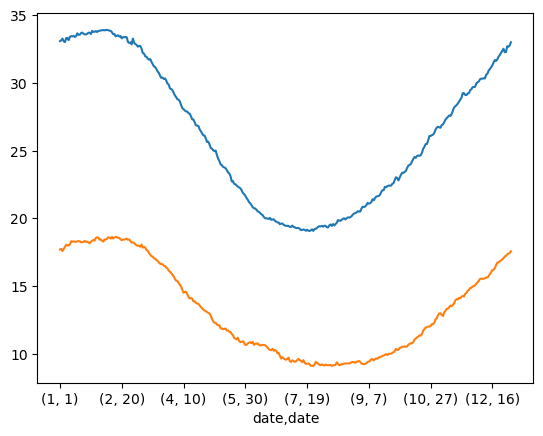

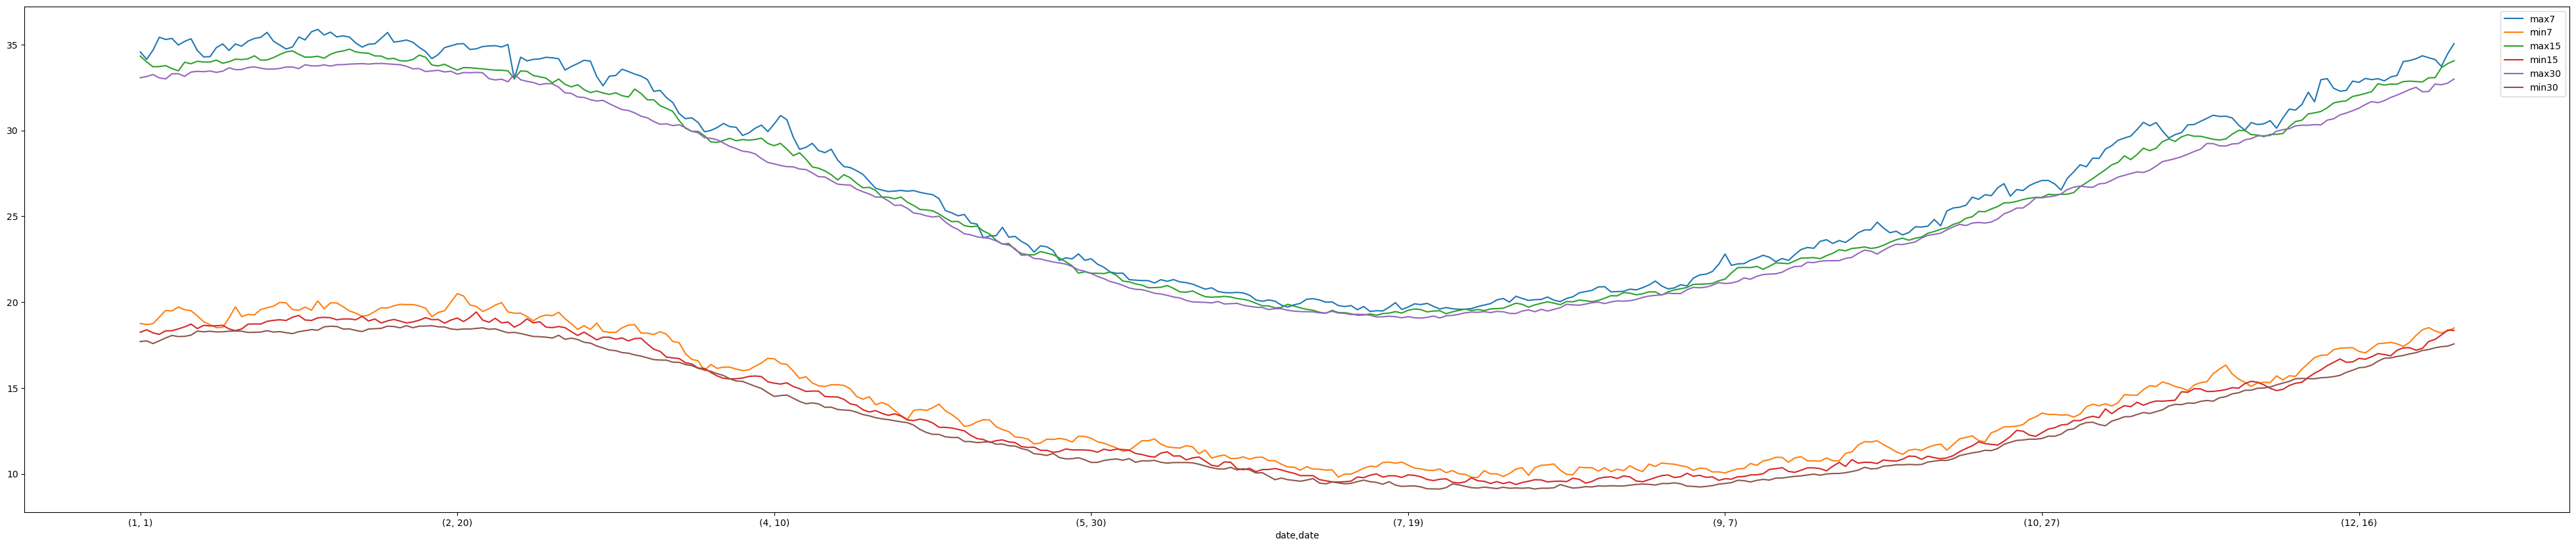

In [29]:
#%%

#Rolling with 15 days, this is 7 days nbefre and after and the centred day.
Max_30Day_Roll = Max_Min_Perth_NaN_To_Large['maximum temperature (degC)'].rolling(30,center = True).mean()
Min_30Day_Roll = Max_Min_Perth_NaN_To_Large['minimum temperature (degC)'].rolling(30,center = True).mean()
#Append this back with the time
Max_Rolling = pd.concat((MaxT_Perth['date'], Max_30Day_Roll), axis = 1)
Min_Rolling = pd.concat((MaxT_Perth['date'], Min_30Day_Roll), axis = 1)

#Remove NaNs
Max_Rolling = Max_Rolling.fillna(-9999999)
Min_Rolling = Min_Rolling.fillna(-9999999)
#Remove years where the rolling is less the -3C
Index_For_Drop_Max = Max_Rolling[Max_Rolling['maximum temperature (degC)'] < -5].index
Max_Rolling.drop(Index_For_Drop_Max, inplace = True)
Index_For_Drop_Min = Min_Rolling[Min_Rolling['minimum temperature (degC)'] < -5].index
Min_Rolling.drop(Index_For_Drop_Min, inplace = True)

#Now the fun begins, I must use a groupby function to get each day out, then apply my function for percentile then I can plot this percentile for each day.
#Start  with max first
Max_Rolling['date'] = pd.to_datetime(Max_Rolling['date'],dayfirst = True)
#First I want to compare the calender day mean with the 90th percentile
mean_Max = Max_Rolling.groupby([(Max_Rolling.date.dt.month),(Max_Rolling.date.dt.day)]).mean()
tn90_max30 = Max_Rolling.groupby([(Max_Rolling.date.dt.month),(Max_Rolling.date.dt.day)]).quantile(q = 0.90)
plt.figure(8)
mean_Max['maximum temperature (degC)'].plot()
tn90_max30['maximum temperature (degC)'].plot()
'''It is very interesting to see that there are some dips that
happen at the end of the month for Jan, I need to make sure it is working properly'''

#Now for the minimum.
Min_Rolling['date'] = pd.to_datetime(Min_Rolling['date'],dayfirst = True)
#First I want to compare the calender day mean with the 90th percentile
mean_Min = Min_Rolling.groupby([(Min_Rolling.date.dt.month),(Min_Rolling.date.dt.day)]).mean()
tn90_min30 = Min_Rolling.groupby([(Min_Rolling.date.dt.month),(Min_Rolling.date.dt.day)]).quantile(q = 0.90)
plt.figure(9)
mean_Min['minimum temperature (degC)'].plot()
tn90_min30['minimum temperature (degC)'].plot()

plt.figure(10)
tn90_max30['maximum temperature (degC)'].plot()
tn90_min30['minimum temperature (degC)'].plot()


plt.figure(11,figsize=(50,10))
tn90_max['maximum temperature (degC)'].plot()
tn90_min['minimum temperature (degC)'].plot()
tn90_max15['maximum temperature (degC)'].plot()
tn90_min15['minimum temperature (degC)'].plot()
tn90_max30['maximum temperature (degC)'].plot()
tn90_min30['minimum temperature (degC)'].plot()
plt.legend(['max7','min7','max15','min15','max30','min30'])
#Not really any different when comparing the two let me look at the 30 day as well




#mean of the 90th percentile
#23rd Feb
#5x 110 then do 90th percentile of that
#justr keep NaNs and python removes them look for key word.


#%%I did the wrong way above so this is the right way below:
'''
How to do the right way?
STEP 1:
    Get it into daily data vectors
STEP 2:
       x, x+-1, ... x-+i matrix
    y1
    y2
    ...         
    yi

STEP 3: 
    Get The Tn90 from this matrix and movie to the next day
STEP 4:
    Then plot, the rolling is already done.
'''
#STEP 1
Max = pd.concat((Max_Min_Perth['date'], Max_Min_Perth['maximum temperature (degC)']), axis = 1)
Max['date'] = pd.to_datetime(Max['date'],dayfirst = True)
mean_Max = Max.groupby([(Max.date.dt.month)=='Month',(Max.date.dt.day)=='Day']).mean()
mean_Max.plot()

mean_Max['date'][1,1]    

Max=Max.reset_index()
Max['date']=Max.to_datetime(Max['date'])
Max['year']=Max['date'].dt.year
Max['month']=Max['date'].dt.month
Max['day']=Max['date'].dt.day

mean_Max = Max.groupby(['month','day']).mean()
mean_Max = Max.groupby(['month','day'])



df_grouped=Max.pivot(index=('month','day'),rows = 'maximum temperature (degC)')


## Percentile Based Analysis

In [33]:
MaxT_Jan1910_Jun2021 = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmax.009021.daily.csv")
MinT_Jan1910_Jun2021 = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmin.009021.daily.csv")

#%% Load Data only using max Temperature for the initial start
MaxT_Perth_Data  = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmax.009021.daily.csv")
MaxT_Perth = MaxT_Perth_Data.copy()
MaxT_Perth = MaxT_Perth.drop(0)


In [34]:
#%% Apply datetime
MaxT_Perth['date'] = pd.to_datetime(MaxT_Perth['date'],format="%d/%m/%Y")


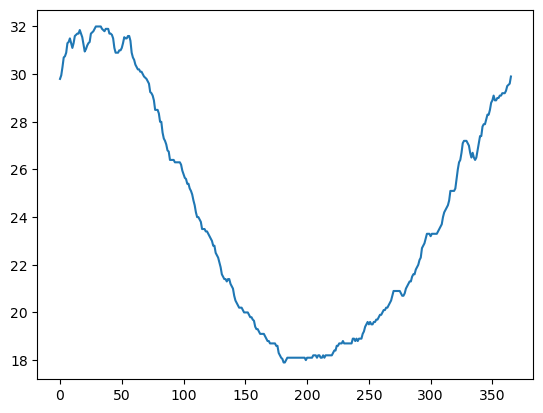

In [37]:
#%% Apply groupby functiom
MaxT_Perth['year']=MaxT_Perth['date'].dt.year
MaxT_Perth['month']=MaxT_Perth['date'].dt.month
MaxT_Perth['day']=MaxT_Perth['date'].dt.day

group_days = MaxT_Perth.groupby(['month','day'])
Daily_Data = []
for groups,days in group_days:
    Dailypre = group_days.get_group(groups).reset_index()
    Values= Dailypre['maximum temperature (degC)']
    Values = Values.to_frame()
    Daily_Data.append(Values['maximum temperature (degC)'])
import sys
sys.path.append(r"C:\Users\jarra\Desktop\Masters\Heatwave_Project")
import STP as STP


YearlyMax = STP.TnX_Rolling(3, Daily_Data, 50)
plt.plot(YearlyMax)



In [39]:
'''
Now the code is done, now to:
    1. Use the min one to see if it is fully opporational
    2. Get an average of the min and max and do it
    3. Split into 1910-1940 and 1990-2020 and compare
'''    
#%% 1.
#Load Data only using min Temperature for the initial start
MinT_Perth_Data =  pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmin.009021.daily.csv")
MinT_Perth = MinT_Perth_Data.copy()
MinT_Perth = MinT_Perth.drop(0)

#%% Apply datetime
MinT_Perth['date'] = pd.to_datetime(MinT_Perth['date'],format="%d/%m/%Y")


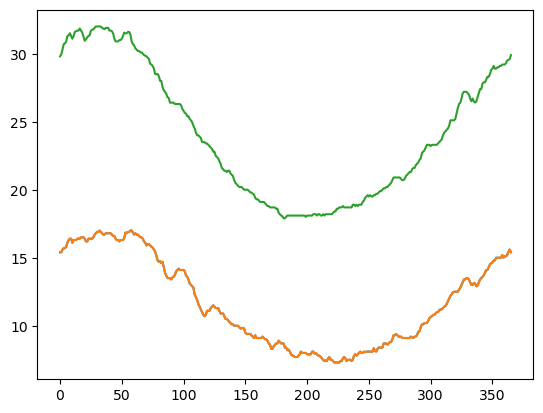

In [42]:

#%% Apply groupby functiom
MinT_Perth['year']=MinT_Perth['date'].dt.year
MinT_Perth['month']=MinT_Perth['date'].dt.month
MinT_Perth['day']=MinT_Perth['date'].dt.day

group_days = MinT_Perth.groupby(['month','day'])
Daily_Data = []
for groups,days in group_days:
    Dailypre = group_days.get_group(groups).reset_index()
    Values= Dailypre['minimum temperature (degC)']
    Values = Values.to_frame()
    Daily_Data.append(Values['minimum temperature (degC)'])




YearlyMin = STP.TnX_Rolling(3, Daily_Data, 50)
plt.plot(YearlyMin)


plt.figure(1)
plt.plot(YearlyMin)
plt.plot(YearlyMax)

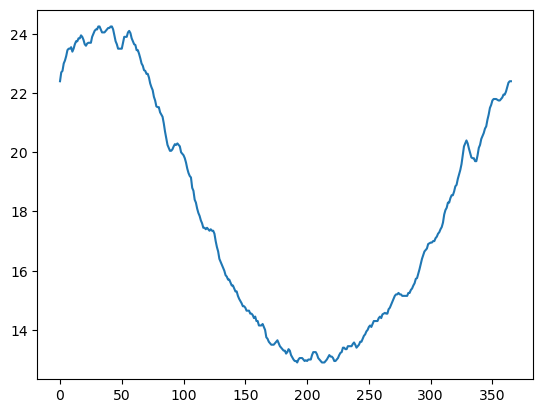

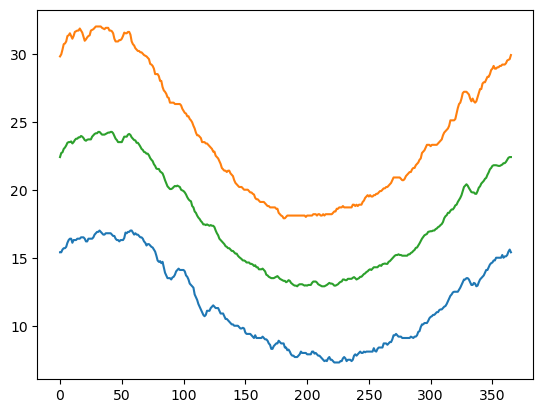

In [44]:
#%% 2.
Ave = (MaxT_Perth['maximum temperature (degC)'] + MinT_Perth['minimum temperature (degC)'])/2
Ave = pd.DataFrame(Ave,columns = ['Average Temp'])

Ave_T_Perth = pd.concat((MaxT_Perth['date'], Ave['Average Temp']), axis = 1)

#%% Apply datetime
Ave_T_Perth['date'] = pd.to_datetime(Ave_T_Perth['date'],format="%d/%m/%Y")
#%% Apply groupby functiom
Ave_T_Perth['year']=Ave_T_Perth['date'].dt.year
Ave_T_Perth['month']=Ave_T_Perth['date'].dt.month
Ave_T_Perth['day']=Ave_T_Perth['date'].dt.day

group_days = Ave_T_Perth.groupby(['month','day'])
Daily_Data = []
for groups,days in group_days:
    Dailypre = group_days.get_group(groups).reset_index()
    Values= Dailypre['Average Temp']
    Values = Values.to_frame()
    Daily_Data.append(Values['Average Temp'])




YearlyAve = STP.TnX_Rolling(3, Daily_Data, 50)
plt.plot(YearlyAve)


plt.figure(3)
plt.plot(YearlyMin)
plt.plot(YearlyMax)
plt.plot(YearlyAve)



'\nSomw Stats:\n    difference of each date and see how many above 0 to make it obvs there is a differenc\n    average diff, 90th perc and diff, 95th percentile and diff make it clear have a changing clear that there is a changing climate\n    site moves throughout history of these, small changes in poistion, and quantile based mapping based on extremes\n    on extremes, note dont mention in lit rev.\n    Summary plot nice, 93% calendar dates\n    check if nans being removed create \n    Western north America heatwave from last year broke records by a large margin and indicates what future heatwaves might look like \nThe advantage, recent enough and couple peer review papers, instead of the india Pakistan one that is happen\n\nBam extreme article, European heatwave in 2018\nPhillip\n'

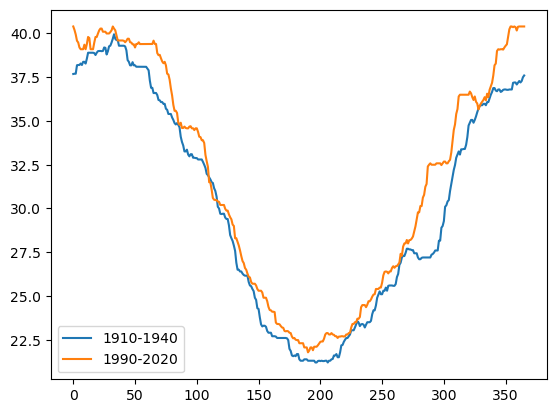

In [47]:
#%% 3.

MaxT_1910_1940 = MaxT_Perth[1:11323]
MaxT_1990_2020 =MaxT_Perth[29221:40543]
#1910 to 1940
group_days = MaxT_1910_1940.groupby(['month','day'])
Daily_Data = []
for groups,days in group_days:
    Dailypre = group_days.get_group(groups).reset_index()
    Values= Dailypre['maximum temperature (degC)']
    Values = Values.to_frame()
    Daily_Data.append(Values['maximum temperature (degC)'])

YearlyMax_1910_1940 = STP.TnX_Rolling(7, Daily_Data, 95)

#1990 to 2020
group_days = MaxT_1990_2020.groupby(['month','day'])
Daily_Data = []
for groups,days in group_days:
    Dailypre = group_days.get_group(groups).reset_index()
    Values= Dailypre['maximum temperature (degC)']
    Values = Values.to_frame()
    Daily_Data.append(Values['maximum temperature (degC)'])
YearlyMax_1990_2020 = STP.TnX_Rolling(7, Daily_Data,95)


plt.figure(4)
plt.plot(YearlyMax_1910_1940)
plt.plot(YearlyMax_1990_2020)
plt.legend(['1910-1940','1990-2020'])
'''
Somw Stats:
    difference of each date and see how many above 0 to make it obvs there is a differenc
    average diff, 90th perc and diff, 95th percentile and diff make it clear have a changing clear that there is a changing climate
    site moves throughout history of these, small changes in poistion, and quantile based mapping based on extremes
    on extremes, note dont mention in lit rev.
    Summary plot nice, 93% calendar dates
    check if nans being removed create 
    Western north America heatwave from last year broke records by a large margin and indicates what future heatwaves might look like 
The advantage, recent enough and couple peer review papers, instead of the india Pakistan one that is happen

Bam extreme article, European heatwave in 2018
Phillip
'''

97.26775956284153
DescribeResult(nobs=366, minmax=(-0.8599999999999888, 5.379999999999999), mean=1.3508469945355197, variance=1.2331173628265573, skewness=1.3602920763010535, kurtosis=1.9521450577447919)


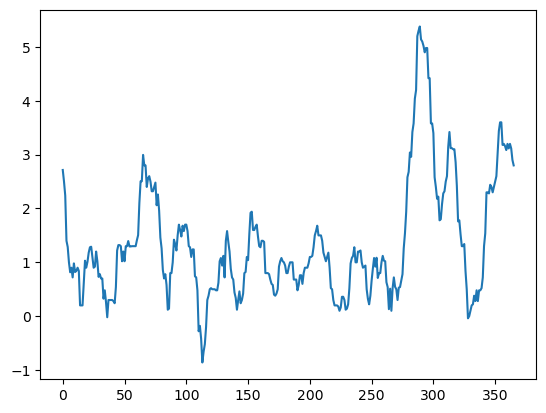

In [55]:
#%%
from scipy import stats
'''
QUALITY CHECK THAT THE QUANTILE IS DOING THE PERCENTILE BASED STUUF
'''
#Vector 1 with NaNs and the other with just values
NaN = np.NaN
VecCheck_nan = pd.Series([1, 2, 3, 4, 5, 100, 50, 25, 10, 5, 2, 1, NaN, NaN, NaN, NaN , 30, 40, 50, 60, 70, 80, NaN,NaN,NaN])
VecCheck = pd.Series([1, 2, 3, 4, 5, 100, 50, 25, 10, 5, 2, 1, 30, 40, 50, 60, 70, 80])
VecCheck.quantile(q=0.95)
VecCheck_nan.quantile(q=0.95)
#So this checks out it removes the NaN or avoids them so great.
np.nanpercentile(VecCheck_nan,95)
np.percentile(VecCheck,95)
#So with the this in mind, we know the quanitle and the percentile functions produce the same variable and 
#on top of this the quantile is much better as NaNs are skipped. however adding the nan front of the percentile produces
#the same result that skips NaNs
#%% Comparison of results.
Clim_Change_Change = pd.Series(YearlyMax_1990_2020) - pd.Series(YearlyMax_1910_1940) 
Clim_Change_Change = pd.DataFrame(Clim_Change_Change,columns = ['Temp Change'])
#Generate a plot
plt.figure(5)
plt.plot(Clim_Change_Change['Temp Change'])
#Generate the average
Stats_Diff = stats.describe(Clim_Change_Change['Temp Change'])

#Generate number of days above the non climatic change
count = 0
for i in range(366):
    if (Clim_Change_Change['Temp Change'][i] > 0):
        count = count + 1
Percent_days_above_non_CC = 100*count/len(range(366))
print(Percent_days_above_non_CC)
print(Stats_Diff)


In [52]:
pd.Series(YearlyMax_1990_2020)

0      40.400
1      40.200
2      39.940
3      39.585
4      39.485
        ...  
361    40.400
362    40.400
363    40.400
364    40.400
365    40.400
Length: 366, dtype: float64

In [50]:
YearlyMax_1910_1940


[37.685,
 37.7,
 37.7,
 38.185,
 38.2,
 38.2,
 38.285,
 38.2,
 38.379999999999995,
 38.379999999999995,
 38.279999999999994,
 38.559999999999995,
 38.9,
 38.9,
 38.9,
 38.9,
 38.9,
 38.879999999999995,
 38.76999999999999,
 38.9,
 38.989999999999995,
 39.0,
 39.0,
 38.989999999999995,
 39.0,
 39.2,
 39.18,
 38.8,
 38.98,
 39.26999999999999,
 39.3,
 39.48,
 39.7,
 39.95499999999999,
 39.7,
 39.61999999999998,
 39.61999999999998,
 39.3,
 39.3,
 39.3,
 39.3,
 39.3,
 39.25999999999999,
 39.039999999999985,
 38.48,
 38.379999999999995,
 38.18,
 38.18,
 38.35999999999999,
 38.18,
 38.18,
 38.1,
 38.1,
 38.1,
 38.1,
 38.1,
 38.095,
 38.1,
 38.1,
 38.095,
 37.989999999999995,
 37.894999999999996,
 37.3,
 36.894999999999996,
 36.894999999999996,
 36.595,
 36.6,
 36.6,
 36.48,
 36.2,
 36.18,
 36.08,
 36.08,
 35.98,
 35.98,
 35.7,
 35.639999999999986,
 35.4,
 35.4,
 35.4,
 35.2,
 35.059999999999995,
 34.879999999999995,
 34.8,
 34.879999999999995,
 34.779999999999994,
 34.639999999999986,
 34.1,
 

In [56]:

MaxT_1911_1940 = MaxT_Perth[366:11323]
MaxT_1991_2020 =MaxT_Perth[29586:40543]
#MaxT_1911_1940 = MaxT_Perth[304:821]
#MaxT_1991_2020 =MaxT_Perth[29524:30040]
# Apply datetime
MaxT_1911_1940['date'] = pd.to_datetime(MaxT_1911_1940['date'],format="%d/%m/%Y")

# Apply groupby functiom
MaxT_1911_1940['year']=MaxT_1911_1940['date'].dt.year
MaxT_1911_1940['month']=MaxT_1911_1940['date'].dt.month
MaxT_1911_1940['day']=MaxT_1911_1940['date'].dt.day

Dist1 = (MaxT_1911_1940.loc[MaxT_1911_1940['month']>=11])
Dist12 =  MaxT_1911_1940.loc[MaxT_1911_1940['month']<=3]
Dist1 = pd.concat([Dist1,Dist12]).sort_values(by=['date'], ascending=True)
Dist1 = Dist1['maximum temperature (degC)'][~np.isnan(Dist1['maximum temperature (degC)'])].values
# Apply datetime
MaxT_1991_2020['date'] = pd.to_datetime(MaxT_1991_2020['date'],format="%d/%m/%Y")
MaxT_1991_2020['year']=MaxT_1991_2020['date'].dt.year
MaxT_1991_2020['month']=MaxT_1991_2020['date'].dt.month
MaxT_1991_2020['day']=MaxT_1991_2020['date'].dt.day

Dist2 = (MaxT_1991_2020.loc[MaxT_1991_2020['month']>=11])
Dist22 =  MaxT_1991_2020.loc[MaxT_1991_2020['month']<=3]
Dist2 = pd.concat([Dist2,Dist22]).sort_values(by=['date'], ascending=True)
Dist2 = Dist2['maximum temperature (degC)'][~np.isnan(Dist2['maximum temperature (degC)'])].values



AttributeError: 'Fitter' object has no attribute 'title'

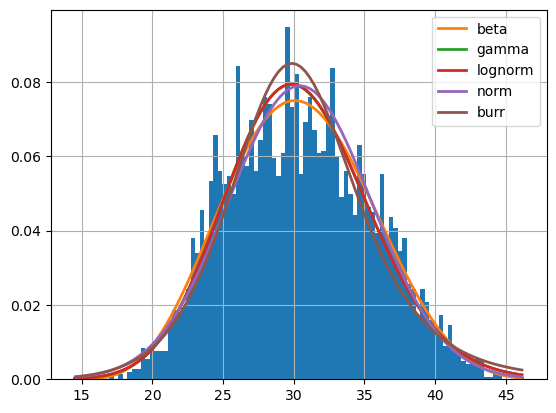

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
f1 = Fitter(Dist1, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
f1.fit()
f1.summary()
f1.get_best(method = 'sumsquare_error')
Param1 = f1.fitted_param["beta"]




f2 = Fitter(Dist2, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
f2.fit()
f2.summary()
f1.title('f2 (1991-2020)')
f2.get_best(method = 'sumsquare_error')
Param2 = f2.fitted_param["beta"]

Text(0.5, 1.0, 'Perth Maximum Temperature Distribution (Nov-Mar) 1991-2020')

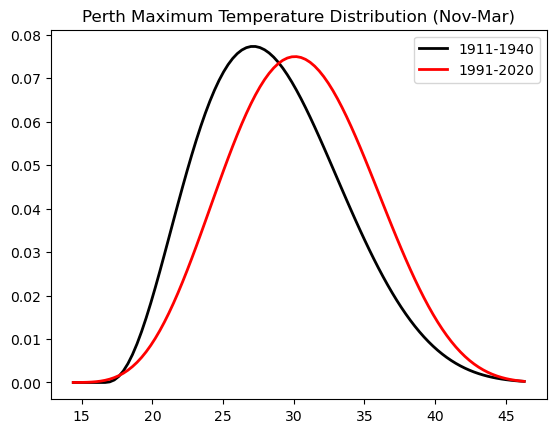

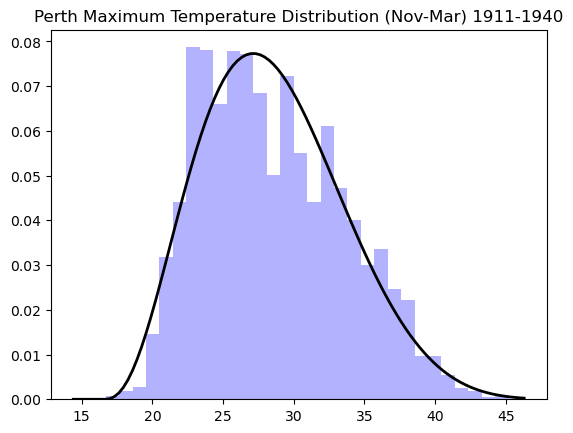

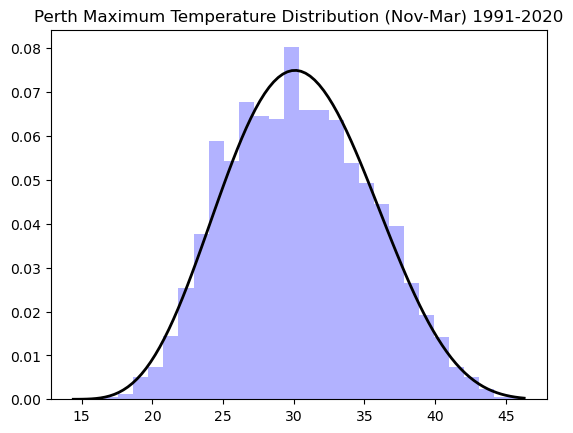

In [59]:



xmin = min(min(Dist1),min(Dist2))
xmax =max(max(Dist1),max(Dist2))

import numpy as np
from scipy.stats import norm,gamma,beta
import matplotlib.pyplot as plt

plt.figure(6)
# Generate some data for this demonstration.

# Fit a normal distribution to the data:
a1, a2,a3,a4= beta.fit(Dist1)

# Plot the histogram.
#plt.hist(Dist1, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
#xmin, xmax = plt.xlim()
x1 = np.linspace(xmin, xmax, 100)
p1 = beta.pdf(x1,a1,a2,a3,a4)
plt.plot(x1, p1, 'k', linewidth=2,color ='black',label = '1911-1940')
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu1, std1)
#plt.title(title)





# Fit a normal distribution to the data:
a5, a6, a7, a8 = beta.fit(Dist2)

# Plot the histogram.
#plt.hist(Dist2, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
p2 = beta.pdf(x1,a5,a6,a7,a8)
plt.plot(x1, p2, 'k', linewidth=2,color ='red',label = '1991-2020')
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu1, std1)
#plt.title(title)
#plt.hist(Dist2, bins=25, density=True, alpha=0.6, color='g'

plt.title('Perth Maximum Temperature Distribution (Nov-Mar)')
plt.legend()
#In conclusion within the extended summer, the normal distubtion of maximum days has only shifted around 1.8C warmer with no change in variance.
#This means that there is no indication that cold spells are getting colder and more extreme it is that the chance of a cold spell
#is less liekly and the chance of a heatwave is more likely.


plt.figure(7)
plt.plot(x1, p1, 'k', linewidth=2,color ='black')
plt.hist(Dist1, bins=30, density=True, alpha=0.3, color='b')
plt.title('Perth Maximum Temperature Distribution (Nov-Mar) 1911-1940')


plt.figure(11)
plt.plot(x1, p2, 'k', linewidth=2,color ='black')
plt.hist(Dist2, bins=30, density=True, alpha=0.3, color='b')
plt.title('Perth Maximum Temperature Distribution (Nov-Mar) 1991-2020')



30.43147454264933

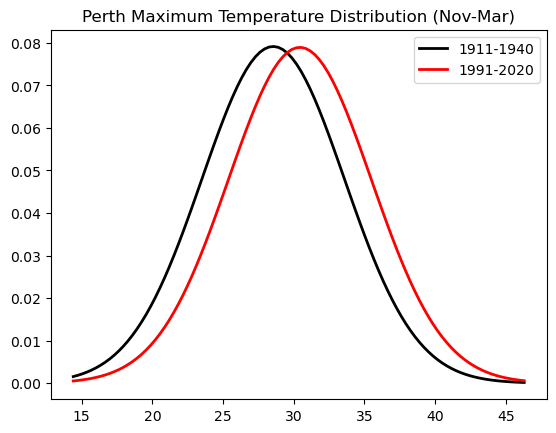

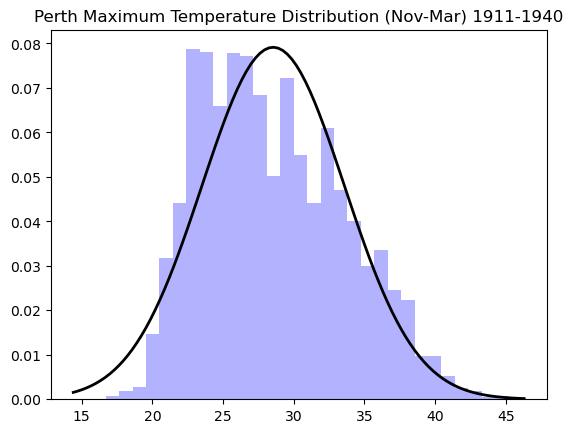

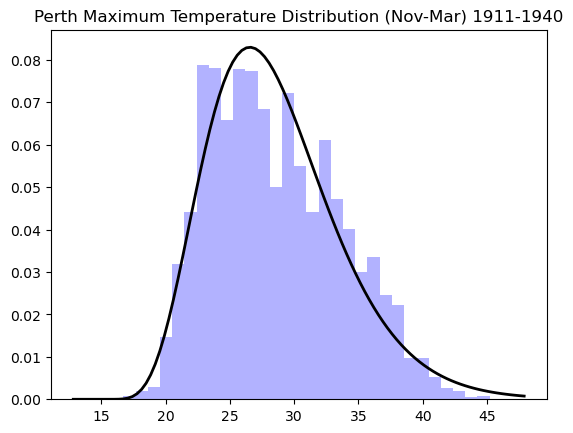

In [60]:








xmin = min(min(Dist1),min(Dist2))
xmax =max(max(Dist1),max(Dist2))

import numpy as np
from scipy.stats import norm,gamma
import matplotlib.pyplot as plt

plt.figure(6)
# Generate some data for this demonstration.

# Fit a normal distribution to the data:
a1, a2 = norm.fit(Dist1)

# Plot the histogram.
#plt.hist(Dist1, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
#xmin, xmax = plt.xlim()
x1 = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x1,a1, a2)
plt.plot(x1, p1, 'k', linewidth=2,color ='black',label = '1911-1940')
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu1, std1)
#plt.title(title)





# Fit a normal distribution to the data:
a4, a5 = norm.fit(Dist2)

# Plot the histogram.
#plt.hist(Dist2, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
p2 = norm.pdf(x1,a4, a5)
plt.plot(x1, p2, 'k', linewidth=2,color ='red',label = '1991-2020')
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu1, std1)
#plt.title(title)
#plt.hist(Dist2, bins=25, density=True, alpha=0.6, color='g')
plt.title('Perth Maximum Temperature Distribution (Nov-Mar)')
plt.legend()
#In conclusion within the extended summer, the normal distubtion of maximum days has only shifted around 1.8C warmer with no change in variance.
#This means that there is no indication that cold spells are getting colder and more extreme it is that the chance of a cold spell
#is less liekly and the chance of a heatwave is more likely.


plt.figure(7)
plt.plot(x1, p1, 'k', linewidth=2,color ='black')
plt.hist(Dist1, bins=30, density=True, alpha=0.3, color='b')
plt.title('Perth Maximum Temperature Distribution (Nov-Mar) 1911-1940')


plt.figure(11)
plt.plot(x1, p2, 'k', linewidth=2,color ='black')
plt.hist(Dist2, bins=30, density=True, alpha=0.3, color='b')
plt.title('Perth Maximum Temperature Distribution (Nov-Mar) 1991-2020')
#Thought experience:might suggest the synoptic conditions arent changed that much the world is warmed but actually the weather patterns havent changed, so weather patterns and only a hotter experience, if there was a change in synoptic systems, possible vairance change
#%% gamma fit
plt.figure(8)
# Generate some data for this demonstration.

# Fit a normal distribution to the data:
a1, a2,a3 = gamma.fit(Dist1)

# Plot the histogram.
#plt.hist(Dist1, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
#xmin, xmax = plt.xlim()
x1 = np.linspace(xmin, xmax, 100)
p1 = gamma.pdf(x1,a1, a2,a3)
plt.plot(x1, p1, 'k', linewidth=2,color ='black',label = '1910-1940')
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu1, std1)
#plt.title(title)





# Fit a normal distribution to the data:
a4, a5,a6 = gamma.fit(Dist2)

# Plot the histogram.
#plt.hist(Dist2, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
p2 = gamma.pdf(x1,a4, a5, a6)
plt.plot(x1, p2, 'k', linewidth=2,color ='red',label = '1990-2020')
plt.title('Perth Maximum Temperature Distribution (Nov-Mar)')
plt.legend()



plt.figure(9)
plt.plot(x1, p1, 'k', linewidth=2,color ='black',label = '1910-1940')
plt.hist(Dist1, bins=30, density=True, alpha=0.3, color='b')
plt.title('Perth Maximum Temperature Distribution (Nov-Mar) 1911-1940')
plt.figure(10)
plt.plot(x1, p2, 'k', linewidth=2,color ='black')
plt.hist(Dist2, bins=30, density=True, alpha=0.3, color='b')
plt.title('Perth Maximum Temperature Distribution (Nov-Mar) 1991-2020')


MaxT_1991_2020['date'] = pd.to_datetime(MaxT_1991_2020['date'],format="%d/%m/%Y")

# Apply groupby functiom
MaxT_1991_2020['year']=MaxT_1991_2020['date'].dt.year

np.mean(Dist1)
np.mean(Dist2)

In [61]:
#%%minimum variant
MinT_Perth =MinT_Perth.set_index('date')
MaxT_Perth = MaxT_Perth.set_index('date')
#%%

In [67]:


MinT_1911_1940 = MinT_Perth.loc['1920-01-01':'1930-04-01']
MinT_1991_2020 =MinT_Perth['1920-01-01':'1929-12-01']

MinT_1911_1940 = MinT_Perth[366:11323]
MinT_1991_2020 =MinT_Perth[29586:40543]
# Apply datetime

MinT_1911_1940 = MinT_1911_1940.reset_index()
# Apply groupby functiom
MinT_1911_1940['year']=MinT_1911_1940['date'].dt.year
MinT_1911_1940['month']=MinT_1911_1940['date'].dt.month
MinT_1911_1940['day']=MinT_1911_1940['date'].dt.day

Dist1 = (MinT_1911_1940.loc[MinT_1911_1940['month']>=11])
Dist12 =  MinT_1911_1940.loc[MinT_1911_1940['month']<=3]
Dist1 = pd.concat([Dist1,Dist12]).sort_values(by=['date'], ascending=True)
Dist1 = Dist1['minimum temperature (degC)'][~np.isnan(Dist1['minimum temperature (degC)'])].values
# Apply datetime

MinT_1991_2020 = MinT_1991_2020.reset_index()

MinT_1991_2020['year']=MinT_1991_2020['date'].dt.year
MinT_1991_2020['month']=MinT_1991_2020['date'].dt.month
MinT_1991_2020['day']=MinT_1991_2020['date'].dt.day

Dist2 = (MinT_1991_2020.loc[MinT_1991_2020['month']>=11])
Dist22 =  MinT_1991_2020.loc[MinT_1991_2020['month']<=3]
Dist2 = pd.concat([Dist2,Dist22]).sort_values(by=['date'], ascending=True)
Dist2 = Dist2['minimum temperature (degC)'][~np.isnan(Dist2['minimum temperature (degC)'])].values

In [64]:
MinT_1911_1940

minimum temperature (degC)  site number site name  year  month  \
date                                                                         
1911-01-02                        16.6          NaN       NaN  1911      1   
1911-01-03                        12.6          NaN       NaN  1911      1   
1911-01-04                        16.6          NaN       NaN  1911      1   
1911-01-05                         9.7          NaN       NaN  1911      1   
1911-01-06                        10.4          NaN       NaN  1911      1   
...                                ...          ...       ...   ...    ...   
1940-12-27                         7.7          NaN       NaN  1940     12   
1940-12-28                        12.1          NaN       NaN  1940     12   
1940-12-29                        10.8          NaN       NaN  1940     12   
1940-12-30                         9.0          NaN       NaN  1940     12   
1940-12-31                        11.5          NaN       NaN  1940     12   

            day  
date             
1911-01-02    2  
1911-01-03    3  
1911-01-04    4  
1911-01-05    5  
1911-01-06    6  
...         ...  
1940-12-27   27  
1940-12-28   28  
1940-12-29   29  
1940-12-30   30  
1940-12-31   31  

[10957 rows x 6 columns]

In [68]:
#%% Test
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
f1 = Fitter(Dist1, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
f1.fit()
f1.summary()
print(f1.get_best(method = 'sumsquare_error'))
Param1 = f1.fitted_param["beta"]


{'beta': {'a': 4.474988828807018, 'b': 5.4373431318762036, 'loc': 2.3323857043176437, 'scale': 25.594700496190658}}


{'beta': {'a': 92.56650085254233, 'b': 57.1723247032496, 'loc': -44.632379025240965, 'scale': 98.00973409855497}}


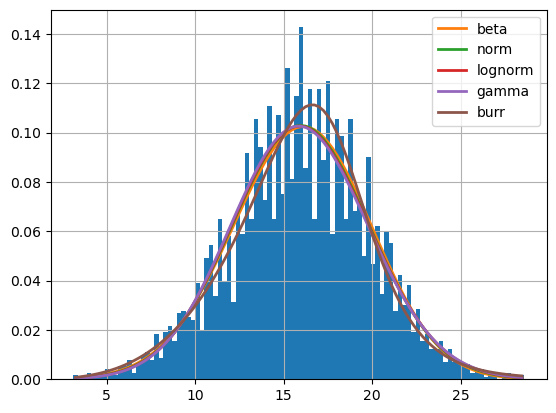

In [69]:

#%%
f2 = Fitter(Dist2, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
f2.fit()
f2.summary()
print(f2.get_best(method = 'sumsquare_error'))
Param2 = f2.fitted_param["beta"]


Text(0.5, 1.0, 'Perth Minimum Temperature Distribution (Nov-Mar) 1991-2020')

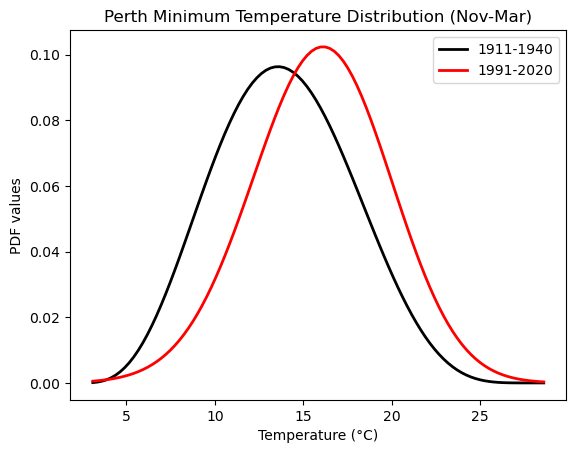

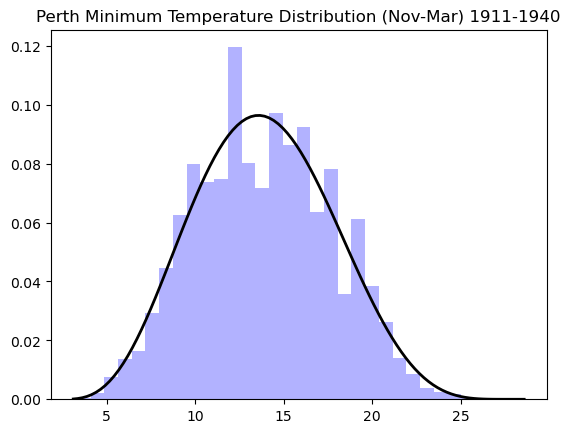

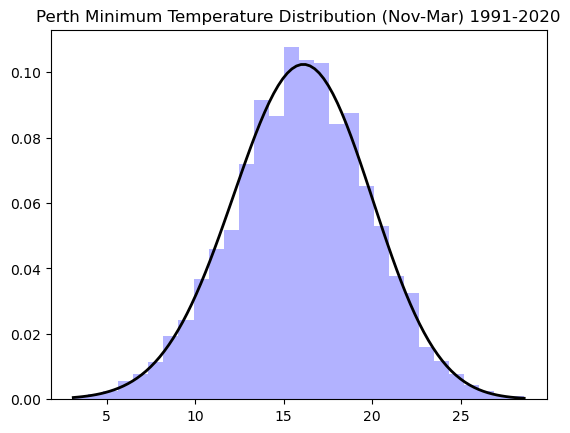

In [70]:

#%%
xmin = min(min(Dist1),min(Dist2))
xmax =max(max(Dist1),max(Dist2))

import numpy as np
from scipy.stats import norm,gamma,beta,lognorm
import matplotlib.pyplot as plt

plt.figure(6)
# Generate some data for this demonstration.

# Fit a normal distribution to the data:
a1, a2,a3,a4= beta.fit(Dist1)

# Plot the histogram.
#plt.hist(Dist1, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
#xmin, xmax = plt.xlim()
x1 = np.linspace(xmin, xmax, 100)
p1 = beta.pdf(x1,a1,a2,a3,a4)
plt.plot(x1, p1, 'k', linewidth=2,color ='black',label = '1911-1940')
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu1, std1)
#plt.title(title)





# Fit a normal distribution to the data:
a5, a6, a7, a8 = beta.fit(Dist2)

# Plot the histogram.
#plt.hist(Dist2, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
p2 = beta.pdf(x1,a5,a6,a7,a8)
plt.plot(x1, p2, 'k', linewidth=2,color ='red',label = '1991-2020')
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu1, std1)
#plt.title(title)
#plt.hist(Dist2, bins=25, density=True, alpha=0.6, color='g')
plt.title('Perth Minimum Temperature Distribution (Nov-Mar)')
plt.xlabel('Temperature (\N{DEGREE SIGN}C)')
plt.ylabel('PDF values')
plt.legend()
#In conclusion within the extended summer, the normal distubtion of maximum days has only shifted around 1.8C warmer with no change in variance.
#This means that there is no indication that cold spells are getting colder and more extreme it is that the chance of a cold spell
#is less liekly and the chance of a heatwave is more likely.


plt.figure(7)
plt.plot(x1, p1, 'k', linewidth=2,color ='black')
plt.hist(Dist1, bins=30, density=True, alpha=0.3, color='b')
plt.title('Perth Minimum Temperature Distribution (Nov-Mar) 1911-1940')


plt.figure(11)
plt.plot(x1, p2, 'k', linewidth=2,color ='black')
plt.hist(Dist2, bins=30, density=True, alpha=0.3, color='b')
plt.title('Perth Minimum Temperature Distribution (Nov-Mar) 1991-2020')



{'beta': {'a': 5.4520457659007, 'b': 5.057433210429963, 'loc': 15.201647554138445, 'scale': 32.55284899941301}}
{'beta': {'a': 2.2578946013865417, 'b': 3.324643608984768, 'loc': 19.28068577361925, 'scale': 25.645040377222074}}


<Figure size 640x480 with 0 Axes>

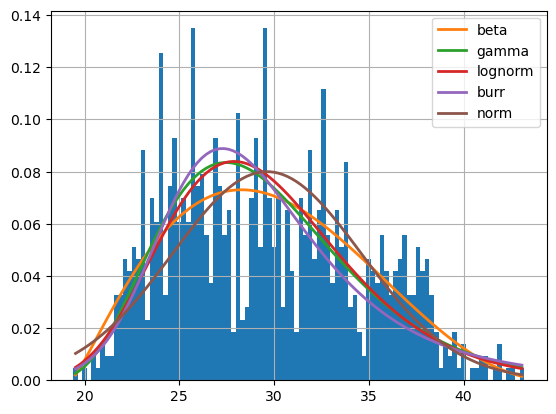

<Figure size 640x480 with 0 Axes>

In [72]:


#%% New distribution stuff with what I know now
MaxT_Perth = MaxT_Perth
MinT_Perth = MinT_Perth
#%%

#MaxT_Perth = Dist2.set_index('date')



MaxT_1920 = MaxT_Perth.loc['1920-01-01':'1929-12-31']
MaxT_1920 = MaxT_1920.reset_index()
MaxT_1920['month']=MaxT_1920['date'].dt.month


Dist1 = (MaxT_1920.loc[MaxT_1920['month']>=12])
Dist22 =  MaxT_1920.loc[MaxT_1920['month']<=2]
Dist2 = pd.concat([Dist1,Dist22]).sort_values(by=['date'], ascending=True)
MaxT_1920 = Dist2['maximum temperature (degC)'][~np.isnan(Dist2['maximum temperature (degC)'])].values






MaxT_2010 = MaxT_Perth.loc['2010-01-01':'2019-12-31']


MaxT_2010 = MaxT_2010.reset_index()
MaxT_2010['month']=MaxT_2010['date'].dt.month


Dist1 = (MaxT_2010.loc[MaxT_2010['month']>=12])
Dist22 =  MaxT_2010.loc[MaxT_2010['month']<=2]
Dist2 = pd.concat([Dist1,Dist22]).sort_values(by=['date'], ascending=True)
MaxT_2010 = Dist2['maximum temperature (degC)'][~np.isnan(Dist2['maximum temperature (degC)'])].values


#chc40more2010 = 100*len(MaxT_2010[MaxT_2010>=40])/len(MaxT_2010)
#chc40more1920 = 100*len(MaxT_1920[MaxT_1920>=40])/len(MaxT_1920)
#print(chc40more2010,chc40more1920)













f1 = Fitter(MaxT_2010, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
f1.fit()
f1.summary()
print(f1.get_best(method = 'sumsquare_error'))
Param1 = f1.fitted_param["beta"]
f2 = Fitter(MaxT_1920, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
f2.fit()
f2.summary()
print(f2.get_best(method = 'sumsquare_error'))
Param1 = f1.fitted_param["beta"]

#Best is Gamma




plt.figure(6)


3164.2055347768564 -238.07523860447122 0.08537840131936753


AttributeError: 'numpy.float64' object has no attribute 'pdf'

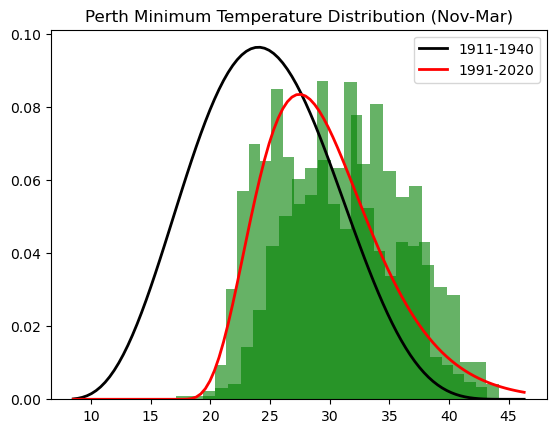

In [77]:



plt.figure(6)








# Generate some data for this demonstration.

# Fit a gamma distribution to the data:
    
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(MaxT_2010)
print(fit_alpha, fit_loc, fit_beta )

gamma.ppf(40, fit_alpha,loc =fit_loc, scale = fit_beta)
#fit_loc loccation of where the first point starts
Temp1 = MaxT_2010
chc40more = 100*len(Temp1[Temp1>=40])/len(Temp1)












# Plot the histogram.
plt.hist(MaxT_2010, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmax = MaxT_Perth['maximum temperature (degC)'].max()
xmin = MaxT_Perth['maximum temperature (degC)'].min()
#xmin, xmax = plt.xlim()
x1 = np.linspace(xmin, xmax, 100)
#p1 = gamma.rsv(fit_alpha,fit_loc,fit_beta)
plt.plot(x1, p1, 'k', linewidth=2,color ='black',label = '1911-1940')
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu1, std1)
#plt.title(title)





# Fit a normal distribution to the data:
a5, a6, a7 = gamma.fit(MaxT_1920)
Temp2 = MaxT_1920
chc40more1920 = 100*len(Temp2[Temp2>=40])/len(Temp2)
# Plot the histogram.
plt.hist(MaxT_1920, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.

p2 = gamma.pdf(x1,a5,a6,a7)
plt.plot(x1, p2, 'k', linewidth=2,color ='red',label = '1991-2020')
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu1, std1)
#plt.title(title)
#plt.hist(Dist2, bins=25, density=True, alpha=0.6, color='g')
plt.title('Perth Minimum Temperature Distribution (Nov-Mar)')
plt.legend()

from scipy.stats import gamma,burr

#Chnace above 40C
Y_1920 = gamma.pdf(x = 25, a = a1,scale = a2, loc = a3)
Y_2010 = gamma.pdf(x = 25, a = a5,scale = a6, loc = a7)




print(Y_2010.pdf(40))
print(gamma.pdf(x=2, a=2, scale=1, loc=0))

chc40more2010 = 100*len(Temp1[Temp1>=40])/len(Temp1)
chc40more1920 = 100*len(Temp2[Temp2>=40])/len(Temp2)











In [74]:
MaxT_1920

array([26.1, 26. , 23. , 23. , 23.1, 27.4, 32.6, 32.4, 37.5, 37.7, 38.1,
       32.2, 26.1, 25.4, 31.7, 33.8, 35.7, 37.1, 39.2, 39.2, 38.6, 37.1,
       37.2, 38.2, 33.9, 38.1, 42.4, 26.8, 26.1, 27.4, 31.7, 33.8, 34.9,
       26.9, 25.4, 30.8, 32.9, 36. , 39.1, 24.7, 23. , 32.9, 31. , 32. ,
       30.2, 27.7, 24.3, 31.3, 36.5, 36. , 25.7, 23.3, 25.4, 27. , 26.8,
       25.6, 26.8, 32.4, 35.2, 36.1, 37.3, 24.1, 24.5, 26.1, 29.1, 30.7,
       31.7, 36.5, 30.3, 25.1, 22.9, 23. , 23.6, 26.1, 26.5, 32.4, 38.6,
       39. , 32.6, 28.6, 25.6, 26. , 25.6, 24.1, 25.5, 26.8, 25.1, 26.4,
       24.7, 24.7, 22.2, 22.4, 26.8, 37. , 32.6, 24.1, 22.8, 23.2, 22.4,
       27. , 33.4, 36.9, 37.9, 35.7, 36.8, 37.1, 35.7, 33.8, 32.6, 32.1,
       27.6, 28.3, 27.2, 27.6, 24.5, 32.1, 35.3, 40.4, 43.2, 38.8, 26.5,
       25.1, 27.8, 36.7, 37.8, 31.5, 37.9, 41.8, 41. , 41.8, 33.6, 30.7,
       31.8, 36.1, 38.1, 32.9, 36.7, 40. , 37.8, 34.6, 30.1, 33.5, 29.7,
       28.9, 32.7, 32. , 28.1, 32.6, 36. , 36.2, 22

## FOR THE BASIS OF THE TEMPERATURE STATS REVIEW 


In [78]:

#%%
#Load Data In
MaxT_Perth_Data  = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmax.009021.daily.csv")
MaxT_Perth = MaxT_Perth_Data.copy()
MaxT_Perth = MaxT_Perth.drop(0)

MaxT_Perth['date'] = pd.to_datetime(MaxT_Perth['date'],format="%d/%m/%Y")

#Load Data only using min Temperature for the initial start
MaxT_Perth_Data  = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmin.009021.daily.csv")
MinT_Perth = MinT_Perth_Data.copy()
MinT_Perth = MinT_Perth.drop(0)

MinT_Perth['date'] = pd.to_datetime(MinT_Perth['date'],format="%d/%m/%Y")

MaxT_Perth = MaxT_Perth.set_index('date')
MinT_Perth = MinT_Perth.set_index('date')








{'beta': {'a': 5.4520457659007, 'b': 5.057433210429963, 'loc': 15.201647554138445, 'scale': 32.55284899941301}}
{'beta': {'a': 2.2578946013865417, 'b': 3.324643608984768, 'loc': 19.28068577361925, 'scale': 25.645040377222074}}
{'burr': {'c': 11.713266194248124, 'd': 0.5011873798034119, 'loc': -0.11706979344214714, 'scale': 19.278765461725712}}
{'beta': {'a': 2.7863237170506707, 'b': 3.3493014248901547, 'loc': 4.894666478187735, 'scale': 20.309320553489002}}


(3.0, 30.0)

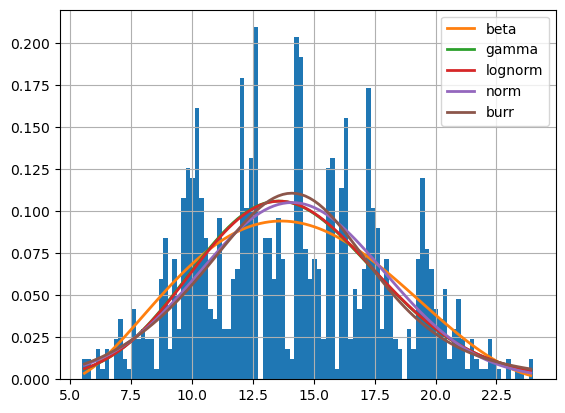

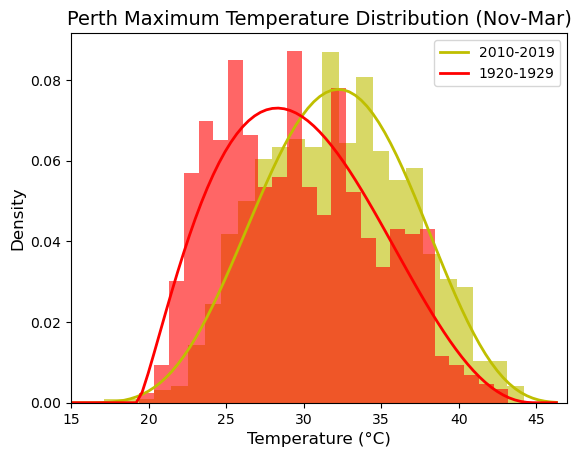

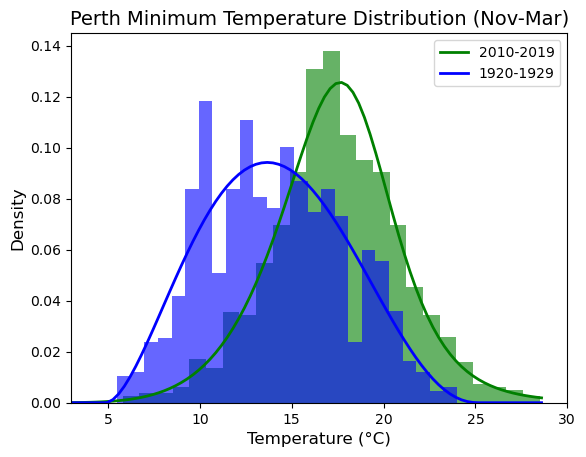

In [79]:







#%% Get Extended Summer only between 1920-1929 and 2010-2019


#1920-1929
MaxT_1920 = MaxT_Perth.loc['1920-01-01':'1929-12-31']
MaxT_1920 = MaxT_1920.reset_index()
MaxT_1920['month']=MaxT_1920['date'].dt.month

Dist1 = (MaxT_1920.loc[MaxT_1920['month']>=12])
Dist22 =  MaxT_1920.loc[MaxT_1920['month']<=2]
MaxES1920 = pd.concat([Dist1,Dist22]).sort_values(by=['date'], ascending=True)
MaxT_1920 = MaxES1920['maximum temperature (degC)'][~np.isnan(MaxES1920['maximum temperature (degC)'])].values

MinT_1920 = MinT_Perth.loc['1920-01-01':'1929-12-31']
MinT_1920 = MinT_1920.reset_index()
MinT_1920['month']=MinT_1920['date'].dt.month

Dist12 = (MinT_1920.loc[MinT_1920['month']>=12])
Dist223 =  MinT_1920.loc[MinT_1920['month']<=2]
MinES1920 = pd.concat([Dist12,Dist223]).sort_values(by=['date'], ascending=True)
MinT_1920 = MinES1920['minimum temperature (degC)'][~np.isnan(MinES1920['minimum temperature (degC)'])].values


#2010-2019
MaxT_2010 = MaxT_Perth.loc['2010-01-01':'2019-12-31']
MaxT_2010 = MaxT_2010.reset_index()
MaxT_2010['month']=MaxT_2010['date'].dt.month


Dist11 = (MaxT_2010.loc[MaxT_2010['month']>=12])
Dist222 =  MaxT_2010.loc[MaxT_2010['month']<=2]
MaxES2010 = pd.concat([Dist11,Dist222]).sort_values(by=['date'], ascending=True)
MaxT_2010 = MaxES2010['maximum temperature (degC)'][~np.isnan(MaxES2010['maximum temperature (degC)'])].values

MinT_2010 = MinT_Perth.loc['2010-01-01':'2019-12-31']
MinT_2010 = MinT_2010.reset_index()
MinT_2010['month']=MinT_2010['date'].dt.month


Dist112 = (MinT_2010.loc[MinT_2010['month']>=12])
Dist2223 =  MinT_2010.loc[MinT_2010['month']<=2]
MinES2010 = pd.concat([Dist112,Dist2223]).sort_values(by=['date'], ascending=True)
MinT_2010 = MinES2010['minimum temperature (degC)'][~np.isnan(MinES2010['minimum temperature (degC)'])].values



#%%Get the distributions
from scipy.stats import gamma,burr

plt.figure(10)

f1 = Fitter(MaxT_2010, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
f1.fit()
f1.summary()
print(f1.get_best(method = 'sumsquare_error'))
a1, a2,a3,a4 = f1.fitted_param["beta"]



f2 = Fitter(MaxT_1920, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
f2.fit()
f2.summary()
print(f2.get_best(method = 'sumsquare_error'))
a5, a6,a7,a8 = f2.fitted_param["beta"]


f3 = Fitter(MinT_2010, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
f3.fit()
f3.summary()
print(f3.get_best(method = 'sumsquare_error'))
a9,a10,a11,a12 = f3.fitted_param["burr"]



f4= Fitter(MinT_1920, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
f4.fit()
f4.summary()
print(f4.get_best(method = 'sumsquare_error'))
a13,a14,a15,a16 = f4.fitted_param["beta"]

#Plot them
xmax = MaxT_Perth['maximum temperature (degC)'].max()
xmin = MaxT_Perth['maximum temperature (degC)'].min()
xmax2 = MinT_Perth['minimum temperature (degC)'].max()
xmin2 = MinT_Perth['minimum temperature (degC)'].min()

x1 = np.linspace(xmin, xmax, 100)
x2 = np.linspace(xmin2, xmax2, 100)


plt.figure(1)
plt.hist(MaxT_2010, bins=25, density=True, alpha=0.6, color='y')
plt.hist(MaxT_1920, bins=25, density=True, alpha=0.6, color='red')

p1 = beta.pdf(x1,a1,a2,a3,a4)
plt.plot(x1, p1, 'k', linewidth=2,color ='y',label = '2010-2019')


p2 = beta.pdf(x1,a5,a6,a7,a8)
plt.plot(x1, p2, 'k', linewidth=2,color ='red',label = '1920-1929')
plt.legend()
plt.title("Perth Maximum Temperature Distribution (Nov-Mar)",fontsize =14)
plt.xlabel("Temperature (\N{DEGREE SIGN}C)",fontsize =12)
plt.ylabel("Density",fontsize =12)
plt.xlim([15,47])

plt.figure(2)
plt.hist(MinT_2010, bins=25, density=True, alpha=0.6, color='green')
plt.hist(MinT_1920, bins=25, density=True, alpha=0.6, color='blue')

p3 = burr.pdf(x2,a9,a10,a11,a12)
plt.plot(x2, p3, 'k', linewidth=2,color ='green',label = '2010-2019')


p4 = beta.pdf(x2,a13,a14,a15,a16)
plt.plot(x2, p4, 'k', linewidth=2,color ='blue',label = '1920-1929')
plt.legend()
plt.title("Perth Minimum Temperature Distribution (Nov-Mar)",fontsize =14)
plt.xlabel("Temperature (\N{DEGREE SIGN}C)",fontsize =12)
plt.ylabel("Density",fontsize =12)
plt.xlim([3,30])


## PERCENTILE IMPROVE

#%% This is the coding that will be used for the presentation in my masters coursework.
'''
This section will have a few graphs in place:
    Figure 1
    This is the comparision of 15 day PB to 0 day PB with max and min
    
    Figure 2
    1.1 90th percentile Max/Min
    2.1 90th percentile deviation
    1.2 95th percentile Max/Min
    2.2 95th Percentile deviadeviation

From here I will also generate statistics that provide means for these 90th percentile stuff
and also the days that the modern time is about the old time.
'''


In [81]:


#%% PACKAGES
import pandas as pd, numpy as np,matplotlib.pyplot as plt
from scipy import stats

In [83]:
#%% MAXIMUM and Minimum Data
#Maximum

#Load the data in and groupby for the boxes in order for the percentile base funciton to work

# Load Data only using max Temperature for the initial start
MaxT_Perth_Data  = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmax.009021.daily.csv")
MaxT_Perth = MaxT_Perth_Data.copy()
MaxT_Perth = MaxT_Perth.drop(0)

# Apply datetime
MaxT_Perth['date'] = pd.to_datetime(MaxT_Perth['date'],format="%d/%m/%Y")

# Apply groupby functiom
MaxT_Perth['year']=MaxT_Perth['date'].dt.year
MaxT_Perth['month']=MaxT_Perth['date'].dt.month
MaxT_Perth['day']=MaxT_Perth['date'].dt.day

#Separate into monthly and daily bins
group_days_Max = MaxT_Perth.groupby(['month','day'])
Daily_Data_Max = []
for groups,days in group_days_Max:
    #Extract the specified day bin
    Dailypre_Max = group_days_Max.get_group(groups).reset_index()
    #Get the maximum values for the entire record for that calendar day
    Values_Max= Dailypre_Max['maximum temperature (degC)']
    #Make it a dataframe so it is appendable
    Values_Max = Values_Max.to_frame()
    #Append that bin to that day so there will be 366 bins with  x years data for that day
    Daily_Data_Max.append(Values_Max['maximum temperature (degC)'])

#Minimum
#Everything described above in the maximum section is similar for this minimum section.

#Load Data only using min Temperature for the initial start
MinT_Perth_Data  = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmin.009021.daily.csv")
MinT_Perth = MinT_Perth_Data.copy()
MinT_Perth = MinT_Perth.drop(0)

# Apply datetime
MinT_Perth['date'] = pd.to_datetime(MinT_Perth['date'],format="%d/%m/%Y")

#Apply groupby functiom
MinT_Perth['year']=MinT_Perth['date'].dt.year
MinT_Perth['month']=MinT_Perth['date'].dt.month
MinT_Perth['day']=MinT_Perth['date'].dt.day


group_days_Min = MinT_Perth.groupby(['month','day'])
Daily_Data_Min = []
for groups,days in group_days_Min:
    Dailypre_Min = group_days_Min.get_group(groups).reset_index()
    Values_Min= Dailypre_Min['minimum temperature (degC)']
    Values_Min = Values_Min.to_frame()
    Daily_Data_Min.append(Values_Min['minimum temperature (degC)'])


In [84]:

#%%
#Import the functions created in a separate file.
import STP as function_M



In [85]:

#%% Lets Generate Figure 1
#We will compare the 90th percentile graphs here
CalendarDayMax_0 = function_M.TnX_Rolling(0, Daily_Data_Max, 90)
CalendarDayMin_0 = function_M.TnX_Rolling(0, Daily_Data_Min, 90)

#Now the 15 day percentile for the calendar day.
CalendarDayMax_15 = function_M.TnX_Rolling(7, Daily_Data_Max, 90)
CalendarDayMin_15 = function_M.TnX_Rolling(7, Daily_Data_Min, 90)



Percent Days Above
90.98360655737704
DescribeResult(nobs=366, minmax=(-0.6600000000000001, 3.760000000000005), mean=1.1777595628415303, variance=0.8799237338124115, skewness=0.7374563078959905, kurtosis=0.12346237364681567)


Percent Days Above
96.44808743169399
DescribeResult(nobs=366, minmax=(-0.3000000000000007, 3.0), mean=1.260546448087432, variance=0.6292018923572128, skewness=0.04097481866045405, kurtosis=-1.1866390100106299)


Percent Days Above
97.26775956284153
DescribeResult(nobs=366, minmax=(-0.8599999999999888, 5.379999999999999), mean=1.3508469945355197, variance=1.2331173628265573, skewness=1.3602920763010535, kurtosis=1.9521450577447919)


Percent Days Above
100.0
DescribeResult(nobs=366, minmax=(0.09999999999999964, 3.6950000000000003), mean=1.520737704918032, variance=0.7551989063552658, skewness=0.34952360869442184, kurtosis=-0.9433978197354573)


Percent Days Above
98.90710382513662
DescribeResult(nobs=366, minmax=(-0.29999999999999716, 3.1000000000000014), mean=1.

<Figure size 640x480 with 0 Axes>

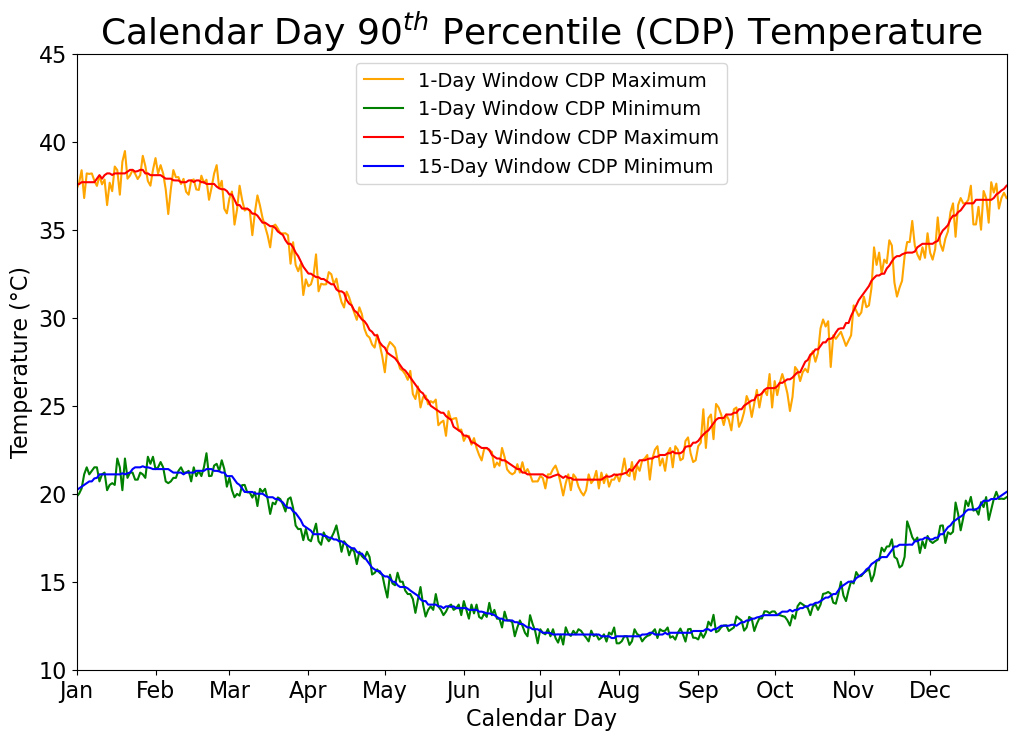

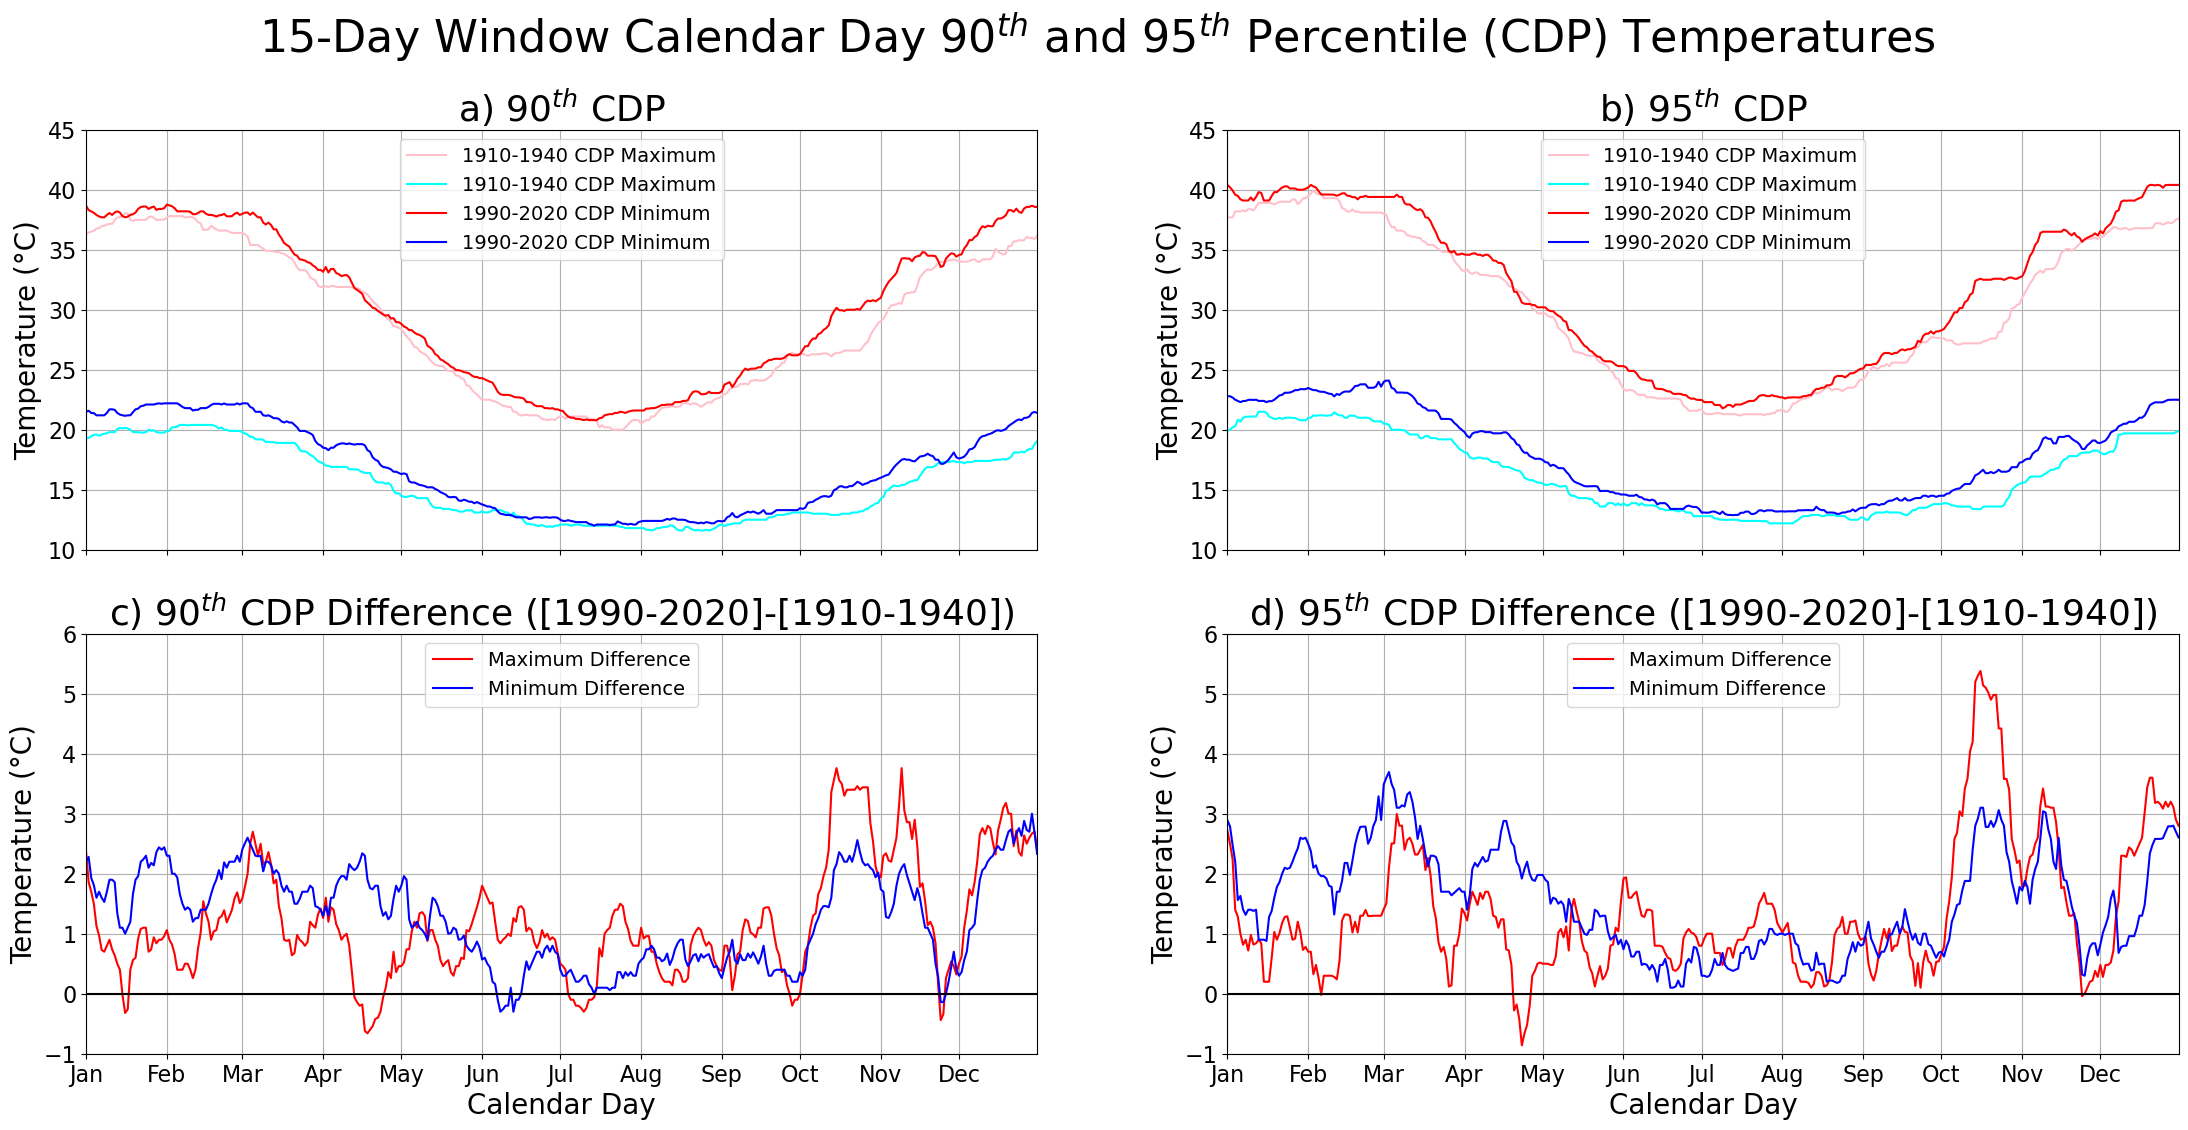

In [88]:
#%%
#Lets graph the comparisons
plt.figure(1)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(CalendarDayMax_0,color = 'orange')
ax.plot(CalendarDayMin_0,color = 'green')
ax.plot(CalendarDayMax_15, color = 'red')
ax.plot(CalendarDayMin_15, color = 'blue')
ax.legend(['1-Day Window CDP Maximum','1-Day Window CDP Minimum','15-Day Window CDP Maximum','15-Day Window CDP Minimum'],loc=9,prop={'size': 14})

ax.set_title('Calendar Day 90$^{th}$ Percentile (CDP) Temperature',size=26)  
ax.set_xlim([0,365])
ax.set_ylim([10,45])

months_start = [0,31,60,91,121,152,182,213,244,274,305,335]
month_names =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticks(months_start)
ax.set_xticklabels(month_names)

ax.set_xlabel('Calendar Day',size=16)
ax.set_ylabel('Temperature (\N{DEGREE SIGN}C)',size=16)
ax.tick_params(labelsize=16)
'''
15 Days is chosen as it still captures slight variations hwoever it continues to caputre a smoother seaosnal signal.
'''

#%% Lets Generate Figure 2

#This requires more coding and spliting into 2 time periods, Federation and Millenial 
'''1910/1/1-1940/31/12'''
#Maximumn/Minimum For the Period Millenial Period
MaxT_1910_1940 = MaxT_Perth[1:11323]
MinT_1910_1940 = MinT_Perth[1:11323]


#Separate into monthly and daily bins
group_days_Max_O = MaxT_1910_1940.groupby(['month','day'])
Daily_Data_Max_O = []
for groups,days in group_days_Max_O:
    #Extract the specified day bin
    Dailypre_Max_O = group_days_Max_O.get_group(groups).reset_index()
    #Get the maximum values for the entire record for that calendar day
    Values_Max_O= Dailypre_Max_O['maximum temperature (degC)']
    #Make it a dataframe so it is appendable
    Values_Max_O = Values_Max_O.to_frame()
    #Append that bin to that day so there will be 366 bins with  x years data for that day
    Daily_Data_Max_O.append(Values_Max_O['maximum temperature (degC)'])
#Minimum
#Everything described above in the maximum section is similar for this minimum section


group_days_Min_O = MinT_1910_1940.groupby(['month','day'])
Daily_Data_Min_O = []
for groups,days in group_days_Min_O:
    Dailypre_Min_O = group_days_Min_O.get_group(groups).reset_index()
    Values_Min_O= Dailypre_Min_O['minimum temperature (degC)']
    Values_Min_O = Values_Min_O.to_frame()
    Daily_Data_Min_O.append(Values_Min_O['minimum temperature (degC)'])
    

#Maximumn/Minimum For the Period Millenial Period
#Minimum
MaxT_1990_2020 =MaxT_Perth[29221:40543]
MinT_1990_2020 = MinT_Perth[29221:40543]




#Separate into monthly and daily bins
group_days_Max_N = MaxT_1990_2020.groupby(['month','day'])
Daily_Data_Max_N = []
for groups,days in group_days_Max_N:
    #Extract the specified day bin
    Dailypre_Max_N = group_days_Max_N.get_group(groups).reset_index()
    #Get the maximum values for the entire record for that calendar day
    Values_Max_N= Dailypre_Max_N['maximum temperature (degC)']
    #Make it a dataframe so it is appendable
    Values_Max_N = Values_Max_N.to_frame()
    #Append that bin to that day so there will be 366 bins with  x years data for that day
    Daily_Data_Max_N.append(Values_Max_N['maximum temperature (degC)'])

#Minimum
#Everything described above in the maximum section is similar for this minimum section.



group_days_Min_N= MinT_1990_2020.groupby(['month','day'])
Daily_Data_Min_N = []
for groups,days in group_days_Min_N:
    Dailypre_Min_N = group_days_Min_N.get_group(groups).reset_index()
    Values_Min_N= Dailypre_Min_N['minimum temperature (degC)']
    Values_Min_N = Values_Min_N.to_frame()
    Daily_Data_Min_N.append(Values_Min_N['minimum temperature (degC)'])
    

#Now generate the 90% and 95th percetile graphs 


CalendarDayMax_Old90 = function_M.TnX_Rolling(7, Daily_Data_Max_O, 90)
CalendarDayMin_Old90 = function_M.TnX_Rolling(7, Daily_Data_Min_O, 90)
CalendarDayMax_New90 = function_M.TnX_Rolling(7, Daily_Data_Max_N, 90)
CalendarDayMin_New90 = function_M.TnX_Rolling(7, Daily_Data_Min_N, 90)
#Now the 15 day percentile for the calendar day.

CalendarDayMax_Old95 = function_M.TnX_Rolling(7, Daily_Data_Max_O, 95)
CalendarDayMin_Old95 = function_M.TnX_Rolling(7, Daily_Data_Min_O, 95)
CalendarDayMax_New95 = function_M.TnX_Rolling(7, Daily_Data_Max_N, 95)
CalendarDayMin_New95 = function_M.TnX_Rolling(7, Daily_Data_Min_N, 95)



#Generate the deviations and statistics for the old and new
#Deviation Graph
Max_Dev90 =  pd.Series(CalendarDayMax_New90) - pd.Series(CalendarDayMax_Old90)
Min_Dev90 =   pd.Series(CalendarDayMin_New90) - pd.Series(CalendarDayMin_Old90) 
Max_Dev95 =   pd.Series(CalendarDayMax_New95) - pd.Series(CalendarDayMax_Old95)
Min_Dev95 =   pd.Series(CalendarDayMin_New95) - pd.Series(CalendarDayMin_Old95)

#%%



plt.figure(2)
fig, axs = plt.subplots(2, 2, sharex=True,figsize = (27,12))
fig.suptitle('15-Day Window Calendar Day 90$^{th}$ and 95$^{th}$ Percentile (CDP) Temperatures ',fontname="Sans-serif", size=32)

 
axs[0, 0].grid(True, which='both')
axs[1, 0].grid(True, which='both')
axs[1, 1].grid(True, which='both')
axs[0, 1].grid(True, which='both')

axs[0, 0].plot(CalendarDayMax_Old90,color = 'pink')
axs[0, 0].plot(CalendarDayMin_Old90, color = 'cyan')
axs[0, 0].plot(CalendarDayMax_New90, color ='red')
axs[0, 0].plot(CalendarDayMin_New90, color ='blue')
axs[0, 0].set_title('a) 90$^{th}$ CDP',size=26)
axs[0, 0].legend(['1910-1940 CDP Maximum','1910-1940 CDP Maximum','1990-2020 CDP Minimum','1990-2020 CDP Minimum'],loc=9,prop={'size': 14})  
axs[0, 0].set_xlim([0,365])
axs[0, 0].set_ylim([10,45])
axs[0, 0].set_ylabel('Temperature (\N{DEGREE SIGN}C)',size=20)
axs[0, 0].tick_params(labelsize=16)


axs[1, 0].plot(Max_Dev90,color ='red')
axs[1, 0].plot(Min_Dev90, color ='blue')
axs[1, 0].set_title('c) 90$^{th}$ CDP Difference ([1990-2020]-[1910-1940])',size=26)
axs[1, 0].legend(['Maximum Difference','Minimum Difference'],loc=9,prop={'size': 14})
axs[1, 0].axhline(y=0, color='k')
axs[1, 0].set_xlim([0,365])
axs[1, 0].set_ylim([-1,6])
axs[1, 0].set_xlabel('Calendar Day',size=20)
axs[1, 0].set_ylabel('Temperature (\N{DEGREE SIGN}C)',size=20)
axs[1, 0].tick_params(labelsize=16)

axs[0, 1].plot(CalendarDayMax_Old95,color = 'pink')
axs[0, 1].plot(CalendarDayMin_Old95, color = 'cyan')
axs[0, 1].plot(CalendarDayMax_New95, color = 'red')
axs[0, 1].plot(CalendarDayMin_New95, color = 'blue')
axs[0, 1].set_title('b) 95$^{th}$ CDP',size=26)
axs[0, 1].legend(['1910-1940 CDP Maximum','1910-1940 CDP Maximum','1990-2020 CDP Minimum','1990-2020 CDP Minimum'],loc=9,prop={'size': 14})  
axs[0, 1].set_xlim([0,365])
axs[0, 1].set_ylim([10,45])
axs[0, 1].set_ylabel('Temperature (\N{DEGREE SIGN}C)',size=20)
axs[0, 1].tick_params(labelsize=16)

axs[1, 1].plot(Max_Dev95,color ='red')
axs[1, 1].plot(Min_Dev95, color = 'blue')
axs[1, 1].set_title('d) 95$^{th}$ CDP Difference ([1990-2020]-[1910-1940])',size=26)
axs[1, 1].legend(['Maximum Difference','Minimum Difference'],loc=9,prop={'size': 14})
axs[1, 1].axhline(y=0, color='k')
axs[1, 1].set_xlim([0,365])
axs[1, 1].set_ylim([-1,6])
axs[1, 1].set_xlabel('Calendar Day',size=20)
axs[1, 1].set_ylabel('Temperature (\N{DEGREE SIGN}C)',size=20)
axs[1, 1].tick_params(labelsize=16)

months_start = [0,31,60,91,121,152,182,213,244,274,305,335]
month_names =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
axs[0,0].set_xticks(months_start)
axs[0,0].set_xticklabels(month_names)
axs[0,1].set_xticks(months_start)
axs[0,1].set_xticklabels(month_names)
axs[1,0].set_xticks(months_start)
axs[1,0].set_xticklabels(month_names,size=16)
axs[1,1].set_xticks(months_start)
axs[1,1].set_xticklabels(month_names,size=16)


#%%
#Max90
#Generate the average
Stats_DiffMax90 = stats.describe(Max_Dev90)

#Generate number of days above the non climatic change
count = 0
for i in range(366):
    if (Max_Dev90[i] > 0):
        count = count + 1
Percent_days_above_non_CC_Max90 = 100*count/len(range(366))
print()
print()
print('Percent Days Above')
print(Percent_days_above_non_CC_Max90)
print(Stats_DiffMax90)

#Min90
#Generate the average
Stats_DiffMin90 = stats.describe(Min_Dev90)

#Generate number of days above the non climatic change
count = 0
for i in range(366):
    if (Min_Dev90[i] > 0):
        count = count + 1
Percent_days_above_non_CC_Min90 = 100*count/len(range(366))
print()
print()
print('Percent Days Above')
print(Percent_days_above_non_CC_Min90)
print(Stats_DiffMin90)

#Max95
#Generate the average
Stats_DiffMax95 = stats.describe(Max_Dev95)

#Generate number of days above the non climatic change
count = 0
for i in range(366):
    if (Max_Dev95[i] > 0):
        count = count + 1
Percent_days_above_non_CC_Max95 = 100*count/len(range(366))
print()
print()
print('Percent Days Above')
print(Percent_days_above_non_CC_Max95)
print(Stats_DiffMax95)

#Max95
#Generate the average
Stats_DiffMin95 = stats.describe(Min_Dev95)

#Generate number of days above the non climatic change
count = 0
for i in range(366):
    if (Min_Dev95[i] > 0):
        count = count + 1
Percent_days_above_non_CC_Min95 = 100*count/len(range(366))
print()
print()
print('Percent Days Above')
print(Percent_days_above_non_CC_Min95)
print(Stats_DiffMin95)

#%%
CalendarDayMax_Old50 = function_M.TnX_Rolling(7, Daily_Data_Max_O, 50)
CalendarDayMin_Old50 = function_M.TnX_Rolling(7, Daily_Data_Min_O, 50)
CalendarDayMax_New50 = function_M.TnX_Rolling(7, Daily_Data_Max_N, 50)
CalendarDayMin_New50 = function_M.TnX_Rolling(7, Daily_Data_Min_N, 50)

Max_Dev50 =  pd.Series(CalendarDayMax_New50) - pd.Series(CalendarDayMax_Old50)
Min_Dev50 =  pd.Series(CalendarDayMin_New50) - pd.Series(CalendarDayMin_Old50)

Stats_DiffMax50 = stats.describe(Max_Dev50)
#Generate number of days above the non climatic change
count = 0
for i in range(366):
    if (Max_Dev50[i] > 0):
        count = count + 1
Percent_days_above_non_CC_Max50 = 100*count/len(range(366))
print()
print()
print('Percent Days Above')
print(Percent_days_above_non_CC_Max50)
print(Stats_DiffMax50)

#Min90
#Generate the average
Stats_DiffMin50 = stats.describe(Min_Dev50)

#Generate number of days above the non climatic change
count = 0
for i in range(366):
    if (Min_Dev50[i] > 0):
        count = count + 1
Percent_days_above_non_CC_Min50 = 100*count/len(range(366))
print()
print()
print('Percent Days Above')
print(Percent_days_above_non_CC_Min50)
print(Stats_DiffMin50)

#%%


## PRE HEATWAVE ANALYSIS no its just the debugging of the code, version 2 and 3

#%% Load Data


#Dates 
#This is used in the concatination process when the CDP is developed and other things 
#that have the data disappear. Since the full 366 days need to be accounted for, 2020 was 
#the year I chose for this

Dates = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\Dates, includes feb 29.csv")

#MaxT, MinT and finding AveT
#The max and min temperatures are found in the files but the ave needs to be the combination of the two for that day.
#To make it easier we will combine all three into one file.


#Max Temp, (drop(0) has dropped the 0th index, so it starts at 1)
MaxT_Perth = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmax.009021.daily.csv").drop(0)
#Min Temp
MinT_Perth = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmin.009021.daily.csv").drop(0)

#Temperature Dataset
#This has the date, three temperature datasets altogether
#'''
Maximum = pd.Series(MaxT_Perth['maximum temperature (degC)'], name="Max")
Minimum = pd.Series(MinT_Perth['minimum temperature (degC)'],name="Min")

#The Daily Max Min Ave Data
Daily_MaxMin = pd.concat([MaxT_Perth['date'],Maximum,Minimum],axis=1)

#'''Expand date
#Since we want to use the day, month and year individually we need to expand these
#'''

# Apply datetime
Daily_MaxMin['date'] = pd.to_datetime(Daily_MaxMin['date'],format="%d/%m/%Y")

# Apply groupby functiom
Daily_MaxMin['year']=Daily_MaxMin['date'].dt.year
Daily_MaxMin['month']=Daily_MaxMin['date'].dt.month
Daily_MaxMin['day']=Daily_MaxMin['date'].dt.day



'''
Now we have that we can begin to apply the heatwave definition onto the data.
In this section, I aim to find 5 heatwave events in the last 25 years and match them
with the heatwave event described here. The key features I will look for are the 
articles descriptions, 
any deaths associated with it, 
how well the algorithm goes at capturing the heatwave with the percentile used
If these are all acceptable then I can say that my algorithm works well.
'''


#Need to apply a code that checks the things max heatwave then it has 2 days of min heatwave in the first 3 days
CDP_Max = function_M.Calendar_Day_Percentile(Daily_MaxMin,90,7,Dates,'Max',str(1941),str(1970))
Max_Heatwaves = function_M.Extend_Summer_Heatwaves_v1(Daily_MaxMin,True, 1941, 1970,'Max',CDP_Max,'date')
#Min
CDP_Min = function_M.Calendar_Day_Percentile(Daily_MaxMin,90,7,Dates,'Min',1941,1970)
Min_Heatwaves = function_M.Extend_Summer_Heatwaves_v2(Daily_MaxMin,False, 1941, 1970,'Min',CDP_Min,'date')
#Ave
#CDP_Ave = function_M.Calendar_Day_Percentile(Daily_MaxMin,90,7,Dates,'Ave',1911,1940)
#Ave_Heatwaves = function_M.Extend_Summer_Heatwaves_v2(Daily_MaxMin,True, 1911, 1940,'Ave',CDP_Ave,'date')


#
max(Max_Heatwaves['id'])


id_Max = Max_Heatwaves['id'] 
ids = id_Max.drop_duplicates( keep='first', inplace=False)

#%%
Heatwave_Event = []
Heatwave_Event_Min = []
Heatwave_Event_Max = []
count = 1

for i in ids:
   #This extracts the id from the Max_Event
   #print(i)
   Max_Event = Max_Heatwaves[Max_Heatwaves['id']==i]
   #print(Max_Event)
   #Finds the days, months and years from the max event to match with the minimum event.
   Days = Max_Event['day'].reset_index()
   Months = Max_Event['month'].drop_duplicates( keep='first', inplace=False).reset_index()
   Years = Max_Event['year'].drop_duplicates( keep='first', inplace=False).reset_index()
   #print(Days)
   #Gets the Min event to see it if it within the bounds of the max event, it is actually the criteria
   #3 days and 2 nights,
   Min_Event = Min_Heatwaves[Min_Heatwaves['day']>=Days['day'][0]]
   #print(Min_Event)
   Min_Event = Min_Event[Min_Event['day']<=Days['day'][2]]
   #print(Min_Event)
   Min_Event = Min_Event[Min_Event['month']>=Months['month'][0]]
   #print(Min_Event)
   Min_Event = Min_Event[Min_Event['month']<=Months['month'][len(Months)-1]]
   #print(Min_Event)
   Min_Event = Min_Event[Min_Event['year']>=Years['year'][0]]
   #print(Min_Event)
   Min_Event = Min_Event[Min_Event['year']<=Years['year'][len(Years)-1]]
   #print(Min_Event)
   
   #Checks the percentage and number of days within the event. The percentage is later
   
   
   Percent = 100*len(Min_Event)/len(Max_Event)
   length = len(Min_Event)
   #print((Percent,length))
   
   #Now extract the information for the period.
   if(length >= 2):
       Temperature = Daily_MaxMin[Daily_MaxMin['day']>=Days['day'][0]]
       #print(Min_Event)
       Temperature = Temperature[Temperature['day']<=Days['day'][len(Days)-1]]
       #print(Min_Event)
       Temperature = Temperature[Temperature['month']>=Months['month'][0]]
       #print(Min_Event)
       Temperature = Temperature[Temperature['month']<=Months['month'][len(Months)-1]]
       #print(Min_Event)
       Temperature = Temperature[Temperature['year']>=Years['year'][0]]
       #print(Min_Event)
       Temperature = Temperature[Temperature['year']<=Years['year'][len(Years)-1]]
       #print(Min_Event)

       Temperature['id'] = [count] * len(Temperature)
       count = count + 1
       Heatwave_Event.append(Temperature)
   Full_Heatwaves = pd.concat(Heatwave_Event,axis=0)

    # Heatwave = Heatwave_Characteristics_Onset.loc[i-heat_days:i-1]
    # Heatwave['id'] = [count] * len(Heatwave)
    # list_heatwaves.append(Heatwave)
    # heat_days=0
   
   
   
   
#My Question is:
#Should I do a new approach instead of 2 days of min heat I do 60% of mins must be in heatwave conditions  means it puts more emphasis on the longer heatwave and its actual impacts
    
                          



#%%DEBUG CODE
Is_Max = True
Dataset = Daily_MaxMin
date_title = 'date'
Start_Year =1911
End_Year = 1940
Column_Name_Max_Min_Ave = 'Max'
CDP_Max = function_M.Calendar_Day_Percentile(Daily_MaxMin,90,7,Dates,'Max',1911,1940)
CDP = CDP_Max
#We alrwady have the CPD data

if (Is_Max == True):
    Q_Threshold = 3
else:
    Q_Threshold = 2
#Get
import numpy as np, warnings, pandas as pd
#Get 3 vectors of year month and day    
Dataset['year'] =Dataset[date_title].dt.year
Dataset['month']=Dataset[date_title].dt.month
Dataset['day']  =Dataset[date_title].dt.day
#Get the data into the year range we want
Data = Dataset[Dataset['year'] <= End_Year]
Data = Data[Data['year'] >= Start_Year-1]
Data = Data.reset_index()



#Define the excess heat factor vectors for max_min_ave
#first day in focus is index 32
EHF = []#np.zeros(len(Data))
EHIacc = []#np.zeros(len(Data))
EHIsig = []#np.zeros(len(Data))
EHIacclpositive = []#np.zeros(len(Data)) #To Sim  max[1,EHIacc]
EHFp= []#np.zeros(len(Data)) #To sim EHIsig*max[1,EHIacc]



for i in np.arange(Data.index[0]+33,Data.index[len(Data)-1]):
    #print(i)
    #-----3 day mean-----#
    D3mean = (Data[Column_Name_Max_Min_Ave][i] + Data[Column_Name_Max_Min_Ave][i-1]+Data[Column_Name_Max_Min_Ave][i-2])/3

    #-----i-32 to i - 3-----#
    D323SUM = 0
    for q in range(3,32):
        D323SUM = D323SUM + Data[Column_Name_Max_Min_Ave][i-q]
        
    D323mean = D323SUM/30
    #-----EHI(accl)-----#
    EHIacc_single = D3mean - D323mean
    EHIacc.append(EHIacc_single*1)
    #print(EHIacc)
    EHIacc_singlePOS = np.max([1,EHIacc_single])
    
    EHIacclpositive.append(EHIacc_singlePOS*1)

    #-----Tn-----#
    CDPsortd = CDP[CDP['day'] == Data['day'][i]]    
    CDPsortm = CDPsortd[CDPsortd['month'] == Data['month'][i]]
    CDPsortm.reset_index()
    Index = CDPsortm.index[0]
    T_CDP = CDPsortm['Temp'][Index]
    #print(T_CDP)
    #-----EHI(sig) -----#
    EHIsig_single = D3mean - T_CDP
    EHIsig.append(EHIsig_single)
    
    #-----EHF -----#
    EHF.append(EHIacc_single* EHIsig_single) #degC^2
    EHFp.append(np.max([1,EHIacc_single]) * EHIsig_single)
    


EHF = pd.DataFrame(EHF,columns=['Excess Heat Factor'])
EHIacc = pd.DataFrame(EHIacc,columns=['Excess Heat Index Acclimatised'])
EHIsig = pd.DataFrame(EHIsig,columns=['Excess Heat Index Significant'])
EHIacclpositive = pd.DataFrame(EHIacclpositive,columns=['Excess Heat Index Acclimatised Maximum Will Always be Positive'])
EHFp = pd.DataFrame(EHFp,columns=["Excess Heat Factor Positive For Continuation of Long Heatwaves"])


#EHIacc = pd.Series(EHIacc,name="Excess Heat Index Acclimatised")

#EHFp = pd.concat(EHFp,axis=0)
#EHFp = EHFp.to_frame(name="Excess Heat Factor Positive For Continuation of Long Heatwaves")



#Match the dates up
ForDates = np.arange(Data.index[0]+32,Data.index[len(Data)-1])

DateData = Data['date']
DateData = DateData[DateData.index>= Data.index[0]+32]
DD = DateData.reset_index()

#Need to add dates



EHFvect = pd.concat([DD, EHIacc,EHIacclpositive,EHIsig,EHF,EHFp],axis=1)
Heatwave_Characteristics_Onset = pd.merge(Data,EHFvect,how='right',on = ['date'])

#This doesn't work cause it is not positive we know it does work, but now I have relaised that a addition does not work so I stuffed up, now I need to implement the onset of the 
#heatwave as the first three days where both EHI are positve, and once this is checked, let the subsequent daysave the EHIaccl as max[1,EHIaccl[i]] so itll most likely be 
#3 or 4 if loops to extract the heatwave event.]


list_heatwaves = []
heat_days = 0
count  = 0
for i in range(len(EHF)):
    #Define the heat_days>= 3 for long heatwave periods
    if (heat_days >= 3):
        #Define the heatwave continuation
        if(EHFvect['Excess Heat Index Significant'][i] > 0):
            heat_days = heat_days + 1
        #Define the ending of the heatwave, without the break at the moment
        else:
            count = count+1
            Heatwave = Heatwave_Characteristics_Onset.loc[i-heat_days:i-1]
            Heatwave['id'] = [count] * len(Heatwave)
            list_heatwaves.append(Heatwave)
            heat_days=0
        
    #Define everything for the initiation of the heatwave
    else:
        if((EHFvect['Excess Heat Index Acclimatised'][i]> 0) and (EHFvect['Excess Heat Index Significant'][i] > 0)):
            heat_days = heat_days + 1
        else:
            heat_days  = 0
            
heatwave_df = pd.concat(list_heatwaves,axis=0)
print(heatwave_df)

ext_sum_heatwave = (heatwave_df.loc[heatwave_df['month']>=11])
ext_sum_heatwave2 =  heatwave_df.loc[heatwave_df['month']<=3]
Extended_Summer_Season = pd.concat([ext_sum_heatwave,ext_sum_heatwave2]).sort_values(by=[date_title], ascending=True)

#Now I need to find 1/11 shit
id_Max = Extended_Summer_Season['id'] 
ids = id_Max.drop_duplicates( keep='first', inplace=False)



for i in ids:
    CheckL = Extended_Summer_Season[Extended_Summer_Season['id']==i]
    LeftCheck = CheckL[CheckL['day']==1]
    LeftCheck = LeftCheck[LeftCheck['month']==11]
    #print(LeftCheck)
    CheckR = Extended_Summer_Season[Extended_Summer_Season['id']==i]
    RightCheck = CheckR[CheckR['day']==31]
    RightCheck = RightCheck[RightCheck['month']==3]
    #print(RightCheck)
    if (len(LeftCheck) == 1):
        Extended_Summer_Season = pd.concat([Extended_Summer_Season,heatwave_df[heatwave_df['id']==i]]).sort_values(by=[date_title], ascending=True)   
        #print(1)
    elif (len(RightCheck) == 1):
        Extended_Summer_Season = pd.concat([Extended_Summer_Season,heatwave_df[heatwave_df['id']==i]]).sort_values(by=[date_title], ascending=True)
Extended_Summer_Season.drop_duplicates(subset = [date_title],keep='first')


#Have fixed now need to check if it runs properly and if the values are matching up within it because I can generate hheatwaves.

#As suspected my code is off by a bit great now how to figure out where things go where...





#%%
'''
Heatwaves Version 3

'''

#%%Functions Extra


    
    
    
    
    
    
    
    
    
 


#What we need
'''Max Temp or Min Temp'''
Is_Max_T = True
'''Dataset To be Used adn the date column'''
Dataset = Daily_MaxMin
date_title = 'date'
#For the test 
Data = Dataset
'''Start and end Years for the values to use
Start Year will be Nov - 1911 to Mar - 1942
I will classify a year heatwave as the 1911 season as Nov-1911 to Mar-1912

Years to be excluded from the data:
1910 and 2021 as these are incomplete

In the 1880-1900
This will be a different
'''
Start_Year = 1911
End_Year = 1940

'''Name of COlumn that is to be used to extract the temperatures defined by Is_Max_T'''
Column_Name = 'Max'

'''Date Name so we can split it into day month and year'''

'''For the Excess Heat Significant Need to Use the CDP function defined beforehand'''
CDP_Max = function_M.Calendar_Day_Percentile(Daily_MaxMin,90,7,Dates,'Max',1911,1940)
CDP = CDP_Max
CDPColumn_Name = 'Temp'

#---------------------------#
'''
Now the Function Itself
'''
'''
This is to determine the initiation of the heatwave for the Max and Min temperatures.

The basic theory is that the beginning of a heatwave for Australia and Perth should be:
    3 days Max Temp of above average temps
    2 days Min Temp of above average temps
'''
Q_Threshold = function_M.Is_Max_Temp(Is_Max_T)

'''
Now to split the date up into sections day, month and year.
Using loc[] so I don't think this matters anymore'
'''
#Data = function_M.Date_Splitter(Dataset,'date')

'''
Now with the Dataset we can define the 33 days. To make it easier get the previous 33 days before Nov for the start period.
'''
Data = Data.set_index(['date'])

Day_S = 29
Month_S = 9
Year_S = Start_Year

Day_E = 31
Month_E = 3
Year_E = End_Year+1

Data_Range = Data.loc['{}-{}-{}'.format(Year_S,Month_S,Day_S):'{}-{}-{}'.format(Year_E,Month_E,Day_E)]

#Data = subset(Data, date > as.Date("29-09-1911") )




'''
Now developing the first part of the function which will be its own function, the Excess Heat Factor.

Ive realeased that I can save tiem and remove the EHI positive and EHFp as the EHIacc, EHIsig are only needed in the rest of the function.
I will have EHF avalaible to be used though.

In order for this to work properly we will have to reset index.
'''
Data_Range = Data_Range.reset_index()
'''This is an index range of 0 to length-1'''


EHF = function_M.Excess_Heat_Factor_Function(Data_Range,date_title,Column_Name,CDP,CDPColumn_Name)




#---- Now to Extract the Heatwaves -------#
'''Lets create a few lists essential for the Heatwaves and count functions'''
list_heatwaves = []
heat_days = 0
count  = 0

'''The first for loop is essentially checking to see if the day in focus is classified as a heatwave day, and the 
onset is for 3 or more days.'''


np.arange(1,40)
Data.index[0]+33,len(Data)-1


function_M.Date_Splitter(Data_Range.loc[33],'date')





#%%
Heatwave_Event = []
Heatwave_Event_Min = []
Heatwave_Event_Max = []
count = 1

for i in ids:
   #This extracts the id from the Max_Event
   Max_Event = Max_Heatwaves[Max_Heatwaves['id']==i]
   #Finds the days, months and years from the max event to match with the minimum event.
   Days = Max_Event['day'].reset_index()
   Months = Max_Event['month'].drop_duplicates( keep='first', inplace=False).reset_index()
   Years = Max_Event['year'].drop_duplicates( keep='first', inplace=False).reset_index()
   #Gets the Min event to see it if it within the bounds of the max event, it is actually the criteria
   #3 days and 2 nights,
   Min_Event = Min_Heatwaves[Min_Heatwaves['day']>=Days['day'][0]]
   Min_Event = Min_Event[Min_Event['day']<=Days['day'][2]]
   Min_Event = Min_Event[Min_Event['month']>=Months['month'][0]]
   Min_Event = Min_Event[Min_Event['month']<=Months['month'][len(Months)-1]]
   Min_Event = Min_Event[Min_Event['year']>=Years['year'][0]]
   Min_Event = Min_Event[Min_Event['year']<=Years['year'][len(Years)-1]]
   
   
   #Checks the percentage and number of days within the event. The percentage is later
   
   
   Percent = 100*len(Min_Event)/len(Max_Event)
   length = len(Min_Event)
   #print((Percent,length))
   
   #Now extract the information for the period.
   if(length >= 2):
       Temperature = Daily_MaxMin[Daily_MaxMin['day']>=Days['day'][0]]
       #print(Min_Event)
       Temperature = Temperature[Temperature['day']<=Days['day'][len(Days)-1]]
       #print(Min_Event)
       Temperature = Temperature[Temperature['month']>=Months['month'][0]]
       #print(Min_Event)
       Temperature = Temperature[Temperature['month']<=Months['month'][len(Months)-1]]
       #print(Min_Event)
       Temperature = Temperature[Temperature['year']>=Years['year'][0]]
       #print(Min_Event)
       Temperature = Temperature[Temperature['year']<=Years['year'][len(Years)-1]]
       #print(Min_Event)

       Temperature['id'] = [count] * len(Temperature)
       count = count + 1
       Heatwave_Event.append(Temperature)
   Full_Heatwaves = pd.concat(Heatwave_Event,axis=0)









## NOW THIS WILL INPSIRE ME TO DO HEATWAVE ANALYSIS

import sys


sys.path.append(r"C:\Users\jarra\Desktop\Masters\Heatwave_Project")
import pandas as pd, PT13_Functions_For_Masters_New_Test as function_M, matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl


#%% Load Data

'''Dates 
This is used in the concatination process when the CDP is developed and other things 
that have the data disappear. Since the full 366 days need to be accounted for, 2020 was 
the year I chose for this
'''
Dates = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\Dates, includes feb 29.csv")

'''MaxT, MinT and finding AveT
The max and min temperatures are found in the files but the ave needs to be the combination of the two for that day.
To make it easier we will combine all three into one file.

'''
#Max Temp, (drop(0) has dropped the 0th index, so it starts at 1)
MaxT_Perth = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\tmax.009021.daily.csv").drop(0)
#Min Temp
MinT_Perth = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\tmin.009021.daily.csv").drop(0)
#Ave Temp
AveT_Perth = (MaxT_Perth['maximum temperature (degC)']+MinT_Perth['minimum temperature (degC)'])/2

'''Temperature Dataset
This has the date, three temperature datasets altogether
'''
Maximum = pd.Series(MaxT_Perth['maximum temperature (degC)'], name="Max")
Minimum = pd.Series(MinT_Perth['minimum temperature (degC)'],name="Min")
Average = pd.Series(AveT_Perth,name="Ave")

#The Daily Max Min Ave Data
Daily_MaxMin = pd.concat([MaxT_Perth['date'],Maximum,Minimum,Average],axis=1)




#%% Heatwave comparison


Heatwave_80_old, CDP_Max, EHF_Max, EHF_Min = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1961,1990],['Max','Min'],80,7,Dates)
Heatwave_80_new, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1981,2010],['Max','Min'],80,7,Dates)
Heatwave_80_sub, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1994,2013],['Max','Min'],80,7,Dates)
old_80_num =Heatwave_80_old['id'].max()
new_80_num = Heatwave_80_new['id'].max()
sub_80_num = Heatwave_80_sub['id'].max()

Heatwave_825_old, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1961,1990],['Max','Min'],82.5,7,Dates)
Heatwave_825_new, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1981,2010],['Max','Min'],82.5,7,Dates)
Heatwave_825_sub, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1994,2013],['Max','Min'],82.5,7,Dates)
old_825_num =Heatwave_825_old['id'].max()
new_825_num =Heatwave_825_new['id'].max()
sub_825_num = Heatwave_825_sub['id'].max()

Heatwave_85_old, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1961,1990],['Max','Min'],85,7,Dates)
Heatwave_85_new, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1981,2010],['Max','Min'],85,7,Dates)
Heatwave_85_sub, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1994,2013],['Max','Min'],85,7,Dates)
old_85_num = Heatwave_85_old['id'].max()
new_85_num =Heatwave_85_new['id'].max()
sub_85_num = Heatwave_85_sub['id'].max()


Heatwave_875_old, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1961,1990],['Max','Min'],87.5,7,Dates)
Heatwave_875_new, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1981,2010],['Max','Min'],87.5,7,Dates)
Heatwave_875_sub, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1994,2013],['Max','Min'],87.5,7,Dates)
old_875_num =Heatwave_875_old['id'].max()
new_875_num =Heatwave_875_new['id'].max()
sub_875_num = Heatwave_875_sub['id'].max()


Heatwave_90_old, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1961,1990],['Max','Min'],90,7,Dates)
Heatwave_90_new, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1981,2010],['Max','Min'],90,7,Dates)
Heatwave_90_sub, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1994,2013],['Max','Min'],90,7,Dates)
old_90_num =Heatwave_90_old['id'].max()
new_90_num =Heatwave_90_new['id'].max()
sub_90_num = Heatwave_90_sub['id'].max()

Heatwave_925_old, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1961,1990],['Max','Min'],92.5,7,Dates)
Heatwave_925_new, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1981,2010],['Max','Min'],92.5,7,Dates)
Heatwave_925_sub, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1994,2013],['Max','Min'],92.5,7,Dates)
old_925_num =Heatwave_925_old['id'].max()
new_925_num =Heatwave_925_new['id'].max()
sub_925_num = Heatwave_925_sub['id'].max()


Heatwave_95_old, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1961,1990],['Max','Min'],95,7,Dates)
Heatwave_95_new, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1981,2010],['Max','Min'],95,7,Dates)
Heatwave_95_sub, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1994,2013],['Max','Min'],95,7,Dates)
old_95_num =Heatwave_95_old['id'].max()
new_95_num =Heatwave_95_new['id'].max()
sub_95_num = Heatwave_95_sub['id'].max()


Heatwave_975_old, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1961,1990],['Max','Min'],97.5,7,Dates)
Heatwave_975_new, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1981,2010],['Max','Min'],97.5,7,Dates)
Heatwave_975_sub, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth(Daily_MaxMin,'date',[1911,2020], [1994,2013],['Max','Min'],97.5,7,Dates)
old_975_num =Heatwave_975_old['id'].max()
new_975_num =Heatwave_975_new['id'].max()
sub_975_num = Heatwave_975_sub['id'].max()

#%% These dont have heatwave events.
Heatwave_99_old, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1961,1990],['Max','Min'],99,7,Dates)
Heatwave_99_new, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1981,2010],['Max','Min'],99,7,Dates)
Heatwave_80_sub, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1994,2013],['Max','Min'],80,7,Dates)
old_99_num =Heatwave_99_old['id'].max()
new_99_num =Heatwave_99_new['id'].max()

#%%
weather_df = pd.DataFrame([[old_80_num,old_825_num,old_85_num,old_875_num,old_90_num,old_925_num,old_95_num],
                           [new_80_num,new_825_num,new_85_num,new_875_num,new_90_num,new_925_num,new_95_num],
                           [sub_80_num,sub_825_num,sub_85_num,sub_875_num,sub_90_num,sub_925_num,new_95_num]],
                          index=pd.Index(["1961-1990", "1981-2010",'1994-2013']),
                          columns=(['80','82.5','85','87.5','90','92.5','95']))

cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}

df_styled = weather_df.style.highlight_max()
print(weather_df.style.highlight_max())
weather_df.export(df_styled,"mytable.png")

#%% BOM and WMO CDP comparison
WMO, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,95,15,Dates,'Min',1981,2010)
BOM, CDP_Max, EHF_Max, EHF_Min  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,95,15,Dates,'Min',1961,1991)
#%%
WMO_JM = WMO['Temp'].loc[0:90]
WMO_ND = WMO['Temp'].loc[305:365]
WMO_Ext_Sum = [WMO_ND,WMO_JM]

WMO_Ext_Sum = pd.concat(WMO_Ext_Sum,axis=0).reset_index()

BOM_JM = BOM['Temp'].loc[0:90]
BOM_ND = BOM['Temp'].loc[305:365]
BOM_Ext_Sum = [BOM_ND,BOM_JM]

BOM_Ext_Sum = pd.concat(BOM_Ext_Sum,axis=0).reset_index()

plt.plot(WMO_Ext_Sum['Temp'],'red',label ='WMO')
plt.plot(BOM_Ext_Sum['Temp'],color='black',label = 'BOM')
plt.title('Extended Summer Heatwave 95th CDP')
plt.legend()



#%%Agreed 85% percentile

#%%

'''
PERTH REG TO PERTH ACORN SAT COMP 1967-1992
Using the 1961-1990 dataset and a percentile of 85% moderate heatwaves and 90% for extreme heatwaves.
'''
Heatwave_85, CDP_85,  EHF_Max_85, EHF_Min_85   =  function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1961,1990],['Max','Min'],85,7,Dates)
Heatwave_90, CDP_90, EHF_Max_90, EHF_Min_90  = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1961,1990],['Max','Min'],90,7,Dates)



#%% All the stuff to rearrange for heatwave individuals only::
    
'''
In order from first column to last
1. Index [1,2,3...]
2. Heatwave ID 
3. Date
4. Max
5. Min
6. Ave
7. CDPmax
8. CPDmin
9. EHF Max
10. EHF Min
11. Duration
12. Amplitude Max
13. Amplitude Min
14. Average Max
15. Average Min
16. Accumalated heat Daily
17. Accumalate heat total

'''
'''Begin by cleaning the dataset, Pt1 remove year, month day and reset index to 0'''
del Heatwave_85['year']
del Heatwave_85['month']
del Heatwave_85['day']
#Create copy
Heatwave_85_fixed = Heatwave_85.copy()

#
Heatwave_85_fixed =  Heatwave_85_fixed.set_index('id')
Heatwave_85_fixed =  Heatwave_85_fixed.reset_index()


'''Add the CDP'''

CDP_85 = CDP_85.set_index['date']
#%%
CDP_periods = []
for i in range(0,len(Heatwave_85_fixed)):
    #Extract the day
    data = Heatwave_85_fixed.loc[i]
    
    #Get Month and Day
    Day  = data['date'].day
    Month  = data['date'].month
    
    #Find the CDP heatwave day
    CDP_day = CDP_85.loc[(CDP_85['date'].dt.month==Month) &(CDP_85['date'].dt.day==Day)]
    CDP_periods.append(CDP_day)
    
CDP_periods = pd.concat(CDP_periods, axis= 0)

#Fix Index
CDP_periods =  CDP_periods.set_index('date')
CDP_periods =  CDP_periods.reset_index()

#Delete date column
del CDP_periods['date']
#Add the idnex together should be the same days 
Heatwave_85_fixed = pd.merge(left = Heatwave_85_fixed,right  =CDP_periods,left_index=True,right_index=True  )

Heatwave_85_fixed= Heatwave_85_fixed.rename(columns={'Temp Max':'85 percentile daily Max'})
Heatwave_85_fixed= Heatwave_85_fixed.rename(columns={'Temp Min':'85 percentile daily Min'})

#%% EHF stuff Max

del EHF_Max_85['year']
del EHF_Max_85['month']
del EHF_Max_85['day']
del EHF_Max_85['Excess Heat Index Acclimatised']
del EHF_Max_85['Excess Heat Index Significant']
del EHF_Max_85['Max']
del EHF_Max_85['Min']
del EHF_Max_85['Ave']
EHF_Max_85 = EHF_Max_85.set_index['date']
#%%

EHF_Useful = []
for i in range(0,len(Heatwave_85_fixed)):
    #Extract the day
    data = Heatwave_85_fixed.loc[i]
    
    #Get Month and Day
    Day  = data['date'].day
    Month  = data['date'].month
    Year  = data['date'].year
    #Find the CDP heatwave day
    EHF_Max = EHF_Max_85.loc[(EHF_Max_85['date'].dt.year==Year) & (EHF_Max_85['date'].dt.month==Month) &(EHF_Max_85['date'].dt.day==Day)]
    EHF_Useful.append(EHF_Max)
    
EHF_Useful = pd.concat(EHF_Useful, axis= 0)

#Fix Index
EHF_Useful =  EHF_Useful.set_index('date')
EHF_Useful =  EHF_Useful.reset_index()

#Delete date column
del EHF_Useful['date']
#Add the idnex together should be the same days 
Heatwave_85_fixed = pd.merge(left = Heatwave_85_fixed,right  =EHF_Useful,left_index=True,right_index=True  )



Heatwave_85_fixed= Heatwave_85_fixed.rename(columns={'Excess Heat Factor':'Excess Heat Factor Max T'})



#%% EHF stuff Min




del EHF_Min_85['year']
del EHF_Min_85['month']
del EHF_Min_85['day']
del EHF_Min_85['Excess Heat Index Acclimatised']
del EHF_Min_85['Excess Heat Index Significant']
del EHF_Min_85['Max']
del EHF_Min_85['Min']
del EHF_Min_85['Ave']

#%%

EHF_Useful = []
for i in range(0,len(Heatwave_85_fixed)):
    #Extract the day
    data = Heatwave_85_fixed.loc[i]
    
    #Get Month and Day
    Day  = data['date'].day
    Month  = data['date'].month
    Year  = data['date'].year
    #Find the CDP heatwave day
    EHF_Min = EHF_Min_85.loc[(EHF_Min_85['date'].dt.year==Year) & (EHF_Min_85['date'].dt.month==Month) &(EHF_Min_85['date'].dt.day==Day)]
    EHF_Useful.append(EHF_Min)
    
EHF_Useful = pd.concat(EHF_Useful, axis= 0)

#Fix Index
EHF_Useful =  EHF_Useful.set_index('date')
EHF_Useful =  EHF_Useful.reset_index()

#Delete date column
del EHF_Useful['date']
#Add the idnex together should be the same days 
Heatwave_85_fixed = pd.merge(left = Heatwave_85_fixed,right  =EHF_Useful,left_index=True,right_index=True  )


Heatwave_85_fixed= Heatwave_85_fixed.rename(columns={'Excess Heat Factor':'Excess Heat Factor Min T'})

##This needs to be fixed
Heatwave_85_fixed.to_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Analysis\Heatwave Events\Heatwave_Events.csv")



#%%The full table

Heatwave_85, EHF_Max_85, EHF_Min_85, CDP_85, HWMax  =  function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1911,2020], [1961,1990],['Max','Min'],85,7,Dates)


'''
In order from first column to last
1. Index [1,2,3...] - DONE
2. Heatwave ID - DONE
3. Date - DONE
4. Max - DONE
5. Min - DONE
6. Ave - DONE
7. CDPmax - DONE
8. CPDmin - DONE
9. EHF Max - DONE
10. EHF Min - DONE
11. Duration - DONE
12. Amplitude Max - DONE
13. Amplitude Min - DONE
14. Average Max - Done
15. Average Min - Done
16. Accumalated heat Daily - DONE
17. Accumalate heat total - DONE
'''

#Heatwave_Table_Generator(Heatwave_Full_Dataset,EHF_Max,EHF_Min,CDP,percentile)

Heatwave_Full_Dataset = Heatwave_85
percentile = 85
Heatwave_Table = Heatwave_Full_Dataset.reset_index()
CDP = CDP_85
EHF_Max = EHF_Max_85
EHF_Min = EHF_Min_85

'''Begin by cleaning the dataset, Pt1 remove year, month day and reset index to 0'''
del Heatwave_Table['year']
del Heatwave_Table['month']
del Heatwave_Table['day']
#Make sure it goes into order
Heatwave_Table =  Heatwave_Table.set_index('id')
Heatwave_Table =  Heatwave_Table.reset_index()



#Now lets add the max and min CDP
CDP_periods = []
for i in range(0,len(Heatwave_Table)):
    #Extract the day
    HW_DAY = Heatwave_Table.loc[i]
    
    #Get Month and Day
    Day  = HW_DAY['date'].day
    Month  = HW_DAY['date'].month
    
    #Find the CDP heatwave day
    CDP_day = CDP.loc[(CDP['date'].dt.month==Month) &(CDP['date'].dt.day==Day)]
    CDP_periods.append(CDP_day)
    
CDP_periods = pd.concat(CDP_periods, axis= 0)

#Fix Index
CDP_periods =  CDP_periods.set_index('date')
CDP_periods =  CDP_periods.reset_index()

#Delete date column
del CDP_periods['date']
#Add the idnex together should be the same days 
Heatwave_Table = pd.merge(left = Heatwave_Table,right  =CDP_periods,left_index=True,right_index=True  )

Heatwave_Table= Heatwave_Table.rename(columns={'Temp Max':'{} percentile daily Max'.format(percentile)})
Heatwave_Table= Heatwave_Table.rename(columns={'Temp Min':'{} percentile daily Min'.format(percentile)})




#NOW THE EHFs
#Delete the unwanted
del EHF_Max['year']
del EHF_Max['month']
del EHF_Max['day']
del EHF_Max['Excess Heat Index Acclimatised']
del EHF_Max['Excess Heat Index Significant']
del EHF_Max['Max']
del EHF_Max['Min']
del EHF_Max['Ave']

del EHF_Min['year']
del EHF_Min['month']
del EHF_Min['day']
del EHF_Min['Excess Heat Index Acclimatised']
del EHF_Min['Excess Heat Index Significant']
del EHF_Min['Max']
del EHF_Min['Min']
del EHF_Min['Ave']



EHF_Useful = []
for i in range(0,len(Heatwave_Table)):
    #Extract the day
    HW_D = Heatwave_Table.loc[i]
    
    #Get Month and Day
    Day  = HW_D['date'].day
    Month  = HW_D['date'].month
    Year  = HW_D['date'].year
    #Find the CDP heatwave day
    EHF_Max_iND = EHF_Max.loc[(EHF_Max_85['date'].dt.year==Year) & (EHF_Max['date'].dt.month==Month) &(EHF_Max['date'].dt.day==Day)]
    EHF_Useful.append(EHF_Max_iND)
    
EHF_Useful = pd.concat(EHF_Useful, axis= 0)

#Fix Index
EHF_Useful =  EHF_Useful.set_index('date')
EHF_Useful =  EHF_Useful.reset_index()

#Delete date column
del EHF_Useful['date']
#Add the idnex together should be the same days 
Heatwave_Table = pd.merge(left = Heatwave_Table,right  =EHF_Useful,left_index=True,right_index=True  )



Heatwave_Table= Heatwave_Table.rename(columns={'Excess Heat Factor':'Excess Heat Factor Max T'})




EHF_Useful2 = []
for i in range(0,len(Heatwave_Table)):
    #Extract the day
    HW_D = Heatwave_Table.loc[i]
        
    #Get Month and Day
    Day  = HW_D['date'].day
    Month  = HW_D['date'].month
    Year  = HW_D['date'].year
    #Find the CDP heatwave day
    EHF_Min_Ind = EHF_Min.loc[(EHF_Min['date'].dt.year==Year) & (EHF_Min['date'].dt.month==Month) &(EHF_Min['date'].dt.day==Day)]
    EHF_Useful2.append(EHF_Min_Ind)
    
EHF_Useful2 = pd.concat(EHF_Useful2, axis= 0)

#Fix Index
EHF_Useful2 =  EHF_Useful2.set_index('date')
EHF_Useful2 =  EHF_Useful2.reset_index()

#Delete date column
del EHF_Useful2['date']
#Add the idnex together should be the same days 
Heatwave_Table = pd.merge(left = Heatwave_Table,right  =EHF_Useful2,left_index=True,right_index=True  )


Heatwave_Table= Heatwave_Table.rename(columns={'Excess Heat Factor':'Excess Heat Factor Min T'})



#Duration
ids = Heatwave_Table['id'].drop_duplicates( keep='first', inplace=False)
Duration = []


for i in ids:
    '''Extract the heatwave event'''
    individal_heatwave = Heatwave_Table[Heatwave_Table['id']==i]
    individal_heatwave = individal_heatwave.reset_index()
    '''Find length of heatwave'''
    Length_Heatwave = len(individal_heatwave['date'])
    
    '''Lets locate the day, month and year of the first day'''
    #Already done
    
    for length in range(0,Length_Heatwave):
        Duration.append(Length_Heatwave)
'''Put it all together and we get'''

Duration = pd.DataFrame(Duration,columns=['Duration of Heatwaves']) 
Heatwave_Table = pd.merge(left = Heatwave_Table,right  =Duration,left_index=True,right_index=True  )


#Accumulation Daily - So amplitude of each day
'''So we do this by this definition for each day
Temperature of the day - CDP of the day
'''

#Lets define the data templates for the accumulation
Heat_Accumulation_Max = []
Heat_Accumulation_Min = []
Heat_Accumulation_Tot = []

#For loop to go through each day
for i in range(0,len(Heatwave_Table)):
    #Max Accumulation
    Ind_Max_Acc = Heatwave_Table['Max'][i] - Heatwave_Table['{} percentile daily Max'.format(percentile)][i] 
    #Min Accumulation
    Ind_Min_Acc = Heatwave_Table['Min'][i] - Heatwave_Table['{} percentile daily Min'.format(percentile)][i]
    #Min Accumulation
    Ind_Tot_Acc = Ind_Max_Acc +  Ind_Min_Acc
    
    
    #Append
    Heat_Accumulation_Max.append(Ind_Max_Acc)
    Heat_Accumulation_Min.append(Ind_Min_Acc)
    Heat_Accumulation_Tot.append(Ind_Tot_Acc)
    
#Clean and Fix     #Not the best wording for the title ever
Heat_Accumulation_Max = pd.DataFrame(Heat_Accumulation_Max,columns = ['Maximum Heat Accumulation degC'])
Heat_Accumulation_Min = pd.DataFrame(Heat_Accumulation_Min,columns = ['Minimum Heat Accumulation degC'])
Heat_Accumulation_Tot = pd.DataFrame(Heat_Accumulation_Tot,columns = ['Total Heat Accumulation degC'])

Heatwave_Table = pd.merge(left = Heatwave_Table,right  =Heat_Accumulation_Max,left_index=True,right_index=True  )
Heatwave_Table = pd.merge(left = Heatwave_Table,right  =Heat_Accumulation_Min,left_index=True,right_index=True  )
Heatwave_Table = pd.merge(left = Heatwave_Table,right  =Heat_Accumulation_Tot,left_index=True,right_index=True  )


# Maximum Amplitude of the Max and Min
#Similar template to the duration but we are going to use a max on the greatest amplitude, of the max, min and total from the accumulation




Max_Amp = []
Min_Amp = []
Total_Amp = []
Accumulation_Max_Sum = []
Accumulation_Min_Sum = []
Accumulation_Total_Sum = []
Max_Mean = []
Min_Mean = []
Mean_Average= []

for i in ids:
    '''Extract the heatwave event'''
    individal_heatwave = Heatwave_Table[Heatwave_Table['id']==i]
    '''Find length of heatwave'''
    Length_Heatwave = len(individal_heatwave['date'])
    
    '''For each pf the Max Min and Total accumulation do a .max'''
    Max = individal_heatwave['Maximum Heat Accumulation degC'].max()
    Min = individal_heatwave['Minimum Heat Accumulation degC'].max() 
    Total = individal_heatwave['Total Heat Accumulation degC'].max() 
    
    '''Accumulation Total'''
    Max_Sum = individal_heatwave['Maximum Heat Accumulation degC'].sum()
    Min_Sum = individal_heatwave['Minimum Heat Accumulation degC'].sum() 
    Total_Sum = individal_heatwave['Total Heat Accumulation degC'].sum() 
    
    '''Means of the Temperature'''
    Mean_Max = individal_heatwave['Max'].mean()
    Mean_Min = individal_heatwave['Min'].mean() 
    Average_Mean = individal_heatwave['Ave'].mean() 
    
    
    
    
    
    '''Append these'''
      
    for length in range(0,Length_Heatwave):
        Max_Amp.append(Max)
        Min_Amp.append(Min)
        Total_Amp.append(Total)
        Accumulation_Max_Sum.append(Max_Sum)
        Accumulation_Min_Sum.append(Min_Sum)
        Accumulation_Total_Sum.append(Total_Sum)
        Max_Mean.append(Mean_Max)
        Min_Mean.append(Mean_Min)
        Mean_Average.append(Average_Mean)
'''Put it all together and we get'''

Max_Amp = pd.DataFrame(Max_Amp,columns=['Maximum Temperature Max Amplitude degC']) 
Min_Amp = pd.DataFrame(Min_Amp,columns=['Minimum Temperature Max Amplitude degC']) 
Total_Amp = pd.DataFrame(Total_Amp,columns=['Total Temperature Max Amplitude degC'])
Accumulation_Max_Sum = pd.DataFrame(Accumulation_Max_Sum,columns=['Maximum Temperature Total Accumulation degC']) 
Accumulation_Min_Sum = pd.DataFrame(Accumulation_Min_Sum,columns=['Minimum Temperature Total Accumulation degC']) 
Accumulation_Total_Sum = pd.DataFrame(Accumulation_Total_Sum,columns=['Total Temperature Total Accumulation degC']) 
Max_Mean = pd.DataFrame(Max_Mean,columns=['Heatwave Maximum Mean degC']) 
Min_Mean = pd.DataFrame(Min_Mean,columns=['Heatwave Minimum Mean degC']) 
Mean_Average = pd.DataFrame(Mean_Average,columns=['Heatwave Average Mean degC'])


Heatwave_Table = pd.merge(left = Heatwave_Table,right  =Max_Amp,left_index=True,right_index=True  )
Heatwave_Table = pd.merge(left = Heatwave_Table,right  =Min_Amp,left_index=True,right_index=True  )
Heatwave_Table = pd.merge(left = Heatwave_Table,right  =Total_Amp,left_index=True,right_index=True  )
Heatwave_Table = pd.merge(left = Heatwave_Table,right  =Accumulation_Max_Sum,left_index=True,right_index=True  )
Heatwave_Table = pd.merge(left = Heatwave_Table,right  =Accumulation_Min_Sum,left_index=True,right_index=True  )
Heatwave_Table = pd.merge(left = Heatwave_Table,right  =Accumulation_Total_Sum,left_index=True,right_index=True  )
Heatwave_Table = pd.merge(left = Heatwave_Table,right  =Max_Mean,left_index=True,right_index=True  )
Heatwave_Table = pd.merge(left = Heatwave_Table,right  =Min_Mean,left_index=True,right_index=True  )
Heatwave_Table = pd.merge(left = Heatwave_Table,right  =Mean_Average,left_index=True,right_index=True  )


#%%
#Max and Min Heatwave Average


#Accumulation Total
































    
#%% Developing the scatterplot. for Max Min correlation for overall temperautre to Heatwave

'''
These are the scatterplots/distrbiutions for heatwave days in orange compared to days that are not heatwave days blue in 
the extended SUMMER PERIOD NOV TO MARCH
'''
Heatwave_85_fixed,D,E,F = function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1800,2030], 
                                                                [1961,1990],['Max','Min'],85,7,Dates)






import numpy as np ,pandas as pd
from numpy import cov
from scipy.stats import pearsonr
#Our defined heatwaves
Heatwave_1967_1992 =Heatwave_85_fixed.set_index('id')
Heatwave_1967_1992 = Heatwave_1967_1992.loc[49:79]
Heatwave_Max_T = Heatwave_1967_1992['Max']
Heatwave_Min_T = Heatwave_1967_1992['Min']
Dates_for_heatwaves = Heatwave_1967_1992['date']

'''
The scatter plot of Max on Y axis compared to min on x axis
'''

#define data for Max and Min For the period of 1967 to 1992
plt.figure(1)
DMM = Daily_MaxMin.set_index('date')



DMM = pd.concat([  DMM[DMM.index.month==11], DMM[DMM.index.month==12], DMM[DMM.index.month==1], DMM[DMM.index.month==2], DMM[DMM.index.month==3],], axis = 0)

DMMMAX_67_92  = DMM['Max'].loc['1967':'1992']
DMMMIN_67_92 = DMM['Min'].loc['1967':'1992']

#find line of best fit
a_daily, b_daily = np.polyfit(DMMMIN_67_92, DMMMAX_67_92, 1)

#add points to plot
plt.scatter(DMMMIN_67_92, DMMMAX_67_92,color = 'green')
corr_daily, _ = pearsonr(DMMMIN_67_92, DMMMAX_67_92)
#add line of best fit to plot
plt.plot(DMMMIN_67_92, a_daily*DMMMIN_67_92+b_daily,color ='black',label = 'Max_T = {}*Min_T+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a_daily, 2),round(b_daily, 2),round(np.power(corr_daily,2), 3)))   


plt.legend()
plt.title('Maximum Vs Minimum Temperature for Non Heatwave Days')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')



plt.figure(2)
'''
This one is looking at heatwave days in 1967-1992 only.
'''


#find line of best fit
a_heat, b_heat = np.polyfit(Heatwave_Min_T, Heatwave_Max_T, 1)

#add points to plot
plt.scatter(Heatwave_Min_T, Heatwave_Max_T,color = 'green')
corr_heat, _ = pearsonr(Heatwave_Min_T, Heatwave_Max_T)

#add line of best fit to plot
plt.plot(Heatwave_Min_T, a_heat*Heatwave_Min_T+b_heat,color ='black',label = 'Max_T = {}*Min_T+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a_heat, 2),round(b_heat, 2),round(np.power(corr_heat,2), 3)))   
plt.legend()
plt.title('Maximum Vs Minimum Temperature for Heatwave Days')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')


plt.figure(3,figsize = (12,8))
plt.scatter(DMMMIN_67_92, DMMMAX_67_92,color = 'green',label = 'Max Min Points Daily')
plt.scatter(Heatwave_Min_T, Heatwave_Max_T,color = 'blue', label = 'Max Min Points Heatwave Days')
plt.plot(Heatwave_Min_T, a_heat*Heatwave_Min_T+b_heat,color ='aqua',label = 'Heatwave: Max_T = {}*Min_T+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a_heat, 2),round(b_heat, 2),round(np.power(corr_heat,2), 3)))
plt.plot(DMMMIN_67_92, a_daily*DMMMIN_67_92+b_daily,color ='orange',label = 'Daily: Max_T = {}*Min_T+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a_daily, 2),round(b_daily, 2),round(np.power(corr_daily,2), 3)))   
plt.xlim([-7,33])
plt.ylim([0,53])
plt.legend(fontsize = 10,loc = 0 )
plt.title('Maximum Vs Minimum Temperature for Heatwave and Non Heatwave Days')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
'''Now we are going to plot a) histogram of max T
b) historgram of min T'''

    
#%%    
plt.figure(4)
plt.hist(DMMMIN_67_92,bins = 40,label = 'Daily',color = 'green')
plt.hist(Heatwave_Min_T,bins = 40, label = 'Heatwave Days',color = 'blue')
plt.title('Comparison of frequencies of minimum temperatures')
plt.xlabel('Temperature')
plt.ylabel('Number of Occurances')

plt.figure(5)
plt.hist(DMMMAX_67_92,bins = 40,label = 'Daily',color = 'green')
plt.hist(Heatwave_Max_T,bins = 40, label = 'Heatwave Days',color = 'blue')
plt.title('Comparison of frequencies of maximum temperatures')
plt.xlabel('Temperature')
plt.ylabel('Number of Occurances')

'''
At a closer look
'''
plt.figure(6)
plt.hist(DMMMIN_67_92,bins = 40,label = 'Daily',color = 'green')
plt.hist(Heatwave_Min_T,bins = 40, label = 'Heatwave Days',color = 'blue')
plt.title('Comparison of frequencies of minimum temperatures')
plt.xlabel('Temperature')
plt.ylabel('Number of Occurances')
plt.xlim([12,28])
plt.ylim([0,300])

plt.figure(7)
plt.hist(DMMMAX_67_92,bins = 40,label = 'Daily',color = 'green')
plt.hist(Heatwave_Max_T,bins = 40, label = 'Heatwave Days',color = 'blue')
plt.title('Comparison of frequencies of maximum temperatures')
plt.xlabel('Temperature')
plt.ylabel('Number of Occurances')
plt.xlim([30,50])
plt.ylim([0,250])

'''
Next one I want to do is find the percentage of each bin and plot the percetnage of known days to heatwave events
'''




#Try corrolation of pure heatwave days.



#%%1967 -1992 Regional Data Correlation During Heatwave Events, Extended Summer and Year Round
#So we need to load the data from above on the Daily_Max_Min, and Heatwave Max_Min

'''
Below is the data cleanup for the ACORN-SAT and Regional Office from 1967-1992
'''

#ACORN_SAT 
AC_SAT_Max = Daily_MaxMin['Max']
AC_SAT_Min = Daily_MaxMin['Min']


#BOM PERTH REGIONAL OFFICE
MaxT_Perth_Reg_Office = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\IDCJAC0010_009034_1800_Data.csv")
MinT_Perth_Reg_Office = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\IDCJAC0011_009034_1800_Data.csv")

#Clean Data
MaxT_Perth_Reg_Office['Datetime']= pd.to_datetime(MaxT_Perth_Reg_Office[['Year', 'Month', 'Day']])
MinT_Perth_Reg_Office['Datetime']= pd.to_datetime(MinT_Perth_Reg_Office[['Year', 'Month', 'Day']])


#Delete irrelevent columns
del MaxT_Perth_Reg_Office['Product code']
del MaxT_Perth_Reg_Office['Bureau of Meteorology station number']
del MaxT_Perth_Reg_Office['Year']
del MaxT_Perth_Reg_Office['Month']
del MaxT_Perth_Reg_Office['Day']
del MaxT_Perth_Reg_Office['Days of accumulation of maximum temperature']
del MaxT_Perth_Reg_Office['Quality']
del MinT_Perth_Reg_Office['Product code']
del MinT_Perth_Reg_Office['Bureau of Meteorology station number']
del MinT_Perth_Reg_Office['Year']
del MinT_Perth_Reg_Office['Month']
del MinT_Perth_Reg_Office['Day']
del MinT_Perth_Reg_Office['Days of accumulation of minimum temperature']
del MinT_Perth_Reg_Office['Quality']

#Change the column name to date
MaxT_Perth_Reg_Office= MaxT_Perth_Reg_Office.rename(columns={'Datetime':'date'})
MinT_Perth_Reg_Office= MinT_Perth_Reg_Office.rename(columns={'Datetime':'date'})

#Delete irrelevent columns
AC_SAT = Daily_MaxMin
del AC_SAT['Ave']
del AC_SAT['year']
del AC_SAT['month']
del AC_SAT['day']
AC_SAT= AC_SAT.set_index('date')

#Change the column n,aes
MaxT_Perth_Reg_Office= MaxT_Perth_Reg_Office.rename(columns={'Maximum temperature (Degree C)':'PRO Max'})
MinT_Perth_Reg_Office= MinT_Perth_Reg_Office.rename(columns={'Minimum temperature (Degree C)':'PRO Min'})

MinT_Perth_Reg_Office= MinT_Perth_Reg_Office.set_index('date')
MaxT_Perth_Reg_Office= MaxT_Perth_Reg_Office.set_index('date')

AC_SAT= AC_SAT.rename(columns={'Max':'AC-SAT Max'})
AC_SAT= AC_SAT.rename(columns={'Min':'AC-SAT Min'})

Perth_Regional_Office = pd.merge(left = MaxT_Perth_Reg_Office,right  =MinT_Perth_Reg_Office,left_index=True,right_index=True  )
#Put all together
Temperature_Comp_AC_SAT_PRO = pd.merge(left = AC_SAT,right  =Perth_Regional_Office,left_index=True,right_index=True  ).dropna()
Temperature_Comp_AC_SAT_PRO = Temperature_Comp_AC_SAT_PRO.loc["1967-01-01":"1992-3-31"]

#%% The comparisons
#The first one is looking at the entire record in focus from 1967-1992

plt.figure(8)
ACORN_SAT_Mx =Temperature_Comp_AC_SAT_PRO['AC-SAT Max']
REG_OFFICE_Mx =Temperature_Comp_AC_SAT_PRO['PRO Max']

#find line of best fit
a1, b1 = np.polyfit(REG_OFFICE_Mx, ACORN_SAT_Mx, 1)
#add points to plot
plt.scatter(REG_OFFICE_Mx, ACORN_SAT_Mx,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mx, ACORN_SAT_Mx)
#add line of best fit to plot
plt.plot(REG_OFFICE_Mx, a1*REG_OFFICE_Mx+b1,color ='black',label = 'ACOMax = {}*PROMax+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a1, 2),round(b1, 2),round(np.power(corr,2), 3)))   
plt.legend()
plt.title('ACORN SAT AGAINST PERTH REGIONAL OFFICE 1967-1992 RECORD')
plt.xlabel('PERTH REGIONAL OFFICE MAX TEMP')
plt.ylabel('ACORN SAT MAX TEMP')







plt.figure(9)
ACORN_SAT_Mn =Temperature_Comp_AC_SAT_PRO['AC-SAT Min']
REG_OFFICE_Mn =Temperature_Comp_AC_SAT_PRO['PRO Min']

#find line of best fit
a2, b2 = np.polyfit(REG_OFFICE_Mn, ACORN_SAT_Mn, 1)
#add points to plot
plt.scatter(REG_OFFICE_Mn, ACORN_SAT_Mn,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mn, ACORN_SAT_Mn)
#add line of best fit to plot
plt.plot(REG_OFFICE_Mn, a2*REG_OFFICE_Mn+b2,color ='black',label = 'ACOMin = {}*PROMin+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a2, 2),round(b2, 2),round(np.power(corr,2), 3)))   
plt.legend()
plt.title('ACORN SAT AGAINST PERTH REGIONAL OFFICE ENTIRE RECORD')
plt.xlabel('PERTH REGIONAL OFFICE MIN TEMP')
plt.ylabel('ACORN SAT MIN TEMP')




plt.figure(10)
Ext_Sum_Temps_ACSAT_PRO = pd.concat([  Temperature_Comp_AC_SAT_PRO[Temperature_Comp_AC_SAT_PRO.index.month==11], Temperature_Comp_AC_SAT_PRO[Temperature_Comp_AC_SAT_PRO.index.month==12], Temperature_Comp_AC_SAT_PRO[Temperature_Comp_AC_SAT_PRO.index.month==1], Temperature_Comp_AC_SAT_PRO[Temperature_Comp_AC_SAT_PRO.index.month==2], Temperature_Comp_AC_SAT_PRO[Temperature_Comp_AC_SAT_PRO.index.month==3],], axis = 0)


ACORN_SAT_Mx =Ext_Sum_Temps_ACSAT_PRO['AC-SAT Max']
REG_OFFICE_Mx =Ext_Sum_Temps_ACSAT_PRO['PRO Max']

#find line of best fit
a3, b3 = np.polyfit(REG_OFFICE_Mx, ACORN_SAT_Mx, 1)
#add points to plot
plt.scatter(REG_OFFICE_Mx, ACORN_SAT_Mx,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mx, ACORN_SAT_Mx)
#add line of best fit to plot
plt.plot(REG_OFFICE_Mx, a3*REG_OFFICE_Mx+b3,color ='black',label = 'ACOMax = {}*PROMax+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a3, 2),round(b3, 2),round(np.power(corr,2), 3)))   
plt.legend()
plt.title('ACORN SAT AGAINST PERTH REGIONAL OFFICE EXTENDED SUMMER RECORD')
plt.xlabel('PERTH REGIONAL OFFICE MAX TEMP')
plt.ylabel('ACORN SAT MAX TEMP')

plt.figure(11)
ACORN_SAT_Mn =Ext_Sum_Temps_ACSAT_PRO['AC-SAT Min']
REG_OFFICE_Mn =Ext_Sum_Temps_ACSAT_PRO['PRO Min']

#find line of best fit
a4, b4 = np.polyfit(REG_OFFICE_Mn, ACORN_SAT_Mn, 1)
#add points to plot
plt.scatter(REG_OFFICE_Mn, ACORN_SAT_Mn,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mn, ACORN_SAT_Mn)
#add line of best fit to plot
plt.plot(REG_OFFICE_Mn, a4*REG_OFFICE_Mn+b4,color ='black',label = 'ACOMin = {}*PROMin+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a4, 2),round(b4, 2),round(np.power(corr,2), 3)))   
plt.legend()
plt.title('ACORN SAT AGAINST PERTH REGIONAL OFFICE EXTENDED SUMMER RECORD')
plt.xlabel('PERTH REGIONAL OFFICE MIN TEMP')
plt.ylabel('ACORN SAT MIN TEMP')







#The third is heatwave events only
Heatwaves = Heatwave_85_fixed.set_index('date')

del Heatwaves['id']
del Heatwaves['Excess Heat Factor Max T']
del Heatwaves['Excess Heat Factor Min T']
del Heatwaves['Ave']
del Heatwaves['Max']
del Heatwaves['Min']
del Heatwaves['85 percentile daily Max']
del Heatwaves['85 percentile daily Min']

Temperature_Heatwave_AC_SAT_PRO = pd.merge(left = Temperature_Comp_AC_SAT_PRO,right  =Heatwaves,left_index=True,right_index=True  )




plt.figure(12)


ACORN_SAT_Mx =Temperature_Heatwave_AC_SAT_PRO['AC-SAT Max']
REG_OFFICE_Mx =Temperature_Heatwave_AC_SAT_PRO['PRO Max']

#find line of best fit
a5, b5 = np.polyfit(REG_OFFICE_Mx, ACORN_SAT_Mx, 1)
#add points to plot
plt.scatter(REG_OFFICE_Mx, ACORN_SAT_Mx,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mx, ACORN_SAT_Mx)
#add line of best fit to plot
plt.plot(REG_OFFICE_Mx, a5*REG_OFFICE_Mx+b5,color ='black',label = 'ACOMax = {}*PROMax+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a5, 2),round(b5, 2),round(np.power(corr,2), 3)))   
plt.legend()
plt.title('ACORN SAT AGAINST PERTH REGIONAL OFFICE HEATWAVE ONLY RECORD')
plt.xlabel('PERTH REGIONAL OFFICE MAX TEMP')
plt.ylabel('ACORN SAT MAX TEMP')


plt.figure(13)
ACORN_SAT_Mn =Temperature_Heatwave_AC_SAT_PRO['AC-SAT Min']
REG_OFFICE_Mn =Temperature_Heatwave_AC_SAT_PRO['PRO Min']

#find line of best fit
a6, b6 = np.polyfit(REG_OFFICE_Mn, ACORN_SAT_Mn, 1)
#add points to plot
plt.scatter(REG_OFFICE_Mn, ACORN_SAT_Mn,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mn, ACORN_SAT_Mn)
#add line of best fit to plot
plt.plot(REG_OFFICE_Mn, a6*REG_OFFICE_Mn+b6,color ='black',label = 'ACOMin = {}*PROMin+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a6, 2),round(b6, 2),round(np.power(corr,2), 3)))   
plt.legend()
plt.title('ACORN SAT AGAINST PERTH REGIONAL OFFICE EXTENDED SUMMER RECORD')
plt.xlabel('PERTH REGIONAL OFFICE MIN TEMP')
plt.ylabel('ACORN SAT MIN TEMP')

#%% All together

fig,ax = plt.subplots(nrows = 3, ncols = 2, sharex = True, sharey = True,figsize = (20,20))


ACORN_SAT_Mx =Temperature_Comp_AC_SAT_PRO['AC-SAT Max']
REG_OFFICE_Mx =Temperature_Comp_AC_SAT_PRO['PRO Max']

#find line of best fit
a1, b1 = np.polyfit(REG_OFFICE_Mx, ACORN_SAT_Mx, 1)
#add points to plot
ax[0,0].scatter(REG_OFFICE_Mx, ACORN_SAT_Mx,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mx, ACORN_SAT_Mx)
#add line of best fit to plot
ax[0,0].plot(REG_OFFICE_Mx, a1*REG_OFFICE_Mx+b1,color ='black',label = 'ACOMax = {}*PROMax+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a1, 2),round(b1, 2),round(np.power(corr,2), 3)))   
ax[0,0].legend()
ax[0,0].set_title('ACORN SAT AGAINST PERTH REGIONAL OFFICE 1967-1992 RECORD MAX')
ax[0,0].set_ylabel('ACORN SAT MAX TEMP')







ACORN_SAT_Mn =Temperature_Comp_AC_SAT_PRO['AC-SAT Min']
REG_OFFICE_Mn =Temperature_Comp_AC_SAT_PRO['PRO Min']

#find line of best fit
a2, b2 = np.polyfit(REG_OFFICE_Mn, ACORN_SAT_Mn, 1)
#add points to plot
ax[0,1].scatter(REG_OFFICE_Mn, ACORN_SAT_Mn,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mn, ACORN_SAT_Mn)
#add line of best fit to plot
ax[0,1].plot(REG_OFFICE_Mn, a2*REG_OFFICE_Mn+b2,color ='black',label = 'ACOMin = {}*PROMin+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a2, 2),round(b2, 2),round(np.power(corr,2), 3)))   
ax[0,1].legend()
ax[0,1].set_title('ACORN SAT AGAINST PERTH REGIONAL OFFICE ENTIRE RECORD MIN')
ax[0,1].set_ylabel('ACORN SAT MIN TEMP')




Ext_Sum_Temps_ACSAT_PRO = pd.concat([  Temperature_Comp_AC_SAT_PRO[Temperature_Comp_AC_SAT_PRO.index.month==11], Temperature_Comp_AC_SAT_PRO[Temperature_Comp_AC_SAT_PRO.index.month==12], Temperature_Comp_AC_SAT_PRO[Temperature_Comp_AC_SAT_PRO.index.month==1], Temperature_Comp_AC_SAT_PRO[Temperature_Comp_AC_SAT_PRO.index.month==2], Temperature_Comp_AC_SAT_PRO[Temperature_Comp_AC_SAT_PRO.index.month==3],], axis = 0)


ACORN_SAT_Mx =Ext_Sum_Temps_ACSAT_PRO['AC-SAT Max']
REG_OFFICE_Mx =Ext_Sum_Temps_ACSAT_PRO['PRO Max']

#find line of best fit
a3, b3 = np.polyfit(REG_OFFICE_Mx, ACORN_SAT_Mx, 1)
#add points to plot
ax[1,0].scatter(REG_OFFICE_Mx, ACORN_SAT_Mx,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mx, ACORN_SAT_Mx)
#add line of best fit to plot
ax[1,0].plot(REG_OFFICE_Mx, a3*REG_OFFICE_Mx+b3,color ='black',label = 'ACOMax = {}*PROMax+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a3, 2),round(b3, 2),round(np.power(corr,2), 3)))   
ax[1,0].legend()
ax[1,0].set_title('ACORN SAT AGAINST PERTH REGIONAL OFFICE EXTENDED SUMMER RECORD MAX')
ax[1,0].set_ylabel('ACORN SAT MAX TEMP')


ACORN_SAT_Mn =Ext_Sum_Temps_ACSAT_PRO['AC-SAT Min']
REG_OFFICE_Mn =Ext_Sum_Temps_ACSAT_PRO['PRO Min']

#find line of best fit
a4, b4 = np.polyfit(REG_OFFICE_Mn, ACORN_SAT_Mn, 1)
#add points to plot
ax[1,1].scatter(REG_OFFICE_Mn, ACORN_SAT_Mn,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mn, ACORN_SAT_Mn)
#add line of best fit to plot
ax[1,1].plot(REG_OFFICE_Mn, a4*REG_OFFICE_Mn+b4,color ='black',label = 'ACOMin = {}*PROMin+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a4, 2),round(b4, 2),round(np.power(corr,2), 3)))   
ax[1,1].legend()
ax[1,1].set_title('ACORN SAT AGAINST PERTH REGIONAL OFFICE EXTENDED SUMMER RECORD MIN')
ax[1,1].set_ylabel('ACORN SAT MIN TEMP')







#The third is heatwave events only


ACORN_SAT_Mx =Temperature_Heatwave_AC_SAT_PRO['AC-SAT Max']
REG_OFFICE_Mx =Temperature_Heatwave_AC_SAT_PRO['PRO Max']

#find line of best fit
a5, b5 = np.polyfit(REG_OFFICE_Mx, ACORN_SAT_Mx, 1)
#add points to plot
ax[2,0].scatter(REG_OFFICE_Mx, ACORN_SAT_Mx,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mx, ACORN_SAT_Mx)
#add line of best fit to plot
ax[2,0].plot(REG_OFFICE_Mx, a5*REG_OFFICE_Mx+b5,color ='black',label = 'ACOMax = {}*PROMax+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a5, 2),round(b5, 2),round(np.power(corr,2), 3)))   
ax[2,0].legend()
ax[2,0].set_title('ACORN SAT AGAINST PERTH REGIONAL OFFICE HEATWAVE ONLY RECORD MAX')
ax[2,0].set_xlabel('PERTH REGIONAL OFFICE MAX TEMP')
ax[2,0].set_ylabel('ACORN SAT MAX TEMP')



ACORN_SAT_Mn =Temperature_Heatwave_AC_SAT_PRO['AC-SAT Min']
REG_OFFICE_Mn =Temperature_Heatwave_AC_SAT_PRO['PRO Min']

#find line of best fit
a6, b6 = np.polyfit(REG_OFFICE_Mn, ACORN_SAT_Mn, 1)
#add points to plot
ax[2,1].scatter(REG_OFFICE_Mn, ACORN_SAT_Mn,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mn, ACORN_SAT_Mn)
#add line of best fit to plot
ax[2,1].plot(REG_OFFICE_Mn, a6*REG_OFFICE_Mn+b6,color ='black',label = 'ACOMin = {}*PROMin+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a6, 2),round(b6, 2),round(np.power(corr,2), 3)))   
ax[2,1].legend()
ax[2,1].set_title('ACORN SAT AGAINST PERTH REGIONAL OFFICE EXTENDED SUMMER RECORD MIN')
ax[2,1].set_xlabel('PERTH REGIONAL OFFICE MIN TEMP')
ax[2,1].set_ylabel('ACORN SAT MIN TEMP')

#Now we can decide whether it is useful using this as a 1:1 type of graph.









Heatwave_Table.to_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Analysis\Heatwave Events\Heatwave_Table.csv")






### HAVE A SIFT THROUGHT THIS CODE AT SOME POINT TO IDENTIFY

## THe pre estimation searching

import sys


sys.path.append(r"C:\Users\jarra\Desktop\Masters\Heatwave_Project")
import pandas as pd, PT13_Functions_For_Masters_New_Test as function_M, matplotlib.pyplot as plt, PT5_Functions_For_Masters as function_M1
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy.stats import pearsonr



#%% Load Data and generate the heatwave list


'''Dates 
This is used in the concatination process when the CDP is developed and other things 
that have the data disappear. Since the full 366 days need to be accounted for, 2020 was 
the year I chose for this
'''
Dates = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\Dates, includes feb 29.csv")

'''MaxT, MinT and finding AveT
The max and min temperatures are found in the files but the ave needs to be the combination of the two for that day.
To make it easier we will combine all three into one file.

'''
#Max Temp, (drop(0) has dropped the 0th index, so it starts at 1)
MaxT_Perth = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\tmax.009021.daily.csv").drop(0)
#Min Temp
MinT_Perth = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\tmin.009021.daily.csv").drop(0)
#Ave Temp
AveT_Perth = (MaxT_Perth['maximum temperature (degC)']+MinT_Perth['minimum temperature (degC)'])/2

'''Temperature Dataset
This has the date, three temperature datasets altogether
'''
Maximum = pd.Series(MaxT_Perth['maximum temperature (degC)'], name="Max")
Minimum = pd.Series(MinT_Perth['minimum temperature (degC)'],name="Min")
Average = pd.Series(AveT_Perth,name="Ave")

#The Daily Max Min Ave Data
Daily_MaxMin = pd.concat([MaxT_Perth['date'],Maximum,Minimum,Average],axis=1)
'''
PERTH REG TO PERTH ACORN SAT COMP 1967-1992
Using the 1961-1990 dataset and a percentile of 85% moderate heatwaves and 90% for extreme heatwaves.
'''
Heatwave_85  =  function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1800,2030], [1961,1990],['Max','Min'],85,7,Dates)


'''
I do not care about the other columns in this, so I can about the heatwave dates only.
'''






#%% Load the max and min PRO
'''
Since we already have our data lets load the PRO and its subdaily data
'''



#BOM PERTH REGIONAL OFFICE
MaxT_Perth_Reg_Office = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\IDCJAC0010_009034_1800_Data.csv")
MinT_Perth_Reg_Office = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\IDCJAC0011_009034_1800_Data.csv")

#Clean Data
MaxT_Perth_Reg_Office['Datetime']= pd.to_datetime(MaxT_Perth_Reg_Office[['Year', 'Month', 'Day']])
MinT_Perth_Reg_Office['Datetime']= pd.to_datetime(MinT_Perth_Reg_Office[['Year', 'Month', 'Day']])



#Delete irrelevent columns
del MaxT_Perth_Reg_Office['Product code']
del MaxT_Perth_Reg_Office['Bureau of Meteorology station number']
del MaxT_Perth_Reg_Office['Year']
del MaxT_Perth_Reg_Office['Month']
del MaxT_Perth_Reg_Office['Day']
del MaxT_Perth_Reg_Office['Days of accumulation of maximum temperature']
del MaxT_Perth_Reg_Office['Quality']
del MinT_Perth_Reg_Office['Product code']
del MinT_Perth_Reg_Office['Bureau of Meteorology station number']
del MinT_Perth_Reg_Office['Year']
del MinT_Perth_Reg_Office['Month']
del MinT_Perth_Reg_Office['Day']
del MinT_Perth_Reg_Office['Days of accumulation of minimum temperature']
del MinT_Perth_Reg_Office['Quality']

#Change the column name to date
MaxT_Perth_Reg_Office= MaxT_Perth_Reg_Office.rename(columns={'Datetime':'date'})
MinT_Perth_Reg_Office= MinT_Perth_Reg_Office.rename(columns={'Datetime':'date'})

MaxT_Perth_Reg_Office= MaxT_Perth_Reg_Office.rename(columns={'Maximum temperature (Degree C)':'PRO Max'})
MinT_Perth_Reg_Office= MinT_Perth_Reg_Office.rename(columns={'Minimum temperature (Degree C)':'PRO Min'})
MaxT_Perth_Reg_Office= MaxT_Perth_Reg_Office.set_index('date')
MinT_Perth_Reg_Office= MinT_Perth_Reg_Office.set_index('date')
Perth_Regional_Office = pd.merge(left = MaxT_Perth_Reg_Office,right  =MinT_Perth_Reg_Office,left_index=True,right_index=True  )

#Get the extended summer only
PRO_Extremes  = Perth_Regional_Office.loc['1967':'1992']
PRO_Extremes = pd.concat([  PRO_Extremes[PRO_Extremes.index.month==11], PRO_Extremes[PRO_Extremes.index.month==12], PRO_Extremes[PRO_Extremes.index.month==1], PRO_Extremes[PRO_Extremes.index.month==2], PRO_Extremes[PRO_Extremes.index.month==3],], axis = 0)


#%% Sub-Daily PRO
#Load PRO data in

PRO_SD = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\perthregionaloffice_subdaily_1942-1992.csv")

PRO_SD['date'] = pd.to_datetime(PRO_SD['date'],dayfirst = True)



PRO_SD_T = PRO_SD.set_index('date')
PRO_SD_T =PRO_SD_T['temp']/10 


# Lets get this into extended summer
PRO_SD_ES  = PRO_SD_T.loc['1967':'1992']
PRO_SD_ES = pd.concat([  PRO_SD_ES[PRO_SD_ES.index.month==11], PRO_SD_ES[PRO_SD_ES.index.month==12], PRO_SD_ES[PRO_SD_ES.index.month==1], PRO_SD_ES[PRO_SD_ES.index.month==2], PRO_SD_ES[PRO_SD_ES.index.month==3],], axis = 0)
PRO_SD_0 = pd.concat([PRO_SD_ES[PRO_SD_ES.index.hour==0]],axis =0)
PRO_SD_3= pd.concat([PRO_SD_ES[PRO_SD_ES.index.hour==3]],axis =0)
PRO_SD_6= pd.concat([PRO_SD_ES[PRO_SD_ES.index.hour==6]],axis =0)
PRO_SD_9= pd.concat([PRO_SD_ES[PRO_SD_ES.index.hour==9]],axis =0)
PRO_SD_12= pd.concat([PRO_SD_ES[PRO_SD_ES.index.hour==12]],axis =0)
PRO_SD_15= pd.concat([PRO_SD_ES[PRO_SD_ES.index.hour==15]],axis =0)
PRO_SD_18= pd.concat([PRO_SD_ES[PRO_SD_ES.index.hour==18]],axis =0)
PRO_SD_21= pd.concat([PRO_SD_ES[PRO_SD_ES.index.hour==21]],axis =0)



#Reomve hours out of it for concatiation

PRO_SD_0 = PRO_SD_0.reset_index()
PRO_SD_0['date'] = pd.to_datetime(PRO_SD_0['date']).dt.date
PRO_SD_0 = PRO_SD_0.set_index('date')

PRO_SD_3 = PRO_SD_3.reset_index()
PRO_SD_3['date'] = pd.to_datetime(PRO_SD_3['date']).dt.date
PRO_SD_3 = PRO_SD_3.set_index('date')


PRO_SD_6 = PRO_SD_6.reset_index()
PRO_SD_6['date'] = pd.to_datetime(PRO_SD_6['date']).dt.date
PRO_SD_6 = PRO_SD_6.set_index('date')

PRO_SD_9 = PRO_SD_9.reset_index()
PRO_SD_9['date'] = pd.to_datetime(PRO_SD_9['date']).dt.date
PRO_SD_9 = PRO_SD_9.set_index('date')

PRO_SD_12 = PRO_SD_12.reset_index()
PRO_SD_12['date'] = pd.to_datetime(PRO_SD_12['date']).dt.date
PRO_SD_12 = PRO_SD_12.set_index('date')

PRO_SD_15 = PRO_SD_15.reset_index()
PRO_SD_15['date'] = pd.to_datetime(PRO_SD_15['date']).dt.date
PRO_SD_15 = PRO_SD_15.set_index('date')

PRO_SD_18 = PRO_SD_18.reset_index()
PRO_SD_18['date'] = pd.to_datetime(PRO_SD_18['date']).dt.date
PRO_SD_18 = PRO_SD_18.set_index('date')

PRO_SD_21 = PRO_SD_21.reset_index()
PRO_SD_21['date'] = pd.to_datetime(PRO_SD_21['date']).dt.date
PRO_SD_21 = PRO_SD_21.set_index('date')










#%%

Plotters = [PRO_Extremes['PRO Max'],PRO_Extremes['PRO Min'],PRO_SD_0,PRO_SD_3,PRO_SD_6,PRO_SD_9,PRO_SD_12,PRO_SD_15,PRO_SD_18,PRO_SD_21]
for Plot in Plotters:
    plt.figure()
    Plot.plot()
    plt.ylim([5,50])

#%% Concate all this together




PRO_SD_0 = PRO_SD_0.rename(columns={'temp':'12am Temperature'})
PRO_SD_3 = PRO_SD_3.rename(columns={'temp':'3am Temperature'})
PRO_SD_6 = PRO_SD_6.rename(columns={'temp':'6am Temperature'})
PRO_SD_9 = PRO_SD_9.rename(columns={'temp':'9am Temperature'})
PRO_SD_12 = PRO_SD_12.rename(columns={'temp':'12pm Temperature'})
PRO_SD_15 = PRO_SD_15.rename(columns={'temp':'3pm Temperature'})
PRO_SD_18= PRO_SD_18.rename(columns={'temp':'6pm Temperature'})
PRO_SD_21 = PRO_SD_21.rename(columns={'temp':'9pm Temperature'})




PRO_SD_TIMES = [PRO_SD_0,PRO_SD_3,PRO_SD_6,PRO_SD_9,PRO_SD_12,PRO_SD_15,PRO_SD_18,PRO_SD_21]

#%%
#Merge the sub-daily with max and min
PRO_SD_0 = pd.merge(left = PRO_Extremes,right  =PRO_SD_0 ,left_index=True,right_index=True  ).dropna()
PRO_SD_3 = pd.merge(left = PRO_Extremes,right  =PRO_SD_3 ,left_index=True,right_index=True  ).dropna()
PRO_SD_6 = pd.merge(left = PRO_Extremes,right  =PRO_SD_6 ,left_index=True,right_index=True  ).dropna()
PRO_SD_9 = pd.merge(left = PRO_Extremes,right  =PRO_SD_9 ,left_index=True,right_index=True  ).dropna()
PRO_SD_12 = pd.merge(left = PRO_Extremes,right  =PRO_SD_12 ,left_index=True,right_index=True  ).dropna()
PRO_SD_15= pd.merge(left = PRO_Extremes,right  =PRO_SD_15 ,left_index=True,right_index=True  ).dropna()
PRO_SD_18 = pd.merge(left = PRO_Extremes,right  =PRO_SD_18 ,left_index=True,right_index=True  ).dropna()
PRO_SD_21 = pd.merge(left = PRO_Extremes,right  =PRO_SD_21 ,left_index=True,right_index=True  ).dropna()    
#%%Plots

PROSD = [PRO_SD_0,PRO_SD_3,PRO_SD_6,PRO_SD_9,PRO_SD_12,PRO_SD_15,PRO_SD_18,PRO_SD_21]
Titles_X =  ['12am Temperature','3am Temperature','6am Temperature','9am Temperature','12pm Temperature','3pm Temperature','6pm Temperature','9pm Temperature']


fig,ax = plt.subplots(nrows = 8, ncols = 2, sharex = True, sharey = True,figsize = (40,40))

for i in np.array([0,1,2,3,4,5,6,7]):
    #Plot the scatter
    #Max v Sub
    #find line of best fit
    a, b = np.polyfit(PROSD[i][Titles_X[i]],PROSD[i]['PRO Max'], 1)
    #add points to plot
    corr, _ = pearsonr(PROSD[i][Titles_X[i]],PROSD[i]['PRO Max'])
    ax[i,0].scatter(PROSD[i][Titles_X[i]],PROSD[i]['PRO Max'],color = 'orange')
    ax[i,0].set_ylabel('PRO Max')
    ax[i,0].set_title('{} v Max'.format(Titles_X[i]))
    ax[i,0].set_xlabel('{}'.format(Titles_X[i]))
    ax[i,0].plot(PROSD[i][Titles_X[i]], a*PROSD[i][Titles_X[i]]+b,color ='black',label = 'PROMax = {}*({})+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a, 2),Titles_X[i],round(b, 2),round(np.power(corr,2), 3)))   
    ax[i,0].legend()
    
    
    #Max v Sub
    a1, b1 = np.polyfit(PROSD[i][Titles_X[i]],PROSD[i]['PRO Min'], 1)
    #add points to plot
    corr, _ = pearsonr(PROSD[i][Titles_X[i]],PROSD[i]['PRO Min'])
    ax[i,1].scatter(PROSD[i][Titles_X[i]],PROSD[i]['PRO Min'])
    ax[i,1].set_ylabel('PRO Min')
    ax[i,1].set_title('{} v Min'.format(Titles_X[i]))
    ax[i,1].set_xlabel('{}'.format(Titles_X[i]))
    ax[i,1].plot(PROSD[i][Titles_X[i]], a1*PROSD[i][Titles_X[i]]+b1,color ='black',label = 'PROMin = {}*({})+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a1, 2),Titles_X[i],round(b1, 2),round(np.power(corr,2), 3)))   
    ax[i,1].legend()


#%% Now means, 85th and 90th of the subo-daily.

Titles_shortened =  ['12am','3am','6am','9am','12pm','3pm','6pm','9pm']
means = []
p_85 = []
p_90 = []
for i in range(0,len(PROSD)):
    #Calc the mean
    mean_ind = PROSD[i][Titles_X[i]].mean()
    
    #Calc the percenitle
    p_85_ind = PROSD[i][Titles_X[i]].quantile(q=0.85)
    p_90_ind = PROSD[i][Titles_X[i]].quantile(q=0.90) 
    
    #Append
    means.append(mean_ind)
    p_85.append(p_85_ind)
    p_90.append(p_90_ind)

#Combine lists
means = pd.Series(means,name = 'mean sub-daily')
p_85 = pd.Series(p_85,name = '85 percentile sub-daily')
p_90 = pd.Series(p_90,name = '90 percentile sub-daily')
Titles_shortened = pd.Series(Titles_shortened,name = 'Subdaily Time')

PRO_subdaily = pd.concat([Titles_shortened,means,p_85,p_90],axis=1)

plt.figure(1,figsize = (15,10))
#Plot these
plt.plot(PRO_subdaily['Subdaily Time'], PRO_subdaily['mean sub-daily'],label = 'mean',color = 'black')
plt.plot(PRO_subdaily['Subdaily Time'], PRO_subdaily['85 percentile sub-daily'], label = '85th',color = 'gray')
plt.plot(PRO_subdaily['Subdaily Time'], PRO_subdaily['90 percentile sub-daily'], label = '90th',color = 'silver')
plt.xlabel('Time')
plt.ylabel('Temperature (degC)')
plt.title('Temperature Cycle During Day 1967-1992')
plt.grid()

#Now to add max and min temperatures on this
Max_mean =  pd.Series(PRO_Extremes['PRO Max'].mean(),name = 'Max Mean')
Min_mean =  pd.Series(PRO_Extremes['PRO Min'].mean(),name = 'Min Mean')

Max_85 =  pd.Series(PRO_Extremes['PRO Max'].quantile(q=0.85),name = 'Max 85')
Min_85  = pd.Series(PRO_Extremes['PRO Min'].quantile(q=0.85),name = 'Min 85')

Max_90 = pd.Series(PRO_Extremes['PRO Max'].quantile(q=0.90),name = 'Max 90')
Min_90 = pd.Series(PRO_Extremes['PRO Min'].quantile(q=0.90),name = 'Min 90')


Extremes = pd.concat([Max_mean,Min_mean,Max_85,Min_85,Max_90,Min_90],axis =1)



plt.axhspan(Extremes['Max Mean'][0],Extremes['Max Mean'][0], color = 'coral',label = 'Min Mean')
plt.axhspan(Extremes['Min Mean'][0],Extremes['Min Mean'][0], color = 'magenta',label = 'Min Mean')
plt.axhspan(Extremes['Max 85'][0],Extremes['Max 85'][0], color = 'red',label = 'Max 85th')
plt.axhspan(Extremes['Min 85'][0],Extremes['Min 85'][0], color = 'blue',label = 'Min 85th')
plt.axhspan(Extremes['Max 90'][0],Extremes['Max 90'][0], color = 'maroon',label = 'Max 90th')
plt.axhspan(Extremes['Min 90'][0],Extremes['Min 90'][0], color = 'midnightblue',label = 'Min 90th')

plt.legend()


#%% NOVEMBER

def months_ind_for_plotter(month_number,PRO,month_name):
    PRO = pd.concat([PRO[PRO.index.month==month_number],], axis = 0)
    PRO_SD_0 = pd.concat([PRO[PRO.index.hour==0]],axis =0)
    PRO_SD_3= pd.concat([PRO[PRO.index.hour==3]],axis =0)
    PRO_SD_6= pd.concat([PRO[PRO.index.hour==6]],axis =0)
    PRO_SD_9= pd.concat([PRO[PRO.index.hour==9]],axis =0)
    PRO_SD_12= pd.concat([PRO[PRO.index.hour==12]],axis =0)
    PRO_SD_15= pd.concat([PRO[PRO.index.hour==15]],axis =0)
    PRO_SD_18= pd.concat([PRO[PRO.index.hour==18]],axis =0)
    PRO_SD_21= pd.concat([PRO[PRO.index.hour==21]],axis =0)

    

    #Reomve hours out of it for concatiation

    PRO_SD_0 = PRO_SD_0.reset_index()
    PRO_SD_0['date'] = pd.to_datetime(PRO_SD_0['date']).dt.date
    PRO_SD_0 = PRO_SD_0.set_index('date')

    PRO_SD_3 = PRO_SD_3.reset_index()
    PRO_SD_3['date'] = pd.to_datetime(PRO_SD_3['date']).dt.date
    PRO_SD_3 = PRO_SD_3.set_index('date')

    
    PRO_SD_6 = PRO_SD_6.reset_index()
    PRO_SD_6['date'] = pd.to_datetime(PRO_SD_6['date']).dt.date
    PRO_SD_6 = PRO_SD_6.set_index('date')

    PRO_SD_9 = PRO_SD_9.reset_index()
    PRO_SD_9['date'] = pd.to_datetime(PRO_SD_9['date']).dt.date
    PRO_SD_9 = PRO_SD_9.set_index('date')

    PRO_SD_12 = PRO_SD_12.reset_index()
    PRO_SD_12['date'] = pd.to_datetime(PRO_SD_12['date']).dt.date
    PRO_SD_12 = PRO_SD_12.set_index('date')

    PRO_SD_15 = PRO_SD_15.reset_index()
    PRO_SD_15['date'] = pd.to_datetime(PRO_SD_15['date']).dt.date
    PRO_SD_15 = PRO_SD_15.set_index('date')

    PRO_SD_18 = PRO_SD_18.reset_index()
    PRO_SD_18['date'] = pd.to_datetime(PRO_SD_18['date']).dt.date
    PRO_SD_18 = PRO_SD_18.set_index('date')

    PRO_SD_21 = PRO_SD_21.reset_index()
    PRO_SD_21['date'] = pd.to_datetime(PRO_SD_21['date']).dt.date
    PRO_SD_21 = PRO_SD_21.set_index('date')
    


    PRO_SD_0 = PRO_SD_0.rename(columns={'temp':'12am Temperature'})
    PRO_SD_3 = PRO_SD_3.rename(columns={'temp':'3am Temperature'})
    PRO_SD_6 = PRO_SD_6.rename(columns={'temp':'6am Temperature'})
    PRO_SD_9 = PRO_SD_9.rename(columns={'temp':'9am Temperature'})
    PRO_SD_12 = PRO_SD_12.rename(columns={'temp':'12pm Temperature'})
    PRO_SD_15 = PRO_SD_15.rename(columns={'temp':'3pm Temperature'})
    PRO_SD_18= PRO_SD_18.rename(columns={'temp':'6pm Temperature'})
    PRO_SD_21 = PRO_SD_21.rename(columns={'temp':'9pm Temperature'})




    #Merge the sub-daily with max and min
    PRO_SD_0 = pd.merge(left = PRO_Extremes,right  =PRO_SD_0 ,left_index=True,right_index=True  ).dropna()
    PRO_SD_3 = pd.merge(left = PRO_Extremes,right  =PRO_SD_3 ,left_index=True,right_index=True  ).dropna()
    PRO_SD_6 = pd.merge(left = PRO_Extremes,right  =PRO_SD_6 ,left_index=True,right_index=True  ).dropna()
    PRO_SD_9 = pd.merge(left = PRO_Extremes,right  =PRO_SD_9 ,left_index=True,right_index=True  ).dropna()
    PRO_SD_12 = pd.merge(left = PRO_Extremes,right  =PRO_SD_12 ,left_index=True,right_index=True  ).dropna()
    PRO_SD_15= pd.merge(left = PRO_Extremes,right  =PRO_SD_15 ,left_index=True,right_index=True  ).dropna()
    PRO_SD_18 = pd.merge(left = PRO_Extremes,right  =PRO_SD_18 ,left_index=True,right_index=True  ).dropna()
    PRO_SD_21 = pd.merge(left = PRO_Extremes,right  =PRO_SD_21 ,left_index=True,right_index=True  ).dropna()    

    PROSD = [PRO_SD_0,PRO_SD_3,PRO_SD_6,PRO_SD_9,PRO_SD_12,PRO_SD_15,PRO_SD_18,PRO_SD_21]
    Titles_X =  ['12am Temperature','3am Temperature','6am Temperature','9am Temperature','12pm Temperature','3pm Temperature','6pm Temperature','9pm Temperature']


    Titles_shortened =  ['12am','3am','6am','9am','12pm','3pm','6pm','9pm']
    means = []
    p_85 = []
    p_90 = []
    for i in range(0,len(PROSD)):
        #Calc the mean
        mean_ind = PROSD[i][Titles_X[i]].mean()
        
        #Calc the percenitle
        p_85_ind = PROSD[i][Titles_X[i]].quantile(q=0.85)
        p_90_ind = PROSD[i][Titles_X[i]].quantile(q=0.90) 
        
        #Append
        means.append(mean_ind)
        p_85.append(p_85_ind)
        p_90.append(p_90_ind)

    #Combine lists
    means = pd.Series(means,name = 'mean sub-daily')
    p_85 = pd.Series(p_85,name = '85 percentile sub-daily')
    p_90 = pd.Series(p_90,name = '90 percentile sub-daily')
    Titles_shortened = pd.Series(Titles_shortened,name = 'Subdaily Time')

    PRO_subdaily = pd.concat([Titles_shortened,means,p_85,p_90],axis=1)

    plt.figure(month_number,figsize = (15,10))
    #Plot these
    plt.plot(PRO_subdaily['Subdaily Time'], PRO_subdaily['mean sub-daily'],label = 'mean',color = 'black')
    plt.plot(PRO_subdaily['Subdaily Time'], PRO_subdaily['85 percentile sub-daily'], label = '85th',color = 'gray')
    plt.plot(PRO_subdaily['Subdaily Time'], PRO_subdaily['90 percentile sub-daily'], label = '90th',color = 'silver')
    plt.xlabel('Time')
    plt.ylabel('Temperature (degC)')
    plt.title('Temperature Cycle During Day 1967-1992 {}'.format(month_name))
    plt.grid()
    PRO_Extremes_Month = pd.concat([PRO_Extremes[PRO_Extremes.index.month==month_number],], axis = 0)
    #Now to add max and min temperatures on this
    Max_mean =  pd.Series(PRO_Extremes_Month['PRO Max'].mean(),name = 'Max Mean')
    Min_mean =  pd.Series(PRO_Extremes_Month['PRO Min'].mean(),name = 'Min Mean')

    Max_85 =  pd.Series(PRO_Extremes_Month['PRO Max'].quantile(q=0.85),name = 'Max 85')
    Min_85  = pd.Series(PRO_Extremes_Month['PRO Min'].quantile(q=0.85),name = 'Min 85')

    Max_90 = pd.Series(PRO_Extremes_Month['PRO Max'].quantile(q=0.90),name = 'Max 90')
    Min_90 = pd.Series(PRO_Extremes_Month['PRO Min'].quantile(q=0.90),name = 'Min 90')


    Extremes = pd.concat([Max_mean,Min_mean,Max_85,Min_85,Max_90,Min_90],axis =1)



    plt.axhspan(Extremes['Max Mean'][0],Extremes['Max Mean'][0], color = 'coral',label = 'Min Mean')
    plt.axhspan(Extremes['Min Mean'][0],Extremes['Min Mean'][0], color = 'magenta',label = 'Min Mean')
    plt.axhspan(Extremes['Max 85'][0],Extremes['Max 85'][0], color = 'red',label = 'Max 85th')
    plt.axhspan(Extremes['Min 85'][0],Extremes['Min 85'][0], color = 'blue',label = 'Min 85th')
    plt.axhspan(Extremes['Max 90'][0],Extremes['Max 90'][0], color = 'maroon',label = 'Max 90th')
    plt.axhspan(Extremes['Min 90'][0],Extremes['Min 90'][0], color = 'midnightblue',label = 'Min 90th')

    plt.legend()

    return(plt.figure(month_number), PRO_subdaily)




#%% Plot the months
months_ind_for_plotter(11,PRO_SD_ES,'Nov')
months_ind_for_plotter(12,PRO_SD_ES,'Dec')
months_ind_for_plotter(1,PRO_SD_ES,'Jan')
months_ind_for_plotter(2,PRO_SD_ES,'Feb')
months_ind_for_plotter(3,PRO_SD_ES,'Mar')





|#%% Time to apply the extended summer to heatwaves

#Heatwave_85 = Heatwave_85.set_index('date')
#Delete the unwanted columns

#Merge the sub-daily with max and min
HW_0 = pd.merge(left = Heatwave_85,right  =PRO_SD_0 ,left_index=True,right_index=True  ).dropna()
HW_3 = pd.merge(left = Heatwave_85,right  =PRO_SD_3 ,left_index=True,right_index=True  ).dropna()
HW_6 = pd.merge(left = Heatwave_85,right  =PRO_SD_6 ,left_index=True,right_index=True  ).dropna()
HW_9 = pd.merge(left = Heatwave_85,right  =PRO_SD_9 ,left_index=True,right_index=True  ).dropna()
HW_12 = pd.merge(left = Heatwave_85,right  =PRO_SD_12 ,left_index=True,right_index=True  ).dropna()
HW_15 = pd.merge(left = Heatwave_85,right  =PRO_SD_15 ,left_index=True,right_index=True  ).dropna()
HW_18 = pd.merge(left = Heatwave_85,right  =PRO_SD_18 ,left_index=True,right_index=True  ).dropna()
HW_21 = pd.merge(left = Heatwave_85,right  =PRO_SD_21 ,left_index=True,right_index=True  ).dropna()    



#%%Plot



HW_Sub = [HW_0,HW_3,HW_6,HW_9,HW_12,HW_15,HW_18,HW_21]
Titles_X =  ['12am Temperature','3am Temperature','6am Temperature','9am Temperature','12pm Temperature','3pm Temperature','6pm Temperature','9pm Temperature']


fig,ax = plt.subplots(nrows = 8, ncols = 2, sharex = True, sharey = True,figsize = (40,40))

for i in np.array([0,1,2,3,4,5,6,7]):
    #Plot the scatter
    #Max v Sub OF EXT
    #find line of best fit
    a, b = np.polyfit(PROSD[i][Titles_X[i]],PROSD[i]['PRO Max'], 1)
    #add points to plot
    corr, _ = pearsonr(PROSD[i][Titles_X[i]],PROSD[i]['PRO Max'])
    ax[i,0].scatter(PROSD[i][Titles_X[i]],PROSD[i]['PRO Max'],color = 'orange',label ='Ext Sum')
    ax[i,0].set_ylabel('PRO Max')
    ax[i,0].set_title('{} v Max'.format(Titles_X[i]))
    ax[i,0].set_xlabel('{}'.format(Titles_X[i]))
    ax[i,0].plot(PROSD[i][Titles_X[i]], a*PROSD[i][Titles_X[i]]+b,color ='black',label = 'PROMax = {}*({})+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a, 2),Titles_X[i],round(b, 2),round(np.power(corr,2), 3)))   
    
    #Max v Heatwave
    #find line of best fit
    a2, b2 = np.polyfit(HW_Sub[i][Titles_X[i]],HW_Sub[i]['PRO Max'], 1)
    #add points to plot
    corr2, _ = pearsonr(HW_Sub[i][Titles_X[i]],HW_Sub[i]['PRO Max'])
    ax[i,0].scatter(HW_Sub[i][Titles_X[i]],HW_Sub[i]['PRO Max'],color = 'red',label ='Heatwave Days')
    ax[i,0].plot(HW_Sub[i][Titles_X[i]], a2*HW_Sub[i][Titles_X[i]]+b2,color ='grey',label = 'PROMax = {}*({})+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a2, 2),Titles_X[i],round(b2, 2),round(np.power(corr2,2), 3)))   
    
    ax[i,0].legend()
    #Max v Sub
    a1, b1 = np.polyfit(PROSD[i][Titles_X[i]],PROSD[i]['PRO Min'], 1)
    #add points to plot
    corr1, _ = pearsonr(PROSD[i][Titles_X[i]],PROSD[i]['PRO Min'])
    ax[i,1].scatter(PROSD[i][Titles_X[i]],PROSD[i]['PRO Min'],color = 'blue',label ='Ext Sum')
    ax[i,1].set_ylabel('PRO Min')
    ax[i,1].set_title('{} v Min'.format(Titles_X[i]))
    ax[i,1].set_xlabel('{}'.format(Titles_X[i]))
    ax[i,1].plot(PROSD[i][Titles_X[i]], a1*PROSD[i][Titles_X[i]]+b1,color ='black',label = 'PROMin = {}*({})+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a1, 2),Titles_X[i],round(b1, 2),round(np.power(corr1,2), 3)))   


    ax[i,1].scatter(HW_Sub[i][Titles_X[i]],HW_Sub[i]['PRO Min'],color = 'navy',label ='Heatwave Days')

    #Max v Heatwave
    #find line of best fit
    a3, b3 = np.polyfit(HW_Sub[i][Titles_X[i]],HW_Sub[i]['PRO Min'], 1)
    #add points to plot
    corr3, _ = pearsonr(HW_Sub[i][Titles_X[i]],HW_Sub[i]['PRO Min'])
    ax[i,1].scatter(HW_Sub[i][Titles_X[i]],HW_Sub[i]['PRO Min'],color = 'navy',label ='Heatwave Days')
    ax[i,1].plot(HW_Sub[i][Titles_X[i]], a3*HW_Sub[i][Titles_X[i]]+b3,color ='grey',label = 'PROMin = {}*({})+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a3, 2),Titles_X[i],round(b3, 2),round(np.power(corr3,2), 3)))   
    
    ax[i,1].legend()

    
    

#%%






Titles_shortened =  ['12am','3am','6am','9am','12pm','3pm','6pm','9pm']
means = []
for i in range(0,len(PROSD)):
    #Calc the mean
    mean_ind = HW_Sub[i][Titles_X[i]].mean()
    

    #Append
    means.append(mean_ind)


#Combine lists
means_HW = pd.Series(means,name = 'mean Heatwave sub-daily')

Titles_shortened = pd.Series(Titles_shortened,name = 'Subdaily Time')

PRO_subdaily = pd.concat([Titles_shortened,means_HW],axis=1)

plt.figure(1,figsize = (15,10))
#Plot these
plt.plot(PRO_subdaily['Subdaily Time'], PRO_subdaily['mean Heatwave sub-daily'],label = 'mean',color = 'black')
plt.xlabel('Time')
plt.ylabel('Temperature (degC)')
plt.title('Temperature Cycle During Day 1967-1992')
plt.grid()




plt.legend()






#%% NOVEMBER

def months_ind_for_plotter_Heatwave(month_number,PRO,hw, month_name):
    PRO = pd.concat([PRO[PRO.index.month==month_number],], axis = 0)
    PRO_SD_0 = pd.concat([PRO[PRO.index.hour==0]],axis =0)
    PRO_SD_3= pd.concat([PRO[PRO.index.hour==3]],axis =0)
    PRO_SD_6= pd.concat([PRO[PRO.index.hour==6]],axis =0)
    PRO_SD_9= pd.concat([PRO[PRO.index.hour==9]],axis =0)
    PRO_SD_12= pd.concat([PRO[PRO.index.hour==12]],axis =0)
    PRO_SD_15= pd.concat([PRO[PRO.index.hour==15]],axis =0)
    PRO_SD_18= pd.concat([PRO[PRO.index.hour==18]],axis =0)
    PRO_SD_21= pd.concat([PRO[PRO.index.hour==21]],axis =0)

    

    #Reomve hours out of it for concatiation

    PRO_SD_0 = PRO_SD_0.reset_index()
    PRO_SD_0['date'] = pd.to_datetime(PRO_SD_0['date']).dt.date
    PRO_SD_0 = PRO_SD_0.set_index('date')

    PRO_SD_3 = PRO_SD_3.reset_index()
    PRO_SD_3['date'] = pd.to_datetime(PRO_SD_3['date']).dt.date
    PRO_SD_3 = PRO_SD_3.set_index('date')

    
    PRO_SD_6 = PRO_SD_6.reset_index()
    PRO_SD_6['date'] = pd.to_datetime(PRO_SD_6['date']).dt.date
    PRO_SD_6 = PRO_SD_6.set_index('date')

    PRO_SD_9 = PRO_SD_9.reset_index()
    PRO_SD_9['date'] = pd.to_datetime(PRO_SD_9['date']).dt.date
    PRO_SD_9 = PRO_SD_9.set_index('date')

    PRO_SD_12 = PRO_SD_12.reset_index()
    PRO_SD_12['date'] = pd.to_datetime(PRO_SD_12['date']).dt.date
    PRO_SD_12 = PRO_SD_12.set_index('date')

    PRO_SD_15 = PRO_SD_15.reset_index()
    PRO_SD_15['date'] = pd.to_datetime(PRO_SD_15['date']).dt.date
    PRO_SD_15 = PRO_SD_15.set_index('date')

    PRO_SD_18 = PRO_SD_18.reset_index()
    PRO_SD_18['date'] = pd.to_datetime(PRO_SD_18['date']).dt.date
    PRO_SD_18 = PRO_SD_18.set_index('date')

    PRO_SD_21 = PRO_SD_21.reset_index()
    PRO_SD_21['date'] = pd.to_datetime(PRO_SD_21['date']).dt.date
    PRO_SD_21 = PRO_SD_21.set_index('date')
    


    PRO_SD_0 = PRO_SD_0.rename(columns={'temp':'12am Temperature'})
    PRO_SD_3 = PRO_SD_3.rename(columns={'temp':'3am Temperature'})
    PRO_SD_6 = PRO_SD_6.rename(columns={'temp':'6am Temperature'})
    PRO_SD_9 = PRO_SD_9.rename(columns={'temp':'9am Temperature'})
    PRO_SD_12 = PRO_SD_12.rename(columns={'temp':'12pm Temperature'})
    PRO_SD_15 = PRO_SD_15.rename(columns={'temp':'3pm Temperature'})
    PRO_SD_18= PRO_SD_18.rename(columns={'temp':'6pm Temperature'})
    PRO_SD_21 = PRO_SD_21.rename(columns={'temp':'9pm Temperature'})



    
    #Merge the sub-daily with max and min
    HW_0 = pd.merge(left = hw,right  =PRO_SD_0 ,left_index=True,right_index=True  ).dropna()
    HW_3 = pd.merge(left = hw,right  =PRO_SD_3 ,left_index=True,right_index=True  ).dropna()
    HW_6 = pd.merge(left = hw,right  =PRO_SD_6 ,left_index=True,right_index=True  ).dropna()
    HW_9 = pd.merge(left = hw,right  =PRO_SD_9 ,left_index=True,right_index=True  ).dropna()
    HW_12 = pd.merge(left = hw,right  =PRO_SD_12 ,left_index=True,right_index=True  ).dropna()
    HW_15 = pd.merge(left = hw,right  =PRO_SD_15 ,left_index=True,right_index=True  ).dropna()
    HW_18 = pd.merge(left = hw,right  =PRO_SD_18 ,left_index=True,right_index=True  ).dropna()
    HW_21 = pd.merge(left = hw,right  =PRO_SD_21 ,left_index=True,right_index=True  ).dropna()    

    HW = [HW_0,HW_3,HW_6,HW_9,HW_12,HW_15,HW_18,HW_21]
    Titles_X =  ['12am Temperature','3am Temperature','6am Temperature','9am Temperature','12pm Temperature','3pm Temperature','6pm Temperature','9pm Temperature']
    

    Titles_shortened =  ['12am','3am','6am','9am','12pm','3pm','6pm','9pm']
    means = []

    for i in range(0,len(HW)):
        #Calc the mean
        mean_ind = HW[i][Titles_X[i]].mean()
        #Append
        means.append(mean_ind)

    #Combine lists
    means = pd.Series(means,name = 'mean sub-daily')
    Titles_shortened = pd.Series(Titles_shortened,name = 'Subdaily Time')

    PRO_subdaily = pd.concat([Titles_shortened,means],axis=1)

    plt.figure(month_number,figsize = (15,10))
    #Plot these
    plt.plot(PRO_subdaily['Subdaily Time'], PRO_subdaily['mean sub-daily'],label = 'mean',color = 'black')
    plt.xlabel('Time')
    plt.ylabel('Temperature (degC)')
    plt.title('Temperature Cycle During Day 1967-1992 {}'.format(month_name))
    plt.grid()
 

    plt.legend()

    return(plt.figure(month_number),PRO_subdaily)



Plot_11_HW, HW_SUB_11= months_ind_for_plotter_Heatwave(11,PRO_SD_ES, Heatwave_85,'Nov')
Plot_12_HW, HW_SUB_12 =months_ind_for_plotter_Heatwave(12,PRO_SD_ES,Heatwave_85,'Dec')
Plot_1_HW, HW_SUB_1 = months_ind_for_plotter_Heatwave(1,PRO_SD_ES,Heatwave_85,'Jan')
Plot_2_HW, HW_SUB_2 = months_ind_for_plotter_Heatwave(2,PRO_SD_ES,Heatwave_85,'Feb')
Plot_3_HW, HW_SUB_3 = months_ind_for_plotter_Heatwave(3,PRO_SD_ES,Heatwave_85,'Mar')

#%% Combine the two


Plot_11, SUB_11 = months_ind_for_plotter(11,PRO_SD_ES,'Nov')
Plot_12, SUB_12 = months_ind_for_plotter(12,PRO_SD_ES,'Dec')
Plot_1, SUB_1 = months_ind_for_plotter(1,PRO_SD_ES,'Jan')
Plot_2, SUB_2 = months_ind_for_plotter(2,PRO_SD_ES,'Feb')
Plot_3, SUB_3 = months_ind_for_plotter(3,PRO_SD_ES,'Mar')




plt.figure(15)
plt.plot(SUB_11['Subdaily Time'], SUB_11['mean sub-daily'],color = 'blue',label = 'Average Extended Summer Day')
plt.plot(HW_SUB_11['Subdaily Time'], HW_SUB_11['mean sub-daily'],color = 'red',label = 'Average Heatwave Day')
plt.xlabel('Time')
plt.ylabel('Temperature (degC)')
plt.title('Temperature Cycle During Day 1967-1992 Nov')
plt.grid()    

plt.legend()
plt.figure(16)
plt.plot(SUB_12['Subdaily Time'], SUB_12['mean sub-daily'],color = 'blue',label = 'Average Extended Summer Day')
plt.plot(HW_SUB_12['Subdaily Time'], HW_SUB_12['mean sub-daily'],color = 'red',label = 'Average Heatwave Day')
plt.xlabel('Time')
plt.ylabel('Temperature (degC)')
plt.title('Temperature Cycle During Day 1967-1992 Dec')
plt.grid()
plt.legend()
plt.figure(17)
plt.plot(SUB_1['Subdaily Time'], SUB_1['mean sub-daily'],color = 'blue',label = 'Average Extended Summer Day')
plt.plot(HW_SUB_1['Subdaily Time'], HW_SUB_1['mean sub-daily'],color = 'red',label = 'Average Heatwave Day')
plt.xlabel('Time')
plt.ylabel('Temperature (degC)')
plt.title('Temperature Cycle During Day 1967-1992 Jan')
plt.grid()
plt.legend()
plt.figure(18)
plt.plot(SUB_2['Subdaily Time'], SUB_2['mean sub-daily'],color = 'blue',label = 'Average Extended Summer Day')
plt.plot(HW_SUB_2['Subdaily Time'], HW_SUB_2['mean sub-daily'],color = 'red',label = 'Average Heatwave Day')
plt.xlabel('Time')
plt.ylabel('Temperature (degC)')
plt.title('Temperature Cycle During Day 1967-1992 Feb')
plt.grid()
plt.legend()
plt.figure(19)
plt.plot(SUB_3['Subdaily Time'], SUB_3['mean sub-daily'],color = 'blue',label = 'Average Extended Summer Day')
plt.plot(HW_SUB_3['Subdaily Time'], HW_SUB_3['mean sub-daily'],color = 'red',label = 'Average Heatwave Day')
plt.xlabel('Time')
plt.ylabel('Temperature (degC)')
plt.title('Temperature Cycle During Day 1967-1992 Mar')
plt.legend()
plt.grid()


#%% Difference B/W Heatwaves and EXT SUMMER 

TIMES = pd.Series([0, 3, 6, 9, 12, 15, 18, 21],name = 'Time 24HR')

'''NOVEMBER'''
NOV = HW_SUB_11['mean sub-daily'] - SUB_11['mean sub-daily']
NOV = pd.merge(left = NOV,right  =TIMES ,left_index=True,right_index=True  )
'''DECEMBER'''
DEC = HW_SUB_12['mean sub-daily'] - SUB_12['mean sub-daily']
DEC = pd.merge(left = DEC,right  =TIMES ,left_index=True,right_index=True  )
'''JANUARY'''
JAN = HW_SUB_1['mean sub-daily'] - SUB_1['mean sub-daily']
JAN = pd.merge(left = JAN,right  =TIMES ,left_index=True,right_index=True  )
'''FEBRUARY'''
FEB = HW_SUB_2['mean sub-daily'] - SUB_2['mean sub-daily']
FEB = pd.merge(left = FEB,right  =TIMES ,left_index=True,right_index=True  )
'''MARCH'''
MAR = HW_SUB_3['mean sub-daily'] - SUB_3['mean sub-daily']
MAR = pd.merge(left = MAR,right  =TIMES ,left_index=True,right_index=True  )


plt.plot(NOV['Time 24HR'],NOV['mean sub-daily'],label = 'November')
plt.plot(DEC['Time 24HR'],DEC['mean sub-daily'],label = 'December')
plt.plot(JAN['Time 24HR'],JAN['mean sub-daily'],label = 'January')
plt.plot(FEB['Time 24HR'],FEB['mean sub-daily'],label = 'Februay')
plt.plot(MAR['Time 24HR'],MAR['mean sub-daily'],label = 'March')
plt.legend()
plt.xlim([0,21])
plt.grid()
plt.title('Difference Between Sub-Daily Averages of Heatwave Days and Extended Summer Days')
plt.xlabel('24HR Time')
plt.ylabel('Temperature (C)')


#%% Example lets choose the 16th of December 1990

#Max and Min
PRO_Extremes  = Perth_Regional_Office.loc['1967':'1992']
PRO_Extremes = pd.concat([  PRO_Extremes[PRO_Extremes.index.month==11], PRO_Extremes[PRO_Extremes.index.month==12], PRO_Extremes[PRO_Extremes.index.month==1], PRO_Extremes[PRO_Extremes.index.month==2], PRO_Extremes[PRO_Extremes.index.month==3],], axis = 0)
Max = PRO_Extremes['PRO Max'].loc['1990-12-12']
Min = PRO_Extremes['PRO Min'].loc['1990-12-12']



PRO_9 = PRO_SD_9['9am Temperature'].loc['1990-12-12']

PRO_12 = PRO_SD_12['12pm Temperature'].loc['1990-12-12'] 

PRO_15 = PRO_SD_15['3pm Temperature'].loc['1990-12-12'] 

PRO_18 = PRO_SD_18['6pm Temperature'].loc['1990-12-12'] 


PRO_21 = PRO_SD_21['9pm Temperature'].loc['1990-12-12'] 



PRO_0 = PRO_SD_0['12am Temperature'].loc['1990-12-12']

PRO_3  = PRO_SD_3['3am Temperature'].loc['1990-12-12'] 


PRO_6  = PRO_SD_6['6am Temperature'].loc['1990-12-12']

TIMES = ['9am', '12pm', '3pm', '6pm', '9pm','12am','3am','6am']
Titles_shortened = pd.Series(TIMES,name = 'Subdaily Time')

Sub_Temp = [PRO_9,PRO_12,PRO_15,PRO_18,PRO_21,PRO_0,PRO_3,PRO_6]

plt.scatter(Titles_shortened,Sub_Temp)
plt.scatter()

#%%

PRO_Extremes  = Perth_Regional_Office.loc['1967':'1992']
PRO_Extremes = pd.concat([  PRO_Extremes[PRO_Extremes.index.month==11], PRO_Extremes[PRO_Extremes.index.month==12], PRO_Extremes[PRO_Extremes.index.month==1], PRO_Extremes[PRO_Extremes.index.month==2], PRO_Extremes[PRO_Extremes.index.month==3],], axis = 0)
Max = PRO_Extremes['PRO Max'].loc['1990-12-12']
Min = PRO_Extremes['PRO Min'].loc['1990-12-13']
print(Max,Min)


PRO_9 = PRO_SD_9['9am Temperature'].loc['1990-12-12']

PRO_12 = PRO_SD_12['12pm Temperature'].loc['1990-12-12'] 

PRO_15 = PRO_SD_15['3pm Temperature'].loc['1990-12-12'] 

PRO_18 = PRO_SD_18['6pm Temperature'].loc['1990-12-12'] 


PRO_21 = PRO_SD_21['9pm Temperature'].loc['1990-12-12'] 



PRO_0 = PRO_SD_0['12am Temperature'].loc['1990-12-13']

PRO_3  = PRO_SD_3['3am Temperature'].loc['1990-12-13'] 


PRO_6  = PRO_SD_6['6am Temperature'].loc['1990-12-13']

PRO_92 = PRO_SD_9['9am Temperature'].loc['1990-12-13']

Titles_shortened = ['9am', '12pm', '3pm', '6pm', '9pm','12am' ,'3am','6am', '9am ']

Sub_Temp = [PRO_9,PRO_12,PRO_15,PRO_18,PRO_21,PRO_0,PRO_3,PRO_6, PRO_92]
Max_Temp = [Max,Max,Max,Max,Max,Max,Max,Max,Max]
Min_Temp = [Min,Min,Min,Min,Min,Min,Min,Min,Min]
plt.scatter(Titles_shortened,Sub_Temp,label = 'Sub-daily',color = 'black')
plt.plot(Titles_shortened,Max_Temp,label = 'Maximum',color ='red')

plt.title('Temperatures from 9am 12/12/1990 to 9am 13/12/1990',fontsize = 14)
plt.ylabel('Temperature (\N{DEGREE SIGN}C)',fontsize = 12)
plt.plot(Titles_shortened,Min_Temp, label = 'Minimum',color = 'blue')
plt.legend(loc=1)
plt.ylim([25,41])

#%%
TIMES = ['9am', '12pm', '3pm', '6pm', '9pm','12am','3am','6am']
Sub_Temp = [PRO_9,PRO_12,PRO_15,PRO_18,PRO_21,PRO_0,PRO_3,PRO_6]
Max_Temp = [Max,Max,Max,Max,Max,Max,Max,Max]
Min_Temp = [Min,Min,Min,Min,Min,Min,Min,Min]
plt.scatter(Titles_shortened,Sub_Temp)

plt.ylim([25,41])


## OTHER USEFUL PLOTS FOR WHEN I DID THE CONFERENCE

#Plots For Conferences
#%% Load Data and generate the heatwave list

import sys


sys.path.append(r"C:\Users\jarra\Desktop\Masters\Heatwave_Project")
import pandas as pd, PT13_Functions_For_Masters_New_Test as function_M, matplotlib.pyplot as plt, PT5_Functions_For_Masters as function_M1
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy.stats import pearsonr

'''Dates 
This is used in the concatination process when the CDP is developed and other things 
that have the data disappear. Since the full 366 days need to be accounted for, 2020 was 
the year I chose for this
'''
Dates = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\Dates, includes feb 29.csv")

'''MaxT, MinT and finding AveT
The max and min temperatures are found in the files but the ave needs to be the combination of the two for that day.
To make it easier we will combine all three into one file.

'''
#Max Temp, (drop(0) has dropped the 0th index, so it starts at 1)
MaxT_Perth = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\tmax.009021.daily.csv").drop(0)
#Min Temp
MinT_Perth = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\tmin.009021.daily.csv").drop(0)
#Ave Temp
AveT_Perth = (MaxT_Perth['maximum temperature (degC)']+MinT_Perth['minimum temperature (degC)'])/2

'''Temperature Dataset
This has the date, three temperature datasets altogether
'''
Maximum = pd.Series(MaxT_Perth['maximum temperature (degC)'], name="Max")
Minimum = pd.Series(MinT_Perth['minimum temperature (degC)'],name="Min")
Average = pd.Series(AveT_Perth,name="Ave")

#The Daily Max Min Ave Data
Daily_MaxMin = pd.concat([MaxT_Perth['date'],Maximum,Minimum,Average],axis=1)
'''
PERTH REG TO PERTH ACORN SAT COMP 1967-1992
Using the 1961-1990 dataset and a percentile of 85% moderate heatwaves and 90% for extreme heatwaves.
'''

Daily_MaxMin['date'] = pd.to_datetime(Daily_MaxMin['date'],format="%d/%m/%Y")
#%%
Heatwave_85, CDP, EHF_Max, EHF_Min  =  function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1800,2030], [1961,1990],['Max','Min'],85,7,Dates)


'''
I do not care about the other columns in this, so I can about the heatwave dates only.
'''





#%%

#Only looking at 1911-2020

#So first make the list of decadal years
#Remember heatwave summer is
#1911 Nov 1 to 1921 Mar 31

#Make the bounds wider then the Extended Summer
LowerBound = np.arange(1911,2011+1,10)
UpperBound = np.arange(1921,2021+1,10)
April = 4
October = 10
StartDay = 1
EndDay = 30

np.arange(1911,2011+1,10)
#So we can locate the decadal dates
Heatwave_For_Graph = Heatwave_85.set_index('date')


Number_Heatwaves_Table = []
Durations_Decade_Trend = []
Amplitude_Total_Decade_Trend =[]
Heatwave_Day = []
#Now the for loops for Duration, Total Temperature Max Amplitude degC, number of days under heatwave conditions
for i in range(0,len(LowerBound)):
    #Get the upper bounds for the decade
    Year_Bounds = [LowerBound[i],UpperBound[i]]
    
    #Find the decade
    Decade_Table = Heatwave_For_Graph.loc['{}-{}-{}'.format(Year_Bounds[0],October,StartDay):'{}-{}-{}'.format(Year_Bounds[1],April,EndDay)]
    
    #This is for finding the max value of each event
    find_id_range = [Decade_Table['id'].min(),Decade_Table['id'].max()]
    
    #Find Number Heatwaves Per Year
    number_heatwaves = Decade_Table['id'].max() - Decade_Table['id'].min()
    Number_Heatwaves_Table.append(number_heatwaves)
    Heatwave_Day.append(len(Decade_Table))
    
    Decade_Duration = []
    Decade_Amplitude = []
    
    
    for q in range(find_id_range[0],find_id_range[1]+1):
        
        specific_heatwave = Decade_Table[Decade_Table['id'] == q]
        
        Duration_Heatwave = specific_heatwave['Duration of Heatwaves'].values.mean()
        Decade_Duration.append(Duration_Heatwave)
        
        Amplitude_Heatwave_Total = specific_heatwave['Total Temperature Max Amplitude degC'].values.mean()
        Decade_Amplitude.append(Amplitude_Heatwave_Total)
        
        #So all events fit and we have a even spread, lets look at the top 6 extreme
    Decade_Duration = pd.Series(Decade_Duration).nlargest(5)
    Decade_Amplitude =  pd.Series(Decade_Amplitude).nlargest(5)
        
        
    Decade_Duration_Mean = Decade_Duration.mean()
    Decade_Amplitude_Mean = Decade_Amplitude.mean()
    
        
    Durations_Decade_Trend.append(Decade_Duration_Mean)
    Amplitude_Total_Decade_Trend.append(Decade_Amplitude_Mean)
    
    
    


Decade = ['1910s','1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s']
#%%
#Plots of the Top 6 events of the decade



Durations_Decade_Trend= pd.Series(Durations_Decade_Trend)
Amplitude_Total_Decade_Trend= pd.Series(Amplitude_Total_Decade_Trend)
Heatwave_Day= pd.Series(Heatwave_Day)
Number_Heatwaves_Table= pd.Series(Number_Heatwaves_Table)





plt.figure(1,figsize = (8,5))
plt.plot(Decade,Number_Heatwaves_Table.rolling(3,center=True).mean(),color ='red')
plt.scatter(Decade,Number_Heatwaves_Table,s=100,c='black', marker = 'X')

plt.title("Number of Heatwaves Each Decade",fontsize=20)
plt.ylabel("Number of Heatwaves",fontsize=12)
plt.legend(['3 Decade Moving Mean','Number of Heatwaves'])
plt.grid(axis = 'y')


plt.figure(4,figsize = (8,5))
plt.plot(Decade,Heatwave_Day.rolling(3,center=True).mean(),color ='red')
plt.scatter(Decade,Heatwave_Day,s=100,c='black', marker = 'X')

plt.title("Decadel Days Under Heatwave Conditions",fontsize=20)
plt.ylabel("Heatwave Days (days)",fontsize=12)
plt.legend(['3 Decade Moving Mean','Heatwaves Days Per Decade','3 Decade Moving Mean'])
plt.grid(axis = 'y')

plt.figure(2,figsize = (8,5))
plt.plot(Decade,Durations_Decade_Trend.rolling(3,center=True).mean(),color ='red')
plt.scatter(Decade,Durations_Decade_Trend,s=100,c='black', marker = 'X')

plt.title("Average Duration of the Top 5 Heatwaves",fontsize=20)
plt.ylabel("Duration (days)",fontsize=12)
plt.legend(['3 Decade Moving Mean', 'Duration'])
plt.grid(axis = 'y')

plt.figure(3,figsize = (8,5))
plt.plot(Decade,Amplitude_Total_Decade_Trend.rolling(3,center=True).mean(),color ='red')
plt.scatter(Decade,Amplitude_Total_Decade_Trend,s=100,c='black', marker = 'X')
plt.title("Average Total Amplitude of the Top 5 Heatwaves",fontsize=20)
plt.ylabel("Temperature (\N{DEGREE SIGN}C)",fontsize=12)
plt.legend(['3 Decade Moving Mean','Amplitude Temperature'])
plt.grid(axis = 'y')
#Indiviudal Amplitudes are Based of the difference between the Observed Temperature and the 85th percentile of that day.

#The 85th percentile means the temperature that the day in focus must exceed in order to be in the top 15% of all temperatures.


#plt.plot(CDP['date'],CDP['Temp Max'])







fig, (ax2, ax3, ax4) = plt.subplots(3, figsize=(15,18), sharex=True)


ax2.plot(Decade,Number_Heatwaves_Table.rolling(3,center=True).mean(),color ='red')
ax2.scatter(Decade,Number_Heatwaves_Table,s=100,c='black', marker = 'X')

ax2.set_title("Number of Heatwaves",fontsize=32)
ax2.set_ylabel("Heatwave Frequency",fontsize=24)
ax2.legend(['3 Decade Moving Mean','Number of Heatwaves'],loc = 4,fontsize =20)
ax2.grid(axis = 'y')



ax3.plot(Decade,Durations_Decade_Trend.rolling(3,center=True).mean(),color ='red')
ax3.scatter(Decade,Durations_Decade_Trend,s=100,c='black', marker = 'X')

ax3.set_title("Average Duration of the Top 5 Heatwaves",fontsize=32)
ax3.set_ylabel("Duration (days)",fontsize=24)
ax3.legend(['3 Decade Moving Mean', 'Duration'],loc = 4,fontsize =20)
ax3.grid(axis = 'y')


ax4.plot(Decade,Amplitude_Total_Decade_Trend.rolling(3,center=True).mean(),color ='red')
ax4.scatter(Decade,Amplitude_Total_Decade_Trend,s=100,c='black', marker = 'X')
ax4.set_title("Average Amplitude of the Top 5 Heatwaves",fontsize=32)
ax4.set_ylabel("Temperature (\N{DEGREE SIGN}C)",fontsize=24)
ax4.legend(['3 Decade Moving Mean','Amplitude Temperature'],loc = 4,fontsize =20)
ax4.grid(axis = 'y')
ax4.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
LoBx = [1, 2,3, 4,5,6,7,8,9,10,11]


HWD = Heatwave_Day
THWA = Amplitude_Total_Decade_Trend
HWL = Durations_Decade_Trend
m1, b1 = np.polyfit(LoBx, HWD, 1)
m2, b2 = np.polyfit(LoBx, THWA, 1)
m3, b3 = np.polyfit(LoBx, HWL, 1)

#%%


#%%
date_sr = pd.Series(pd.date_range('2019-12-31', periods=3, freq='M', tz='Asia/Calcutta'))
 
# Creating the index
ind = ['Day 1', 'Day 2', 'Day 3']
 
# set the index
date_sr.index = ind
dates = pd.to_datetime(Daily_MaxMin['date'])

change_format = dates.dt.strftime('%d/%m/%Y')
 
# Print the formatted date
print(change_format)



Daily_MaxMin['date'] = pd.to_datetime(Daily_MaxMin['date'])
#Daily_MaxMin['date'] =  Daily_MaxMin['date'].dt.strftime('%d/%m/%Y')
print(Daily_MaxMin)
#Had to use 2 versions for the CDP and for the rest of the functions
Data_not_expand = Daily_MaxMin
Daily_MaxMin = function_M.Date_Splitter(Daily_MaxMin, 'date')





















#%%
'''
This is the bar graph where I find the number of heatwave events each period
1911-1940
1951-1980
1991-2020*

For different base periods
1911-1940,
1916-1945 etc etc
'''

#First lets do the moving base period
LowerBoundBP = np.arange(1911,1991+1,5)
UpperBoundBP = np.arange(1940,2020+1,5)

#cCapture the extended summer
April = 4
October = 10
StartDay = 1
EndDay = 30

#Now add a for loop into this
Heatwave_T = []
Heatwave_E = []
Heatwave_M = []
Heatwave_L = []
for i in range(0,len(UpperBoundBP)):
    #Find the heatwaves
    Heatwaves, CDP_periods  =  function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1800,2030], [LowerBoundBP[i],UpperBoundBP[i]],['Max','Min'],85,7,Dates)
    
    #Now split into 3 periods
    Heatwaves = Heatwaves.set_index('date')
    
    Heatwaves_Early = Heatwaves.loc['1911-10-1':'1940-4-30']
    Heatwaves_Mid = Heatwaves.loc['1951-10-1':'1980-4-30']
    Heatwaves_Late = Heatwaves.loc['1991-10-1':'2020-4-30']

    
    #Number of heatwaves for each period
    events_t = Heatwaves['id'].max() - Heatwaves['id'].min()
    events_e = Heatwaves_Early['id'].max() - Heatwaves_Early['id'].min()
    events_m = Heatwaves_Mid['id'].max() - Heatwaves_Mid['id'].min()
    events_l = Heatwaves_Late['id'].max() - Heatwaves_Late['id'].min()
    
    #Append the number to the rest
    Heatwave_T.append(events_t)
    Heatwave_E.append(events_e)
    Heatwave_M.append(events_m)
    Heatwave_L.append(events_l)


'''
If climate change wasnt effecting heatwaves we would see no change in the number of heatwaves events in total and not change in the number of heatwave events in 
each decade

If climate change is occuring I expect to see the change in the number of heatwave events begin in the 1931-1960 periods and begun to decrease as hotter temperatures
mean that the older periods will not have as effective heatwaves as the current period. That is my hypthosesis
'''
Base_Periods = []
for i in range(0,len(UpperBoundBP)):
    xx = '{}-{}'.format(LowerBoundBP[i],UpperBoundBP[i])
    Base_Periods.append(xx)
    
plt.figure(figsize = (20,10))   
plt.bar(Base_Periods, Heatwave_E, color='r')
plt.bar(Base_Periods, Heatwave_M, bottom=Heatwave_E, color='b')
plt.bar(Base_Periods, Heatwave_L, bottom=np.add(Heatwave_M,Heatwave_E), color='g')

plt.xlabel("CDP Period")
plt.ylabel("Heatwaves")
plt.legend(["1911-1940", "1951-1980", "1991-2020*"])
plt.title("Number of Heatwaves Compared to Different 85% CDP Periods")
plt.show()


#Percentage based
Total_Heatwaves = np.add(np.add(Heatwave_M,Heatwave_E),Heatwave_L)
Percentage_E = np.multiply(np.divide(Heatwave_E,Total_Heatwaves),100)
Percentage_M = np.multiply(np.divide(Heatwave_M,Total_Heatwaves),100)
Percentage_L = np.multiply(np.divide(Heatwave_L,Total_Heatwaves),100)


Base_Periods = []
for i in range(0,len(UpperBoundBP)):
    xx = '{}-{}'.format(LowerBoundBP[i],UpperBoundBP[i])
    Base_Periods.append(xx)
    
plt.figure(figsize = (20,10))   
plt.bar(Base_Periods, Percentage_E, color='r')
plt.bar(Base_Periods, Percentage_M, bottom=Percentage_E, color='b')
plt.bar(Base_Periods, Percentage_L, bottom=np.add(Percentage_E,Percentage_M), color='g')

plt.xlabel("CDP Period")
plt.ylabel("Heatwaves/Total Heatwaves")
plt.legend(["1911-1940", "1951-1980", "1991-2020*"])
plt.title("Percentage of Heatwaves from each period Compared to Different 85% CDP Periods")
plt.ylim([0,100])
plt.show()

#%%

Base_Periods = []
for i in range(0,len(UpperBoundBP)):
    xx = '{}-{}'.format(LowerBoundBP[i],UpperBoundBP[i])
    Base_Periods.append(xx)
    
plt.figure(figsize = (25,6))   
plt.bar(Base_Periods, Heatwave_T, color='black')


plt.xlabel("Reference Period",fontsize = 20)
plt.ylabel("Number of Heatwaves",fontsize = 20)
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=16)
plt.grid(axis = 'y')

plt.title("Total Number of Heatwaves for Different 85% CDP Reference Periods",fontsize =30)
plt.show()


'''
From my hypothesis I was bang on, the number of heatwaves remained with my statement of that we will see a drop from a CDP climatoloigcal period of 1931-1960

what is interesting is that the percentage that the number of heatwave evetns as a percentage remains constant thorughout the entirety of the different refecne periods

2008 doesnt have full data therefore this may have altered the number of heatwave evvents but only by 1 or 2 in the 1991-2020 period
'''


#%%
    #Import Packages
import pandas as pd

Daily_MaxMin['date'] = pd.to_datetime(Daily_MaxMin['date'],format="%d/%m/%Y")
Daily_MaxMin = Daily_MaxMin.set_index('date')
DDY = Daily_MaxMin.resample('YS').mean()

DDY = DDY[DDY.index.year != 2008]
DDY = DDY[DDY.index.year != 1942]
DDY = DDY[DDY.index.year != 1943]
DDY = DDY[DDY.index.year != 1913]
DDY = DDY[DDY.index.year != 2021]
Reference_Period = DDY[DDY.index.year >= 1961]
Reference_Period = DDY[DDY.index.year <= 1990]
Reference_Period = Reference_Period.mean()

Anomoly_From_Ref = DDY- Reference_Period





#%%





from datetime import datetime
plt.figure(figsize = (20,8))
plt.plot(Anomoly_From_Ref['Ave'],color ='red',marker='.')
plt.plot(Anomoly_From_Ref['Ave'],color ='blue',linestyle='-')
plt.plot(Anomoly_From_Ref['Ave'].rolling('5s'),color ='green',linestyle='-')
plt.grid()
plt.legend(['Mean Temperature Anomaly relative to 1961-1990'])
plt.title('Perth Average Temperature 1910-2021')
plt.ylabel('Perth Temperature Anomoly')
plt.xlim([datetime(1908,1,1),datetime(2022,1,1)])


#%%#Plot CDP of 1911-1940 and 1991-2020 in extended Summer






Daily_MaxMin = Daily_MaxMin.reset_index()





Heatwave_85, CDPEarly  =  function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1800,2030], [1911,1940],['Max','Min'],85,7,Dates)
Heatwave_85, CDPLate  =  function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1800,2030], [1991,2020],['Max','Min'],85,7,Dates)



#Now get rid of the extra year month etc



#Then get the extended summer only
CDPEarly = CDPEarly.set_index('date')
CDPLate = CDPLate.set_index('date')


CDPEarlyP1 = CDPEarly.loc['2020-10-20':'2020-12-31'] 
CDPEarlyP2 = CDPEarly.loc['2020-01-01':'2020-05-10'] 
CDPEarlyP =CDPEarly.reset_index()
CDPEarlyP1 =CDPEarlyP1.reset_index()
CDPEarlyP2 =CDPEarlyP2.reset_index()



CDPLateP1 = CDPLate.loc['2020-10-20':'2020-12-31'] 
CDPLateP2 = CDPLate.loc['2020-01-01':'2020-05-10'] 
CDPLateP =CDPLate.reset_index()
CDPLateP1 =CDPLateP1.reset_index()
CDPLateP2 =CDPLateP2.reset_index()


#%%
from matplotlib.dates import DateFormatter


fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(CDPEarlyP['date'],CDPEarlyP['Temp Max'],color ='grey',label = '1911-1940', linewidth=3)
#ax.plot(CDPEarlyP1['date'],CDPEarlyP1['Temp Max'],color ='orange', linewidth=3)
#ax.plot(CDPEarlyP2['date'],CDPEarlyP2['Temp Max'],color ='orange', linewidth=3)


ax.plot(CDPLateP['date'],CDPLateP['Temp Max'],color = 'black',label ='1991-2020',linewidth=3)
#ax.plot(CDPLateP1['date'],CDPLateP1['Temp Max'],color = 'red', linewidth=3)
#ax.plot(CDPLateP2['date'],CDPLateP2['Temp Max'],color = 'red', linewidth=3)

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.set_title('Maximum Temperature 85th Calendar Day Percentile',fontsize = 18)
ax.set_xlabel('Calendar Day (Month-Day)',fontsize = 16)
ax.tick_params(axis='both', which='both', labelsize=12)

ax.set_ylabel('Temperature (\N{DEGREE SIGN}C)',fontsize = 16)
ax.legend(loc = 9,prop={'size': 12})


#%% DATA FROM 1880-2021
'''Dates 
This is used in the concatination process when the CDP is developed and other things 
that have the data disappear. Since the full 366 days need to be accounted for, 2020 was 
the year I chose for this
'''
Dates = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\Dates, includes feb 29.csv")

'''MaxT, MinT and finding AveT
The max and min temperatures are found in the files but the ave needs to be the combination of the two for that day.
To make it easier we will combine all three into one file.

'''
#Max/Min Temp, (drop(0) has dropped the 0th index, so it starts at 1)
T_Perth = pd.read_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\Perth_1880_2021.csv").drop(0)

#Ave Temp
AveT_Perth = (T_Perth['Max']+T_Perth['Min'])/2

'''Temperature Dataset
This has the date, three temperature datasets altogether
'''
Maximum = pd.Series(T_Perth['Max'], name="Max")
Minimum = pd.Series(T_Perth['Min'], name="Min")
Average = pd.Series(AveT_Perth, name="Ave")

#The Daily Max Min Ave Data
Daily_MaxMin = pd.concat([T_Perth['date'],Maximum,Minimum,Average],axis=1)
'''
PERTH REG TO PERTH ACORN SAT COMP 1967-1992
Using the 1961-1990 dataset and a percentile of 85% moderate heatwaves and 90% for extreme heatwaves.
'''
Heatwave_85  =  function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1800,2030], [1961,1990],['Max','Min'],85,7,Dates)


'''
I do not care about the other columns in this, so I can about the heatwave dates only.
'''

#%% EHF Plots
#Add 0s for the infill part of the plot
zeros = np.zeros(len(EHF_Min))
zeros = pd.Series(zeros, name = 'EHF 0')

EHF_Min=pd.concat([EHF_Min,zeros],axis = 1)
EHF_Max=pd.concat([EHF_Max,zeros],axis = 1)

EMin = EHF_Min.set_index('date')
EMax = EHF_Max.set_index('date')



#Find the time you want to look at
EEMAX= EMax.loc['2011-02-23':'2011-03-02']
EEMIN = EMin.loc['2011-02-23':'2011-03-02']

#Now reset index
EEMAX =EEMAX.reset_index()
EEMIN = EEMIN.reset_index()


plt.figure(1,figsize = (10,5))
plt.plot(EEMAX['date'],EEMAX['Excess Heat Factor'],color ='black',label ='Excess Heat Factor')
plt.fill_between(EEMAX['date'], 0, EEMAX['Excess Heat Factor'],where =EEMAX['Excess Heat Factor']>0,color ='pink',label ='EHF>0')
plt.axhline(0, color='gray')
plt.grid(which = 'both')
plt.axvline(EEMIN['date'][2], color='blue')
plt.axvline(EEMIN['date'][4], color='blue')
plt.axvline(EEMIN['date'][5], color='red')
plt.title('Maximum Temperature Excess Heat Factor Used to Define Heatwaves',fontsize = 18)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Excess Heat Factor (\N{DEGREE SIGN}C\u00b2)',fontsize = 14)
plt.legend()
plt.tick_params(axis='y', which='both', labelsize=14)


plt.figure(2,figsize = (10,5))
plt.plot(EEMIN['date'],EEMIN['Excess Heat Factor'],color ='black',label ='Excess Heat Factor')
plt.fill_between(EEMIN['date'], 0, EEMIN['Excess Heat Factor'],where =EEMIN['Excess Heat Factor']>0,color ='cyan',label ='EHF>0')
plt.axhline(0, color='black')
plt.grid(which = 'both')
plt.axvline(EEMIN['date'][2], color='blue')
plt.axvline(EEMIN['date'][4], color='blue')
plt.axvline(EEMIN['date'][5], color='red')
plt.title('Minimum Temperature Excess Heat Factor Used to Define Heatwaves',fontsize = 18)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Excess Heat Factor (\N{DEGREE SIGN}C\u00b2)',fontsize = 14)
plt.legend()
plt.tick_params(axis='y', which='both', labelsize=14)

#%% FOR QINOU
Heatwave_80, CDP, EHF_Max, EHF_Min  =  function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1800,2030], [1961,1990],['Max','Min'],80,7,Dates)
Heatwave_90, CDP, EHF_Max, EHF_Min  =  function_M.Heatwave_Function_Perth_Specific(Daily_MaxMin,'date',[1800,2030], [1961,1990],['Max','Min'],90,7,Dates)

Heatwave_80 =Heatwave_80.set_index('date')
Heatwave_80 = Heatwave_80.loc['1978-01-01':,]
Heatwave_80 =Heatwave_80.reset_index()
Heatwave_80.to_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Analysis\Heatwave Events\Heatwave_Events_80th.csv")

Heatwave_90= Heatwave_90.set_index('date')
Heatwave_90 = Heatwave_90.loc['1978-01-01':,]
Heatwave_90 =Heatwave_90.reset_index()
Heatwave_90.to_csv(r"D:\LIBRARY\UNIVERSITY\Masters Research\Analysis\Heatwave Events\Heatwave_Events_90th.csv")


## WHen i began the regression


# Creating the sub-daily and Max Relationship
import sys
sys.path.append(r"C:\Users\jarra\Desktop\Masters\Heatwave_Project")
import pandas as pd
import PT13_Functions_For_Masters_New_Test as HW_Func
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import scipy

#Load the Sub_Daily Data In
PRO_Sub = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\perthregionaloffice_subdaily_1942-1992.csv")

PRO_Sub['date'] = pd.to_datetime(PRO_Sub['date'],dayfirst = True)

#What we notice is that the temp has the decimal in the wrong place

PRO_Sub = PRO_Sub.set_index('date')
PRO_Sub =PRO_Sub['temp']/10 
PRO_Sub
PRO_Sub_ES  = PRO_Sub.loc['1967':'1992']
PRO_Sub_ES =PRO_Sub_ES
PRO_Sub_0 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==0]],axis =0)
PRO_Sub_3= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==3]],axis =0)
PRO_Sub_6= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==6]],axis =0)
PRO_Sub_9= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==9]],axis =0)
PRO_Sub_12= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==12]],axis =0)
PRO_Sub_15= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==15]],axis =0)
PRO_Sub_18= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==18]],axis =0)
PRO_Sub_21= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==21]],axis =0)


PRO_Sub_1 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==1]],axis =0)
PRO_Sub_2 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==2]],axis =0)
PRO_Sub_4 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==4]],axis =0)


PRO_Sub_5 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==5]],axis =0)
PRO_Sub_7 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==7]],axis =0)
PRO_Sub_8 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==8]],axis =0)


PRO_Sub_10 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==10]],axis =0)
PRO_Sub_11 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==11]],axis =0)
PRO_Sub_13 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==13]],axis =0)


PRO_Sub_14 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==14]],axis =0)
PRO_Sub_16 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==16]],axis =0)
PRO_Sub_17 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==17]],axis =0)




PRO_Sub_19 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==19]],axis =0)
PRO_Sub_20 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==20]],axis =0)
PRO_Sub_22 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==22]],axis =0)
PRO_Sub_23 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==23]],axis =0)


#Now lets get it into the extended Summer Record with the extra months of the 10th and 4th in because we want the prior stuff
#for early Nov and Late March

# Lets get this into extended summer and break it up into individual hours

#%%



#Reomve hours out of it for concatiation

PRO_Sub_0 = PRO_Sub_0.reset_index()

PRO_Sub_0['date'] = pd.to_datetime(PRO_Sub_0['date']).dt.date
PRO_Sub_0 = PRO_Sub_0.set_index('date')

PRO_Sub_3 = PRO_Sub_3.reset_index()
PRO_Sub_3['date'] = pd.to_datetime(PRO_Sub_3['date']).dt.date
PRO_Sub_3 = PRO_Sub_3.set_index('date')


PRO_Sub_6 = PRO_Sub_6.reset_index()
PRO_Sub_6['date'] = pd.to_datetime(PRO_Sub_6['date']).dt.date
PRO_Sub_6 = PRO_Sub_6.set_index('date')

PRO_Sub_9 = PRO_Sub_9.reset_index()
PRO_Sub_9['date'] = pd.to_datetime(PRO_Sub_9['date']).dt.date
PRO_Sub_9 = PRO_Sub_9.set_index('date')

PRO_Sub_12 = PRO_Sub_12.reset_index()
PRO_Sub_12['date'] = pd.to_datetime(PRO_Sub_12['date']).dt.date
PRO_Sub_12 = PRO_Sub_12.set_index('date')

PRO_Sub_15 = PRO_Sub_15.reset_index()
PRO_Sub_15['date'] = pd.to_datetime(PRO_Sub_15['date']).dt.date
PRO_Sub_15 = PRO_Sub_15.set_index('date')

PRO_Sub_18 = PRO_Sub_18.reset_index()
PRO_Sub_18['date'] = pd.to_datetime(PRO_Sub_18['date']).dt.date
PRO_Sub_18 = PRO_Sub_18.set_index('date')

PRO_Sub_21 = PRO_Sub_21.reset_index()
PRO_Sub_21['date'] = pd.to_datetime(PRO_Sub_21['date']).dt.date
PRO_Sub_21 = PRO_Sub_21.set_index('date')



PRO_Sub_1 = PRO_Sub_1.reset_index()
PRO_Sub_1['date'] = pd.to_datetime(PRO_Sub_1['date']).dt.date
PRO_Sub_1 = PRO_Sub_1.set_index('date')

PRO_Sub_2 = PRO_Sub_2.reset_index()
PRO_Sub_2['date'] = pd.to_datetime(PRO_Sub_2['date']).dt.date
PRO_Sub_2 = PRO_Sub_2.set_index('date')


PRO_Sub_4 = PRO_Sub_4.reset_index()
PRO_Sub_4['date'] = pd.to_datetime(PRO_Sub_4['date']).dt.date
PRO_Sub_4 = PRO_Sub_4.set_index('date')

PRO_Sub_5 = PRO_Sub_5.reset_index()
PRO_Sub_5['date'] = pd.to_datetime(PRO_Sub_5['date']).dt.date
PRO_Sub_5 = PRO_Sub_5.set_index('date')

PRO_Sub_7 = PRO_Sub_7.reset_index()
PRO_Sub_7['date'] = pd.to_datetime(PRO_Sub_7['date']).dt.date
PRO_Sub_7 = PRO_Sub_7.set_index('date')

PRO_Sub_8 = PRO_Sub_8.reset_index()
PRO_Sub_8['date'] = pd.to_datetime(PRO_Sub_8['date']).dt.date
PRO_Sub_8 = PRO_Sub_8.set_index('date')

PRO_Sub_10 = PRO_Sub_10.reset_index()
PRO_Sub_10['date'] = pd.to_datetime(PRO_Sub_10['date']).dt.date
PRO_Sub_10 = PRO_Sub_10.set_index('date')

PRO_Sub_11 = PRO_Sub_11.reset_index()
PRO_Sub_11['date'] = pd.to_datetime(PRO_Sub_11['date']).dt.date
PRO_Sub_11 = PRO_Sub_11.set_index('date')



PRO_Sub_13 = PRO_Sub_13.reset_index()
PRO_Sub_13['date'] = pd.to_datetime(PRO_Sub_13['date']).dt.date
PRO_Sub_13 = PRO_Sub_13.set_index('date')

PRO_Sub_14 = PRO_Sub_14.reset_index()
PRO_Sub_14['date'] = pd.to_datetime(PRO_Sub_14['date']).dt.date
PRO_Sub_14 = PRO_Sub_14.set_index('date')


PRO_Sub_16 = PRO_Sub_16.reset_index()
PRO_Sub_16['date'] = pd.to_datetime(PRO_Sub_16['date']).dt.date
PRO_Sub_16 = PRO_Sub_16.set_index('date')

PRO_Sub_17 = PRO_Sub_17.reset_index()
PRO_Sub_17['date'] = pd.to_datetime(PRO_Sub_17['date']).dt.date
PRO_Sub_17 = PRO_Sub_17.set_index('date')

PRO_Sub_19 = PRO_Sub_19.reset_index()
PRO_Sub_19['date'] = pd.to_datetime(PRO_Sub_19['date']).dt.date
PRO_Sub_19 = PRO_Sub_19.set_index('date')

PRO_Sub_20 = PRO_Sub_20.reset_index()
PRO_Sub_20['date'] = pd.to_datetime(PRO_Sub_20['date']).dt.date
PRO_Sub_20 = PRO_Sub_20.set_index('date')

PRO_Sub_22 = PRO_Sub_22.reset_index()
PRO_Sub_22['date'] = pd.to_datetime(PRO_Sub_22['date']).dt.date
PRO_Sub_22 = PRO_Sub_22.set_index('date')

PRO_Sub_23 = PRO_Sub_23.reset_index()
PRO_Sub_23['date'] = pd.to_datetime(PRO_Sub_23['date']).dt.date
PRO_Sub_23 = PRO_Sub_23.set_index('date')


PRO_Sub_0 = PRO_Sub_0.rename(columns={'temp':'12am Temperature'})
PRO_Sub_3 = PRO_Sub_3.rename(columns={'temp':'3am Temperature'})
PRO_Sub_6 = PRO_Sub_6.rename(columns={'temp':'6am Temperature'})
PRO_Sub_9 = PRO_Sub_9.rename(columns={'temp':'9am Temperature'})
PRO_Sub_12 = PRO_Sub_12.rename(columns={'temp':'12pm Temperature'})
PRO_Sub_15 = PRO_Sub_15.rename(columns={'temp':'3pm Temperature'})
PRO_Sub_18= PRO_Sub_18.rename(columns={'temp':'6pm Temperature'})
PRO_Sub_21 = PRO_Sub_21.rename(columns={'temp':'9pm Temperature'})


PRO_Sub_1 = PRO_Sub_1.rename(columns={'temp':'1am Temperature'})
PRO_Sub_2 = PRO_Sub_2.rename(columns={'temp':'2am Temperature'})
PRO_Sub_4 = PRO_Sub_4.rename(columns={'temp':'4am Temperature'})
PRO_Sub_5 = PRO_Sub_5.rename(columns={'temp':'5am Temperature'})
PRO_Sub_7 = PRO_Sub_7.rename(columns={'temp':'7am Temperature'})
PRO_Sub_8 = PRO_Sub_8.rename(columns={'temp':'8am Temperature'})
PRO_Sub_10= PRO_Sub_10.rename(columns={'temp':'10am Temperature'})
PRO_Sub_11 = PRO_Sub_11.rename(columns={'temp':'11am Temperature'})



PRO_Sub_13 = PRO_Sub_13.rename(columns={'temp':'1pm Temperature'})
PRO_Sub_14 = PRO_Sub_14.rename(columns={'temp':'2pm Temperature'})
PRO_Sub_16 = PRO_Sub_16.rename(columns={'temp':'4pm Temperature'})
PRO_Sub_17 = PRO_Sub_17.rename(columns={'temp':'5pm Temperature'})
PRO_Sub_19 = PRO_Sub_19.rename(columns={'temp':'7pm Temperature'})
PRO_Sub_20 = PRO_Sub_20.rename(columns={'temp':'8pm Temperature'})
PRO_Sub_22= PRO_Sub_22.rename(columns={'temp':'10pm Temperature'})
PRO_Sub_23 = PRO_Sub_23.rename(columns={'temp':'11pm Temperature'})

PRO_Sub_Dummy = PRO_Sub_1.rename(columns={'temp':'Dummy'})



#%%
#Put it all into one big vector
#So now we have it split we need to put it into a Mx24 matrix with the date on the left





PR01 = pd.merge(PRO_Sub_0,PRO_Sub_1, on = ['date'], how  = 'left')

PR23 = pd.merge(PRO_Sub_2,PRO_Sub_3, on = ['date'], how  = 'right')

PR45 = pd.merge(PRO_Sub_4,PRO_Sub_5, on = ['date'], how  = 'right')

PR67 = pd.merge(PRO_Sub_6,PRO_Sub_7, on = ['date'], how  = 'left')

PR89 = pd.merge(PRO_Sub_8,PRO_Sub_9, on = ['date'], how  = 'right')

PR1011 =pd.merge(PRO_Sub_10,PRO_Sub_11, on = ['date'], how  = 'right')

PR1213 =pd.merge(PRO_Sub_12,PRO_Sub_13, on = ['date'], how  = 'left')

PR1415 = pd.merge(PRO_Sub_14,PRO_Sub_15, on = ['date'], how  = 'right')

PR1617 = pd.merge(PRO_Sub_16,PRO_Sub_17, on = ['date'], how  = 'right')

PR1819 =pd.merge(PRO_Sub_18,PRO_Sub_19, on = ['date'], how  = 'left')

PR2021 =pd.merge(PRO_Sub_20,PRO_Sub_21, on = ['date'], how  = 'right')

PR2223 =pd.merge(PRO_Sub_22,PRO_Sub_23, on = ['date'], how  = 'right')

PR0123 = pd.merge(PR01,PR23, on = ['date'], how  = 'left')
PR4567 = pd.merge(PR45,PR67, on = ['date'], how  = 'right')
PR891011 = pd.merge(PR89,PR1011, on = ['date'], how  = 'left')
PR12131415 = pd.merge(PR1213,PR1415, on = ['date'], how  = 'left')
PR16171819 = pd.merge(PR1617,PR1819, on = ['date'], how  = 'right')
PR20212223 = pd.merge(PR2021,PR2223, on = ['date'], how  = 'left')


print(PR0123)
print(PR4567)
print(PR891011)
print(PR12131415)
print(PR16171819)
print(PR20212223)

PR_1 = pd.merge(PR0123,PR4567, on = ['date'], how  = 'left')
PR_2 = pd.merge(PR891011,PR12131415, on = ['date'], how  = 'left')
PR_3 = pd.merge(PR16171819,PR20212223, on = ['date'], how  = 'left')

PR_L =  pd.merge(PR_1,PR_2, on = ['date'], how  = 'left')
PR_FULL_MATRIX =  pd.merge(PR_L,PR_3, on = ['date'], how  = 'left')
PR_FULL_MATRIX = PR_FULL_MATRIX.reset_index()
PR_FULL_MATRIX['date'] = pd.to_datetime(PR_FULL_MATRIX['date'])
PR_FULL_MATRIX = PR_FULL_MATRIX.set_index('date')


#%% Now split it up into different months
#Calculate the Average of each column which excludes NaNs
#Find Anomolies
#Set NaNs to 0
#September


PR_SEPT = pd.concat([PR_FULL_MATRIX[PR_FULL_MATRIX.index.month==9],], axis = 0)
PR_SEPT_Mean = PR_SEPT.mean(axis=0,skipna = True)
PR_SEPT_ANOM =  PR_SEPT- PR_SEPT_Mean
PR_SEPT_ANOM=PR_SEPT_ANOM.fillna(0)


#October
PR_OCT = pd.concat([PR_FULL_MATRIX[PR_FULL_MATRIX.index.month==10],], axis = 0)
PR_OCT_Mean = PR_OCT.mean(axis=0,skipna = True)
PR_OCT_ANOM =  PR_OCT- PR_OCT_Mean
PR_OCT_ANOM=PR_OCT_ANOM.fillna(0)

#November
PR_NOV = pd.concat([PR_FULL_MATRIX[PR_FULL_MATRIX.index.month==11],], axis = 0)
PR_NOV_Mean = PR_NOV.mean(axis=0,skipna = True)
PR_NOV_ANOM =  PR_NOV - PR_NOV_Mean
PR_NOV_ANOM=PR_NOV_ANOM.fillna(0)
#Decemver
PR_DEC = pd.concat([PR_FULL_MATRIX[PR_FULL_MATRIX.index.month==12],], axis = 0)
PR_DEC_Mean = PR_DEC.mean(axis=0,skipna = True)
PR_DEC_ANOM =  PR_DEC- PR_DEC_Mean
PR_DEC_ANOM=PR_DEC_ANOM.fillna(0)

#January
PR_JAN = pd.concat([PR_FULL_MATRIX[PR_FULL_MATRIX.index.month==1],], axis = 0)
PR_JAN_Mean = PR_JAN.mean(axis=0,skipna = True)
PR_JAN_ANOM =  PR_JAN -  PR_JAN_Mean
PR_JAN_ANOM=PR_JAN_ANOM.fillna(0)
#February
PR_FEB = pd.concat([PR_FULL_MATRIX[PR_FULL_MATRIX.index.month==2],], axis = 0)
PR_FEB_Mean = PR_FEB.mean(axis=0,skipna = True)
PR_FEB_ANOM =  PR_FEB- PR_FEB_Mean
PR_FEB_ANOM=PR_FEB_ANOM.fillna(0)
#March
PR_MAR= pd.concat([PR_FULL_MATRIX[PR_FULL_MATRIX.index.month==3],], axis = 0)
PR_MAR_Mean = PR_MAR.mean(axis=0,skipna = True)
PR_MAR_ANOM =  PR_MAR- PR_MAR_Mean
PR_MAR_ANOM= PR_MAR_ANOM.fillna(0)
#April
PR_APR = pd.concat([PR_FULL_MATRIX[PR_FULL_MATRIX.index.month==4],], axis = 0)
PR_APR_Mean = PR_APR.mean(axis=0,skipna = True)
PR_APR_ANOM =  PR_APR- PR_APR_Mean
PR_APR_ANOM = PR_APR_ANOM.fillna(0)

#Any NaNs is skipped in here. So great

#%% Now th model we know that the Coefficents must add up to 1 

Coef = np.ones(24)/24
Coef = pd.Series(Coef,name = 'Coefficents')
Coef = pd.DataFrame(Coef)
def LinearModelForTAnon(c,x,t):
    #Extract a date
    PR_SEPT_Day = PR_SEPT.loc[t]
    PR_SEPT_Day = PR_SEPT_Day.reset_index()
    PR_SEPT_Day = pd.concat([PR_SEPT_Day,Coef],axis=1)
    
    #Coeff matching up with the Sub-daily
    #Now lets remove 0s
    All_No_0_PR = PR_SEPT_Day[(PR_SEPT_Day[t]>0) | (PR_SEPT_Day[t]<0)]
    
    #Now caculate the new delta for each of the coefficents
    for i in range(len(All_No_0_PR)):
        All_No_0_PR['Coefficents'][i] = All_No_0_PR['Coefficents'][i]/sum(All_No_0_PR['Coefficents'])
    
    #Now all the coeffs are updated we can then find the total maximum
    deltaMax = All_No_0_PR['Coefficents'] * All_No_0_PR[t]
    for 
    Max_DeltaX = 



#So Now delaTmax is the
C0*deltaT1 + C1*DeltaT2

So now I have to make a function that














#%%
#Lets go with the way I originally planned it
#Firstly lets reset index
PR_SEPT = PR_SEPT.loc['1967-09-01'].reset_index()
del PR_SEPT['index']
PR_SEPT = PR_SEPT.rename(columns={'Temp'})

#%%
#Lets do a very very basic function
def f(t,a,b,c):
    return a*np.sin(b*x)+c
    
#%% Curve Fit
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
popt,pcov = curve_fit(f,np.linspace(0,1,23),PR_SEPT)

##MY next steps
1. Get the curve fit of this simple model working
2. Then make it more advanced
3. Get this working so it uses M by N rows and spits out a, b and c and d ...
    4. 